In [2]:
import matplotlib.pyplot as plt
import numpy as np
import array
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import cmocean
import cmocean.cm as cmo
import gsw
import os
import xarray as xr
import pandas as pd


# load in FSLE data

In [21]:

# Path to your NetCDF files
data_dir = r'C:\Users\rensk\OneDrive\Documenten\Physical Oceanography Master GU\mast thesis\Data\FSLE5'

# List to store individual datasets
datasets = []

# Loop through all files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".nc"):  # Only process .nc files
        # Extract date from filename (assumes filename format: fsle_YYYY-MM-DD.nc)
        date_str = filename.split('_')[1].split('.')[0]
        date = pd.to_datetime(date_str)  # Convert string to pandas datetime

        # Load the NetCDF file into an xarray dataset
        ds = xr.open_dataset(os.path.join(data_dir, filename))

        # Add the extracted date as a new time coordinate
        ds = ds.expand_dims(dim='time').assign_coords(time=[date])

        # Append this dataset to the list
        datasets.append(ds)

# Combine all datasets along the 'time' dimension
combined_ds = xr.concat(datasets, dim='time')

# Save the combined dataset to a new NetCDF file (optional)
combined_ds.to_netcdf(os.path.join(data_dir, 'combined_fsle.nc'))

# Print combined dataset info
print(combined_ds)


<xarray.Dataset>
Dimensions:  (lon: 701, lat: 601, time: 68)
Coordinates:
  * lon      (lon) float64 0.0 0.05 0.1 0.15 0.2 ... 34.8 34.85 34.9 34.95 35.0
  * lat      (lat) float64 -50.0 -49.95 -49.9 -49.85 ... -20.1 -20.05 -20.0
  * time     (time) datetime64[ns] 2023-03-15 2023-03-16 ... 2023-05-21
Data variables:
    theta1   (time, lon, lat) float64 0.0 0.0 0.0 0.0 ... 76.29 72.55 0.0 0.0
    theta2   (time, lon, lat) float64 0.0 0.0 0.0 0.0 ... -13.71 -17.45 0.0 0.0
    lambda1  (time, lon, lat) float64 0.0 0.0 0.0 0.0 ... -1.196 -0.6047 0.0 0.0
    lambda2  (time, lon, lat) float64 0.0 0.0 0.0 0.0 ... 0.1375 -0.1964 0.0 0.0
Attributes: (12/23)
    title:                  Map of FSLE
    advection_time:         7 days, 0:00:00
    configuration:          /home/renske/data/adt/list.ini
    diagnostic:             False
    final_separation:       0.5
    initial_separation:     0.05
    ...                     ...
    verbose:                True
    version:                False
 

In [22]:
import os
import xarray as xr
import pandas as pd

# Path to your NetCDF files
data_dir = r'C:\Users\rensk\OneDrive\Documenten\Physical Oceanography Master GU\mast thesis\Data\FSLE5\forward'

# List to store individual datasets
datasetsf = []

# Loop through all files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".nc"):  # Only process .nc files
        # Extract date from filename (assumes filename format: fsle_YYYY-MM-DD.nc)
        date_str = filename.split('_')[1].split('.')[0]
        date = pd.to_datetime(date_str)  # Convert string to pandas datetime

        # Load the NetCDF file into an xarray dataset
        dsf = xr.open_dataset(os.path.join(data_dir, filename))

        # Add the extracted date as a new time coordinate
        dsf = dsf.expand_dims(dim='time').assign_coords(time=[date])

        # Append this dataset to the list
        datasetsf.append(dsf)

# Combine all datasets along the 'time' dimension
combined_dsf = xr.concat(datasetsf, dim='time')

# Save the combined dataset to a new NetCDF file (optional)
combined_dsf.to_netcdf(os.path.join(data_dir, 'combined_fsle.nc'))

# Print combined dataset info
print(combined_dsf)

<xarray.Dataset>
Dimensions:  (lon: 701, lat: 601, time: 68)
Coordinates:
  * lon      (lon) float64 0.0 0.05 0.1 0.15 0.2 ... 34.8 34.85 34.9 34.95 35.0
  * lat      (lat) float64 -50.0 -49.95 -49.9 -49.85 ... -20.1 -20.05 -20.0
  * time     (time) datetime64[ns] 2023-03-15 2023-03-16 ... 2023-05-21
Data variables:
    theta1   (time, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    theta2   (time, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lambda1  (time, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lambda2  (time, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/23)
    title:                  Map of FSLE
    advection_time:         7 days, 0:00:00
    configuration:          /home/renske/data/adt/list.ini
    diagnostic:             False
    final_separation:       0.5
    initial_separation:     0.05
    ...                     ...
    verbose:                True
    version:                False
    x_max

In [23]:
ds_glider = xr.open_dataset('ds_distance.nc')
ds_glider

<xarray.Dataset>
Dimensions:         (ctd_depth: 2001, distance: 544)
Coordinates:
  * ctd_depth       (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 999.0 999.5 1e+03
  * distance        (distance) float64 0.0 1.5 3.0 4.5 ... 811.5 813.0 814.5
    long            (distance) float64 ...
    lat             (distance) float64 ...
    time            (distance) datetime64[ns] ...
Data variables:
    temp            (ctd_depth, distance) float64 ...
    salinity        (ctd_depth, distance) float64 ...
    o2              (ctd_depth, distance) float64 ...
    sol             (ctd_depth, distance) float64 ...
    p               (ctd_depth, distance) float64 ...
    spectral_slope  (ctd_depth, distance) float64 ...
    bp_470_grid_15  (ctd_depth, distance) float64 ...
    bp_700_grid_15  (ctd_depth, distance) float64 ...
Attributes:
    title:          Gridded Dataset in distance relative to current
    description:    Dataset including gridded data in distance and cleaned va...
    author:         Renske Koets
    institution:    Gothenburg University
    creation_date:  2024-10-05
    comment:        This dataset contains temperature, salinity, oxygen, and ...

In [24]:
ds_glider['lat'][0]=ds_glider['lat'][1]
ds_glider['long'][0]= ds_glider['long'][1]

# FSLE maps


In [88]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean.cm as cmo
from PIL import Image
import os

# Define start and end dates
start_date = pd.to_datetime("2023-03-22")
end_date = pd.to_datetime("2023-05-23")

vmin, vmax = -2, 2
tick_interval= 0.1
levels = np.arange(vmin, vmax + tick_interval, tick_interval)

# Define the file path patterns
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE5/fsle_{:%Y-%m-%d}.nc"
file_path_pattern_forward = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE5/forward/fsle_{:%Y-%m-%d}.nc"
file_path_pattern_AVISO = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sla/dt_global_allsat_phy_l4_{:%Y%m%d}_20241023.nc"
# Latitude and Longitude range
lat_range, lon_range = slice(-40, -34), slice(13, 20)

# Store images for GIF
image_paths = []

# Iterate over dates
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    file_path_AVISO = file_path_pattern_AVISO.format(current_date)
    file_path_forward = file_path_pattern_forward.format(current_date)

    if not (os.path.exists(file_path) and os.path.exists(file_path_AVISO) and os.path.exists(file_path_forward)):
        continue  # Skip if files are missing

    ds = xr.open_dataset(file_path)
    ds_forward = xr.open_dataset(file_path_forward)
    ds_AVISO = xr.open_dataset(file_path_AVISO)

    ugos = ds_AVISO['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds_AVISO['vgos'].sel(latitude=lat_range, longitude=lon_range)
    adt_subset = ds_AVISO['adt'].sel(latitude=lat_range, longitude=lon_range)

    FSLE = ds['lambda1'].sel(lat=lat_range, lon=lon_range)
    FSLE1 = ds_forward['lambda1'].sel(lat=lat_range, lon=lon_range)

    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Contour plots
    FSLE_masked = FSLE.where(~np.isnan(FSLE.T) & (FSLE.T != 0))
    plt.contourf(FSLE1.lon, FSLE1.lat, FSLE1.T, cmap=cmo.balance, levels=levels, transform=ccrs.PlateCarree(), extend='both')
    plt.contourf(FSLE_masked.lon, FSLE_masked.lat, FSLE_masked.T, cmap=cmo.balance, levels=levels, alpha=0.8, transform=ccrs.PlateCarree(), extend='both')

    cbar = plt.colorbar(label='FSLE (day$^{-1}$)', shrink=0.8)
    cbar.ax.tick_params(labelsize=22)  # Increase tick label size
    cbar.set_label('FSLE (day$^{-1}$)', fontsize=24)  # Increase colorbar label size


    # Contour for ADT
    plt.contour(adt_subset.longitude, adt_subset.latitude, adt_subset.isel(time=0), levels=[0.7], colors='black', linewidths=2, transform=ccrs.PlateCarree())

    # Convert the date strings to pandas Timestamps for comparison
    current_date_timestamp = pd.Timestamp(current_date)
    ds_glider_lat_times = pd.to_datetime(ds_glider['lat'].time)

    # Find the index of the nearest time
    nearest_time_index = np.abs(ds_glider_lat_times - current_date_timestamp).argmin()

    # Get the latitude and longitude corresponding to the nearest time
    lat = ds_glider['lat'].isel(distance=nearest_time_index)
    lon = ds_glider['long'].isel(distance=nearest_time_index)
    

    # Plot scatter points for latitude and longitude
    scatter = ax.scatter(lon, lat, color = 'black', s = 150)
    
    
    ax.add_feature(cfeature.LAND, color='white', zorder=2)

    # Enhance the coastline visibility
    ax.coastlines(color='black', linewidth=1, zorder=3) 

    # Adjust Grid Labels (Only Left & Bottom)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 24}  # Bigger bottom labels
    gl.ylabel_style = {'size': 24}  # Bigger left labels

    # Adjust tick size
    ax.tick_params(axis='both', labelsize=14)

    # Convert current date to **Year Day**
    yearday = current_date.dayofyear 

    plt.title(f'Yearday {yearday}', fontsize=24, pad=10)
    
        # Define a step size for downsampling (e.g., every 2nd value)
    step = 2  

    # Downsample the data by slicing every 'step' value
    plt.quiver(
        ds_AVISO.longitude.sel(longitude=lon_range)[::step],  # Downsample longitudes
        ds_AVISO.latitude.sel(latitude=lat_range)[::step],    # Downsample latitudes
        ugos.isel(time=0)[::step, ::step],  # Downsample U velocity
        vgos.isel(time=0)[::step, ::step],  # Downsample V velocity
        color='grey',
        scale=2,  # Decrease this value to make arrows larger
        scale_units='xy',  # Keep consistent scaling in x and y
        width=0.003  # Adjust line thickness for better visibility
    )

    # Save image
    image_path = f"FSLE/fsle_{yearday}.png"
    plt.savefig(image_path)
    plt.close()
    image_paths.append(image_path)

# Create GIF
images = [Image.open(image_path) for image_path in image_paths]
gif_path = "FSLE/fsle.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

print(f"GIF saved at: {gif_path}")


GIF saved at: FSLE/fsle.gif


In [32]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import Normalize
import mpl_toolkits.axes_grid1

depth_min = 300
depth_max = 700


AOU = ds_glider.sol - ds_glider.o2
    # Select AOU values within the depth range
AOU_subset = AOU.where((AOU.ctd_depth >= depth_min) & (AOU.ctd_depth <= depth_max), drop=True)
    
    # Group AOU_subset by the 'ATD' dimension
AOU_grouped = AOU_subset.groupby('distance')

    # Compute the mean over 'ctd_depth' for each group
AOU_mean = AOU_grouped.mean(dim='ctd_depth')

# Define start and end dates
start_date = pd.to_datetime("2023-03-22").strftime('%Y-%m-%d')
end_date = pd.to_datetime("2023-05-23").strftime('%Y-%m-%d')

vmin=-2
vmax=2


# Define the file path patterns
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE2/fsle_{:%Y-%m-%d}.nc"
file_path_pattern_forward = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE2/forward/fsle_{:%Y-%m-%d}.nc"
file_path_pattern_AVISO = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Select latitude and longitude range
lat_range = slice(-41, -32.6)
lon_range = slice(13, 20)

# Initialize a list to store image paths
image_paths = []

# Iterate over the dates
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    file_path_AVISO = file_path_pattern_AVISO.format(current_date)
    file_path_forward = file_path_pattern_forward.format(current_date)
    
    if not os.path.exists(file_path) or not os.path.exists(file_path_AVISO) or not os.path.exists(file_path_forward):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    ds_forward = xr.open_dataset(file_path_forward)
    ds_AVISO = xr.open_dataset(file_path_AVISO)

    
        # Calculate EKE
    ugos = ds_AVISO['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds_AVISO['vgos'].sel(latitude=lat_range, longitude=lon_range)

    adt_subset = ds_AVISO['adt'].sel(latitude=lat_range, longitude=lon_range) 

    latitude = ds['lat']
    longitude = ds['lon']
    FSLE =  ds['lambda1'].sel(lat=lat_range, lon=lon_range) 
    FSLE1 = ds_forward['lambda1'].sel(lat=lat_range, lon=lon_range) 
    
    #FSLE1 = ds['lambda2'].sel(lat=lat_range, lon=lon_range)

    
    plt.figure(figsize=(12, 10)) # Adjust the figure size to make space for the title
    # Create a map projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    # Plot the data on the map with fixed colorbar range and colormap
    # Plot FSLE.T with a slightly transparent fill
    # Plot FSLE with filled contours
    
    FSLE1_masked = FSLE1.where(~np.isnan(FSLE1.T)  & (FSLE1.T != 0))
    contour1 = plt.contourf(FSLE.lon, FSLE.lat, FSLE.T, cmap=cmo.balance, levels=np.linspace(vmin, vmax, 41), extend='both', transform=ccrs.PlateCarree())

    # Plot another dataset with contour lines
    contour2 = plt.contourf(FSLE1_masked.lon, FSLE1_masked.lat, FSLE1_masked.T, cmap=cmo.balance, levels=np.linspace(vmin, vmax, 41), alpha=0.8, transform=ccrs.PlateCarree())

    # Plot FSLE1.T with a different level of transparency
    #plt.contourf(FSLE1.lon, FSLE1.lat, FSLE1.T, cmap=cmo.balance, levels=np.linspace(vmin, vmax, 31), extend='both', 
                 #alpha=0.5, transform=ccrs.PlateCarree())
  
    plt.colorbar(label='FSLE (day$^{-1}$)', pad=0.05)
    
    
        # Add the thick black contour line
    plt.contour(adt_subset.longitude, adt_subset.latitude, adt_subset.isel(time=0),
                levels=[0.7], colors='black', linewidths=2, transform=ccrs.PlateCarree())
    
 
    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set labels and title
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
        # Plot quiver plot
    plt.quiver(ds_AVISO.longitude.sel(longitude=lon_range),
                       ds_AVISO.latitude.sel(latitude=lat_range), ugos.isel(time=0), vgos.isel(time=0), color='grey')
    

    # Convert the date strings to pandas Timestamps for comparison
    current_date_timestamp = pd.Timestamp(current_date)
    ds_glider_lat_times = pd.to_datetime(ds_glider['lat'].time)

    # Find the index of the nearest time
    nearest_time_index = np.abs(ds_glider_lat_times - current_date_timestamp).argmin()

    # Get the latitude and longitude corresponding to the nearest time
    lat = ds_glider['lat'].isel(distance=nearest_time_index)
    lon = ds_glider['long'].isel(distance=nearest_time_index)

    # Convert current_date to a NumPy datetime object
    current_date = np.datetime64(current_date)

    # Convert the current date to a string
    day = np.datetime_as_string(current_date, unit='D')
        
    # Add the current date as a title above the graph
    day = np.datetime_as_string(current_date, unit='D')
    plt.title(f'FSLE {day}', pad=30)

    # Plot scatter points for latitude and longitude
    scatter = ax.scatter(lon, lat, label='location glider', color='black')
    
    # Show legend in the top right corner
    plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.95), borderaxespad=0.)
    
    plt.grid(True) 
    
    current_date = np.datetime64('2025-02-11')  # Example date
    year = current_date.astype('datetime64[Y]')  # Extract the year
    yearday = (current_date - year).astype(int) + 1  # Compute day of the year
    
    # Save the plot as an image
    day = yearday
    image_path = f"FSLE/fsle_{day}.png"
    plt.savefig(image_path)
    plt.close()  # Close the plot to prevent displaying each plot

    image_paths.append(image_path)



# Combine the images into a GIF
images = [Image.open(image_path) for image_path in image_paths]
gif_path = "FSLE/afsle.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

print(f"GIF saved at: {gif_path}")

GIF saved at: FSLE/afsle.gif


# FSLE average 

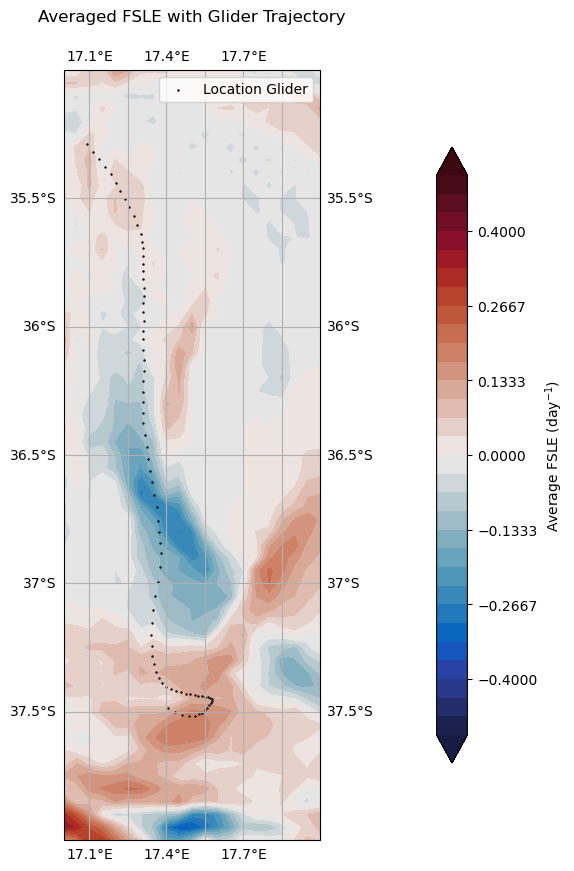

In [138]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean as cmo

# Define start and end dates
start_date = pd.to_datetime("2023-05-6")
end_date = pd.to_datetime("2023-05-16")

# Define file path patterns
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE5/fsle_{:%Y-%m-%d}.nc"
file_path_pattern_forward = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE5/forward/fsle_{:%Y-%m-%d}.nc"

# Define latitude and longitude range
lat_range = slice(-38, -35)
lon_range = slice(17, 18)

# Initialize a list to store FSLE datasets
fsle_list = []

# Iterate over the dates and collect FSLE data
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    file_path_forward = file_path_pattern_forward.format(current_date)

    if not os.path.exists(file_path) or not os.path.exists(file_path_forward):
        continue

    # Load FSLE datasets
    ds = xr.open_dataset(file_path)
    ds_forward = xr.open_dataset(file_path_forward)

    # Select FSLE data within the latitude and longitude range
    FSLE = ds['lambda1'].sel(lat=lat_range, lon=lon_range)
    FSLE_forward = ds_forward['lambda1'].sel(lat=lat_range, lon=lon_range)

    # Stack FSLE and FSLE_forward along a new 'time' dimension
    combined_fsle = xr.concat([FSLE, FSLE_forward], dim="time")

    fsle_list.append(combined_fsle)

# Combine all time slices into a single dataset
fsle_combined = xr.concat(fsle_list, dim="time")

# Compute the average FSLE
fsle_avg = fsle_combined.mean(dim="time")

# Plot the averaged FSLE with the full glider trajectory
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the averaged FSLE data
contour = ax.contourf(
    fsle_avg.lon,
    fsle_avg.lat,
    fsle_avg.T,
    cmap=cmo.cm.balance,
    levels=np.linspace(-0.5, 0.5, 31),
    extend='both',
    transform=ccrs.PlateCarree(),
)

# Add colorbar for FSLE
plt.colorbar(contour, label='Average FSLE (day$^{-1}$)', shrink=0.8, pad=0.1)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)


# Subset the data for the specified latitude and longitude range
subset_glider = ds_glider.where(
    (ds_glider.lat >= -38) & (ds_glider.lat <= -35) &
    (ds_glider.distance >=  600) & (ds_glider.distance <=720) &
    (ds_glider.long >= 17) & (ds_glider.long <= 18), 
    drop=True
)

# Scatter plot for the subset
plt.scatter(subset_glider.long, subset_glider.lat, color='black', s=0.5, label='Location Glider')

#ax.scatter(glider_lons, glider_lats, color='black', s=10, label='Glider Trajectory', transform=ccrs.PlateCarree())

# Add labels, legend, and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.title('Averaged FSLE with Glider Trajectory', pad=20)

# Save or display the plot
plt.savefig("FSLE/average_fsle_with_glider.png", dpi=300)
plt.show()


# laod in DAC data

In [25]:
import scipy.io

data = scipy.io.loadmat('C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/glider_depth_avg_curr')

# Placeholder data - replace these with your actual data arrays
prof_num = data['glider_vel']['prof_num'] # profile numbers (e.g., np.array([1, 2, 3, ...]))
prof_num = np.array(prof_num[0, 0]).flatten()
# Placeholder data - replace these with your actual data arrays
time = data['glider_vel']['time'] # profile numbers (e.g., np.array([1, 2, 3, ...]))
time = np.array(time[0, 0]).flatten()
u_east = data['glider_vel']['u_east']     # eastward velocities (e.g., np.array([0.1, 0.2, 0.3, ...]))
u_east = np.array(u_east[0, 0]).flatten()
u_north = data['glider_vel']['u_north']    # northward velocities (e.g., np.array([0.5, 0.6, 0.7, ...]))
u_north = np.array(u_north[0, 0]).flatten()

# Create the dataset
ds_dac = xr.Dataset(
    data_vars={
        "u_east": ("prof_num", u_east),
        "u_north": ("prof_num", u_north)
    },
    coords={
        "prof_num": prof_num
    }
)

# fSLE average plot with geostrophic velocity

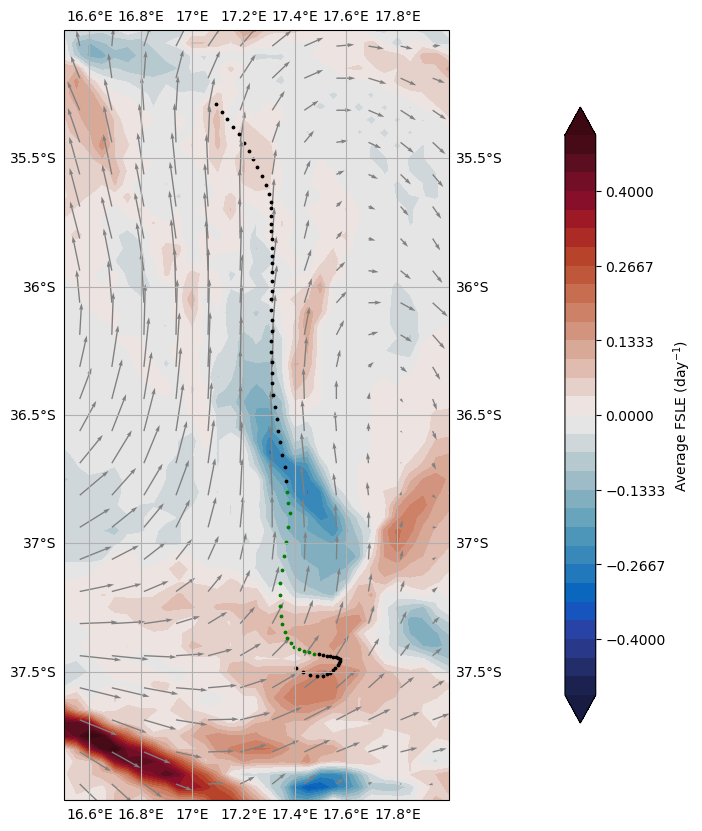

In [139]:
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cmo
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-05-6")
end_date = pd.to_datetime("2023-05-16")

# Define file path patterns
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE5/fsle_{:%Y-%m-%d}.nc"
file_path_pattern_forward = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE5/forward/fsle_{:%Y-%m-%d}.nc"
file_path_pattern_AVISO = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sla/dt_global_allsat_phy_l4_{:%Y%m%d}_20241023.nc"

# Define latitude and longitude range
lat_range = slice(-38, -35)
lon_range = slice(16.5, 18)

# Initialize lists to store FSLE and AVISO data
fsle_list = []
ugos_list = []
vgos_list = []
adt_list = []

# Iterate over the dates and collect FSLE and AVISO data
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    file_path_forward = file_path_pattern_forward.format(current_date)
    file_path_AVISO = file_path_pattern_AVISO.format(current_date)

    if not os.path.exists(file_path) or not os.path.exists(file_path_forward) or not os.path.exists(file_path_AVISO):
        continue

    # Load FSLE and AVISO datasets
    ds = xr.open_dataset(file_path)
    ds_forward = xr.open_dataset(file_path_forward)
    ds_AVISO = xr.open_dataset(file_path_AVISO)

    # Select FSLE data within the latitude and longitude range
    FSLE = ds['lambda1'].sel(lat=lat_range, lon=lon_range)
    FSLE_forward = ds_forward['lambda1'].sel(lat=lat_range, lon=lon_range)

    # Stack FSLE and FSLE_forward along a new 'time' dimension
    combined_fsle = xr.concat([FSLE, FSLE_forward], dim="time")
    fsle_list.append(combined_fsle)

    # Select AVISO data and add to lists
    ugos = ds_AVISO['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds_AVISO['vgos'].sel(latitude=lat_range, longitude=lon_range)
    adt = ds_AVISO['adt'].sel(latitude=lat_range, longitude=lon_range)

    ugos_list.append(ugos)
    vgos_list.append(vgos)
    adt_list.append(adt)

# Combine all time slices for FSLE, currents, and ADT into single datasets
fsle_combined = xr.concat(fsle_list, dim="time")
ugos_combined = xr.concat(ugos_list, dim="time")
vgos_combined = xr.concat(vgos_list, dim="time")
adt_combined = xr.concat(adt_list, dim="time")

# Compute averages
fsle_avg = fsle_combined.mean(dim="time")
ugos_avg = ugos_combined.mean(dim="time")
vgos_avg = vgos_combined.mean(dim="time")
adt_avg = adt_combined.mean(dim="time")

# Plot the averaged FSLE with quiver and ADT contour
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the averaged FSLE data
contour = ax.contourf(
    fsle_avg.lon,
    fsle_avg.lat,
    fsle_avg.T,
    cmap=cmo.cm.balance,
    levels=np.linspace(-0.5, 0.5, 31),
    extend='both',
    transform=ccrs.PlateCarree(),
)

# Add colorbar for FSLE
plt.colorbar(contour, label='Average FSLE (day$^{-1}$)', shrink=0.8, pad=0.1)

# Add the ADT contour line
plt.contour(
    adt_avg.longitude,
    adt_avg.latitude,
    adt_avg,
    levels=[0.7],
    colors='black',
    linewidths=3,
    transform=ccrs.PlateCarree(),
)

# Add quiver plot for averaged currents
plt.quiver(
    ugos_avg.longitude,
    ugos_avg.latitude,
    ugos_avg,
    vgos_avg,
    color='grey',
    scale=5,
    transform=ccrs.PlateCarree(),
)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)


# Subset the data for the specified latitude and longitude range
subset_glider = ds_glider.where(
    (ds_glider.lat >= -38) & (ds_glider.lat <= -35) &
    (ds_glider.distance >= 600) & (ds_glider.distance <= 720) &
    (ds_glider.long >= 17) & (ds_glider.long <= 18), 
    drop=True
)

# Further subset the data by distance ranges
subset_600_630 = subset_glider.where((subset_glider.distance >= 600) & (subset_glider.distance < 630), drop=True)
subset_630_660 = subset_glider.where((subset_glider.distance >= 630) & (subset_glider.distance < 660), drop=True)
subset_660_720 = subset_glider.where((subset_glider.distance >= 660) & (subset_glider.distance <= 720), drop=True)


plt.scatter(subset_600_630.long, subset_600_630.lat, color='black', s=3, label='600-630')
plt.scatter(subset_630_660.long, subset_630_660.lat, color='green', s=3, label='630-660')
plt.scatter(subset_660_720.long, subset_660_720.lat, color='black', s=3, label='660-720')


# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.title('Averaged FSLE with Glider Trajectory, Quiver Plot, and ADT Contour', pad=20)

# Save or display the plot
plt.savefig("FSLE/average_fsle_with_quiver_adt_avg.png", dpi=300)
plt.show()


In [26]:
ds_glider['AOU'] = ds_glider.o2 - ds_glider.sol

# 3d aou plot

In [39]:
sla_avg = sla_avg.sel(latitude=slice(-38, -35), longitude=slice(16.5, 18))
sla_avg

<xarray.DataArray 'sla' (latitude: 24, longitude: 12)>
array([[-3.80427273e-01, -3.40063636e-01, -3.03872727e-01,
        -2.74727273e-01, -2.55254545e-01, -2.46327273e-01,
        -2.45872727e-01, -2.48227273e-01, -2.47645455e-01,
        -2.41727273e-01, -2.31963636e-01, -2.21209091e-01],
       [-3.21609091e-01, -2.84536364e-01, -2.50881818e-01,
        -2.22954545e-01, -2.03272727e-01, -1.93200000e-01,
        -1.91845455e-01, -1.94881818e-01, -1.97109091e-01,
        -1.95627273e-01, -1.90872727e-01, -1.84863636e-01],
       [-2.53436364e-01, -2.21309091e-01, -1.91454545e-01,
        -1.65781818e-01, -1.46545455e-01, -1.35590909e-01,
        -1.33100000e-01, -1.36200000e-01, -1.40390909e-01,
        -1.42436364e-01, -1.41600000e-01, -1.38800000e-01],
       [-1.79381818e-01, -1.54027273e-01, -1.29981818e-01,
        -1.08936364e-01, -9.27909091e-02, -8.33636364e-02,
        -8.16000000e-02, -8.57545455e-02, -9.20363636e-02,
        -9.69909091e-02, -9.89545455e-02, -9.78636364e-02],
       [-1.04554545e-01, -8.66000000e-02, -6.97909091e-02,
        -5.55454545e-02, -4.51909091e-02, -4.03000000e-02,
        -4.18818182e-02, -4.87818182e-02, -5.76363636e-02,
        -6.48818182e-02, -6.83727273e-02, -6.73909091e-02],
...
       [ 1.91990909e-01,  1.51327273e-01,  1.09827273e-01,
         6.82636364e-02,  2.81272727e-02, -7.55454545e-03,
        -3.47545455e-02, -5.01363636e-02, -5.26363636e-02,
        -4.34000000e-02, -2.52363636e-02, -1.89090909e-03],
       [ 1.82245455e-01,  1.45118182e-01,  1.06827273e-01,
         6.85000000e-02,  3.18000000e-02, -9.09090909e-05,
        -2.30636364e-02, -3.39545455e-02, -3.20272727e-02,
        -1.91272727e-02,  1.31818182e-03,  2.52545455e-02],
       [ 1.74463636e-01,  1.43954545e-01,  1.11790909e-01,
         7.89272727e-02,  4.72090909e-02,  1.98545455e-02,
         1.00000000e-03, -6.36363636e-03, -1.50000000e-03,
         1.32909091e-02,  3.39181818e-02,  5.60272727e-02],
       [ 1.69127273e-01,  1.47527273e-01,  1.23609091e-01,
         9.81545455e-02,  7.26818182e-02,  5.02272727e-02,
         3.47909091e-02,  2.95181818e-02,  3.51636364e-02,
         4.95363636e-02,  6.82545455e-02,  8.64909091e-02],
       [ 1.68172727e-01,  1.55727273e-01,  1.40454545e-01,
         1.22581818e-01,  1.03172727e-01,  8.49727273e-02,
         7.16636364e-02,  6.66909091e-02,  7.12363636e-02,
         8.34181818e-02,  9.87272727e-02,  1.12209091e-01]])
Coordinates:
  * latitude   (latitude) float32 -37.94 -37.81 -37.69 ... -35.31 -35.19 -35.06
  * longitude  (longitude) float32 16.56 16.69 16.81 16.94 ... 17.69 17.81 17.94

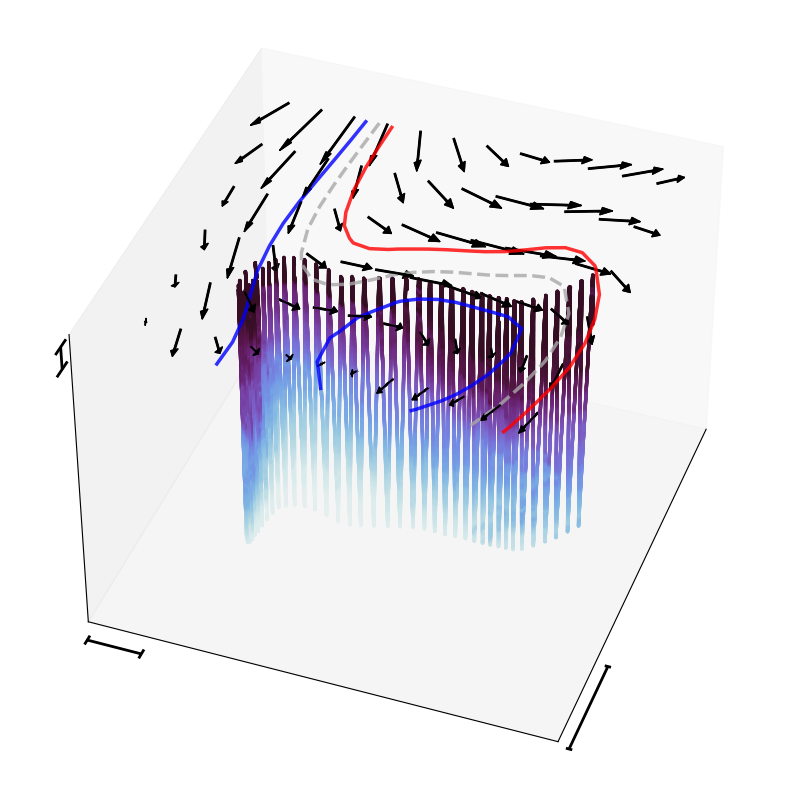

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
import xarray as xr
import os
import pandas as pd
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import gsw

# Initialize the 3D plot
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')

# Set the figure background to transparent
fig.patch.set_facecolor('none')  # Transparent figure background

# Set the axis background to transparent
ax.set_facecolor('none')  # Transparent axis background

# FSLE as surface at depth = 0
lon, lat = np.meshgrid(sla_avg.longitude, sla_avg.latitude)
fsle_surface = sla_avg  # Transpose to match (lat, lon)


contour_level1 = [-0.05]
contour_level2 = [0.05]
contour_level3 = [-0.1]

# Plot the blue contour line for -0.05
fsle_contour_blue = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level1,  # Contour levels for -0.05
    colors='blue',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
    linewidths=2.5
)



# Plot the red contour line for 0.05
fsle_contour_red = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level2,  # Contour levels for 0.05
    colors='red',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
    linewidths=2.5
)


# Plot the red contour line for 0.05
fsle_contour_red = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=[0],  # Contour levels for 0.05
    colors='darkgray',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='--',  # Solid line style
    linewidths=2.5
)


#labels = ['SLA = -0.1', 'SLA = -0.05', 'SLA = 0.05', 'SLA = 0']




# Convert the string to numpy datetime64
start_time = np.datetime64('2023-05-06T12:57:43.048470816')
end_time = np.datetime64('2023-05-16T02:33:46.029582425')

ds = xr.open_dataset('ds_cal_1.nc')
sol = gsw.O2sol(ds.salinity, ds.temp, ds.pressure, ds.longitude, ds.latitude)
ds['AOU'] = ds.o2 - sol

# Use these datetime64 objects for comparison
ds_sub = ds.where(
    (ds.latitude >= -38) & (ds.latitude <= -35) &
    (ds.longitude >= 16.5) & (ds.longitude <= 18) &
    (ds.ctd_time_dt64 >= start_time) & (ds.ctd_time_dt64 <= end_time),
    drop=True
)


# Spectral slope as points in lat, lon, and depth
lat_points = ds_sub.latitude.values.ravel()
lon_points = ds_sub.longitude.values.ravel()
depth_points = -ds_sub.ctd_depth.values.ravel()  # Negative for visualization
spectral_slope_points = -ds_sub.AOU.values.ravel()

# Ensure consistent lengths for all arrays
min_length = min(len(lat_points), len(lon_points), len(depth_points), len(spectral_slope_points))
lat_points = lat_points[:min_length]
lon_points = lon_points[:min_length]
depth_points = depth_points[:min_length]
spectral_slope_points = spectral_slope_points[:min_length]

# Scatter plot for spectral slope
scatter = ax.scatter(
    lon_points,
    lat_points,
    depth_points,
    c=spectral_slope_points,
    cmap=cmo.dense_r,
    vmin=50,
    s=2,
)


# Create a mesh grid for quiver plot
lon_grid, lat_grid = np.meshgrid(ugos_avg.longitude, ugos_avg.latitude)

# Calculate the magnitude of the velocity vectors
magnitude = np.sqrt(ugos_avg**2 + vgos_avg**2)

# Set a fixed Z position for the arrows
z_fixed = 0  # Arrows will be shown at this level

# Scale the components of the arrows
scaling_factor = 0.5  # Adjust this for arrow size
ugos_scaled = ugos_avg * scaling_factor
vgos_scaled = vgos_avg * scaling_factor

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to add an arrow with shaft and dynamically scaled head length
def add_arrow(ax, start, direction, shaft_width=0.005, head_width=0.02, magnitude_scaling=0.25):
    """
    Add a custom 3D arrow to the plot with a shaft and a head whose length is scaled by magnitude.
    :param ax: Matplotlib 3D Axes
    :param start: Starting point of the arrow (x, y, z)
    :param direction: Direction vector of the arrow
    :param shaft_width: Width of the arrow shaft
    :param head_width: Width of the arrowhead
    :param magnitude_scaling: Scaling factor for the arrowhead length based on magnitude
    """
    # Compute the magnitude of the direction vector
    magnitude = np.linalg.norm(direction)
    if magnitude == 0:
        return  # Skip zero-magnitude vectors

    # Normalize the direction vector
    unit_direction = direction / magnitude

    # Scale head length dynamically based on the vector's magnitude
    head_length = magnitude * magnitude_scaling

    # Shaft length (arbitrary ratio of head length for aesthetics)
    shaft_length = max(0.8 * magnitude, head_length * 0.8)

    # Shaft start and end
    shaft_start = start
    shaft_end = shaft_start + unit_direction * shaft_length

    # Arrowhead tip
    head_tip = shaft_end + unit_direction * head_length

    # Define the base center of the arrowhead
    base_center = shaft_end

    # Perpendicular vectors for arrowhead base
    perp1 = np.cross(unit_direction, [0, 0, 1]) if not np.allclose(unit_direction, [0, 0, 1]) else np.array([1, 0, 0])
    perp1 = perp1 / np.linalg.norm(perp1) * head_width
    perp2 = np.cross(unit_direction, perp1)
    perp2 = perp2 / np.linalg.norm(perp2) * head_width

    # Arrowhead vertices
    head_vertices = [
        head_tip,                   # Tip
        base_center + perp1,        # Base point 1
        base_center - perp1,        # Base point 2
        base_center + perp2,        # Base point 3
        base_center - perp2,        # Base point 4
    ]

    # Arrowhead faces
    faces = [
        [head_vertices[0], head_vertices[1], head_vertices[2]],  # Side face 1
        [head_vertices[0], head_vertices[3], head_vertices[4]],  # Side face 2
        [head_vertices[0], head_vertices[1], head_vertices[3]],  # Side face 3
        [head_vertices[0], head_vertices[2], head_vertices[4]],  # Side face 4
    ]

    # Add arrowhead to plot
    arrowhead = Poly3DCollection(faces, color='black', alpha=0.9, edgecolor='black')
    ax.add_collection3d(arrowhead)

    # Draw the shaft
    ax.plot(
        [shaft_start[0], shaft_end[0]],
        [shaft_start[1], shaft_end[1]],
        [shaft_start[2], shaft_end[2]],
        color='black',
        linewidth=2
    )

# Define a downsampling factor (e.g., 5 means every 5th point will be selected)
downsampling_factor = 2

# Create a mesh grid for quiver plot
lon_grid, lat_grid = np.meshgrid(ugos_avg.longitude, ugos_avg.latitude)

# Downsample the grids to reduce the number of points
lon_grid_downsampled = lon_grid[::downsampling_factor, ::downsampling_factor]
lat_grid_downsampled = lat_grid[::downsampling_factor, ::downsampling_factor]

# Scale the velocity vectors
ugos_scaled_downsampled = ugos_scaled[::downsampling_factor, ::downsampling_factor]
vgos_scaled_downsampled = vgos_scaled[::downsampling_factor, ::downsampling_factor]

# Loop through the downsampled grid to add arrows
for i in range(lon_grid_downsampled.shape[0]):
    for j in range(lon_grid_downsampled.shape[1]):
        start = np.array([lon_grid_downsampled[i, j], lat_grid_downsampled[i, j], z_fixed])
        direction = np.array([ugos_scaled_downsampled[i, j], vgos_scaled_downsampled[i, j], 0])  # No vertical component
        add_arrow(ax, start, direction)
        
q = ax.quiver(
    lon_grid_downsampled, 
    lat_grid_downsampled, 
    np.zeros_like(ugos_scaled_downsampled),  # Set vertical component (W) to 0
    ugos_scaled_downsampled, 
    vgos_scaled_downsampled,
    np.zeros_like(vgos_scaled_downsampled),  # Set vertical component (W) to 0
    color='black', 
    zorder=2  # Set zorder to ensure quiver is on top of scatter plot
    
)
        
        
# Hide longitude and latitude numbers
ax.set_xticks([])  # Remove longitude ticks
ax.set_yticks([])  # Remove latitude ticks
ax.set_zticks([])  # Remove depth ticks

# Define scale bar properties
scale_bar_length_km = 50  # Length of each scale bar in kilometers
scale_bar_length_deg = scale_bar_length_km / 111  # Convert length to degrees
scale_bar_z_position = -2000  # Fixed Z-level for the scale bar
tick_length = 0.05  # Tick mark length in degrees

# Adjust starting positions
lat_scale_lon_start = ax.get_xlim()[0] + 0.72  # Move latitude bar left
lat_scale_lat_start = ax.get_ylim()[0] - 1  # Move latitude bar down

lon_scale_lon_start = ax.get_xlim()[0]  + 0.2 # Move longitude bar right
lon_scale_lat_start = ax.get_ylim()[0] + 2.85  # Keep longitude bar vertical position

# 1. Longitude scale bar (horizontal)
lon_scale_bar_line = [[
    (lon_scale_lon_start, lon_scale_lat_start, scale_bar_z_position),
    (lon_scale_lon_start + scale_bar_length_deg, lon_scale_lat_start, scale_bar_z_position)
]]
lon_line = Line3DCollection(lon_scale_bar_line, colors="black", linewidths=2)
ax.add_collection(lon_line)

# Add left and right ticks for the longitude scale bar
lon_left_tick = [[
    (lon_scale_lon_start, lon_scale_lat_start - tick_length / 2, scale_bar_z_position),
    (lon_scale_lon_start, lon_scale_lat_start + tick_length / 2, scale_bar_z_position)
]]
lon_right_tick = [[
    (lon_scale_lon_start + scale_bar_length_deg, lon_scale_lat_start - tick_length / 2, scale_bar_z_position),
    (lon_scale_lon_start + scale_bar_length_deg, lon_scale_lat_start + tick_length / 2, scale_bar_z_position)
]]
ax.add_collection(Line3DCollection(lon_left_tick, colors="black", linewidths=2))
ax.add_collection(Line3DCollection(lon_right_tick, colors="black", linewidths=2))



# 2. Latitude scale bar (vertical)
lat_scale_bar_line = [[
    (lat_scale_lon_start, lat_scale_lat_start, scale_bar_z_position),
    (lat_scale_lon_start, lat_scale_lat_start + scale_bar_length_deg, scale_bar_z_position)
]]
lat_line = Line3DCollection(lat_scale_bar_line, colors="black", linewidths=2)
ax.add_collection(lat_line)

# Add bottom and top ticks for the latitude scale bar
lat_bottom_tick = [[
    (lat_scale_lon_start - tick_length / 2, lat_scale_lat_start, scale_bar_z_position),
    (lat_scale_lon_start + tick_length / 2, lat_scale_lat_start, scale_bar_z_position)
]]
lat_top_tick = [[
    (lat_scale_lon_start - tick_length / 2, lat_scale_lat_start + scale_bar_length_deg, scale_bar_z_position),
    (lat_scale_lon_start + tick_length / 2, lat_scale_lat_start + scale_bar_length_deg, scale_bar_z_position)
]]
ax.add_collection(Line3DCollection(lat_bottom_tick, colors="black", linewidths=2))
ax.add_collection(Line3DCollection(lat_top_tick, colors="black", linewidths=2))




# Define the scale bar for depth
depth_scale_km = 100  # Length of the depth scale bar in meters
depth_scale_z_position = -1500  # Z position for the depth scale bar (at the bottom)
depth_scale_length = depth_scale_km  # In meters (no need to convert to degrees)

# Adjust the starting position for the scale bar
depth_scale_lon_start = ax.get_xlim()[0]  - 0.2 # Slightly right from the left margin
depth_scale_lat_start = ax.get_ylim()[0] - 2  # Slightly up from the bottom

# 1. Depth scale bar (vertical)
depth_scale_bar_line = [[
    (depth_scale_lon_start, depth_scale_lat_start, depth_scale_z_position),
    (depth_scale_lon_start, depth_scale_lat_start, depth_scale_z_position - depth_scale_length)
]]
depth_line = Line3DCollection(depth_scale_bar_line, colors="black", linewidths=2)
ax.add_collection(depth_line)

# Add ticks for the depth scale bar
depth_top_tick = [[
    (depth_scale_lon_start - 0.05, depth_scale_lat_start, depth_scale_z_position),
    (depth_scale_lon_start + 0.05, depth_scale_lat_start, depth_scale_z_position)
]]
depth_bottom_tick = [[
    (depth_scale_lon_start - 0.05, depth_scale_lat_start, depth_scale_z_position - depth_scale_length),
    (depth_scale_lon_start + 0.05, depth_scale_lat_start, depth_scale_z_position - depth_scale_length)
]]
ax.add_collection(Line3DCollection(depth_top_tick, colors="black", linewidths=2))
ax.add_collection(Line3DCollection(depth_bottom_tick, colors="black", linewidths=2))




# Define position for the colorbar in figure coordinates
#cbar_ax = fig.add_axes([0.4, 0.3, 0.2, 0.02])  # [left, bottom, width, height]

# Create the colorbar
#cbar_spectral = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')

# Label and format the colorbar
#cbar_spectral.set_label('AOU ($\mu$mol kg$^{-1}$)', fontsize=14)
#cbar_spectral.ax.tick_params(labelsize=14)  # Increase tick size


ax.view_init(elev= 40, azim=20)  # Adjust the view angle if needed

# Save the plot as a static image
plt.savefig("combined_3d_plot.png", dpi=300,  transparent=True)

# Show the plot (this will display the static plot in the script)
plt.show()

In [13]:
ds_work = xr.open_dataset('ds_cal_1.nc')
ds_work.ctd_time_dt64[0].values

numpy.datetime64('2023-03-22T08:33:43.000000000')

# 3d spectral slope plot

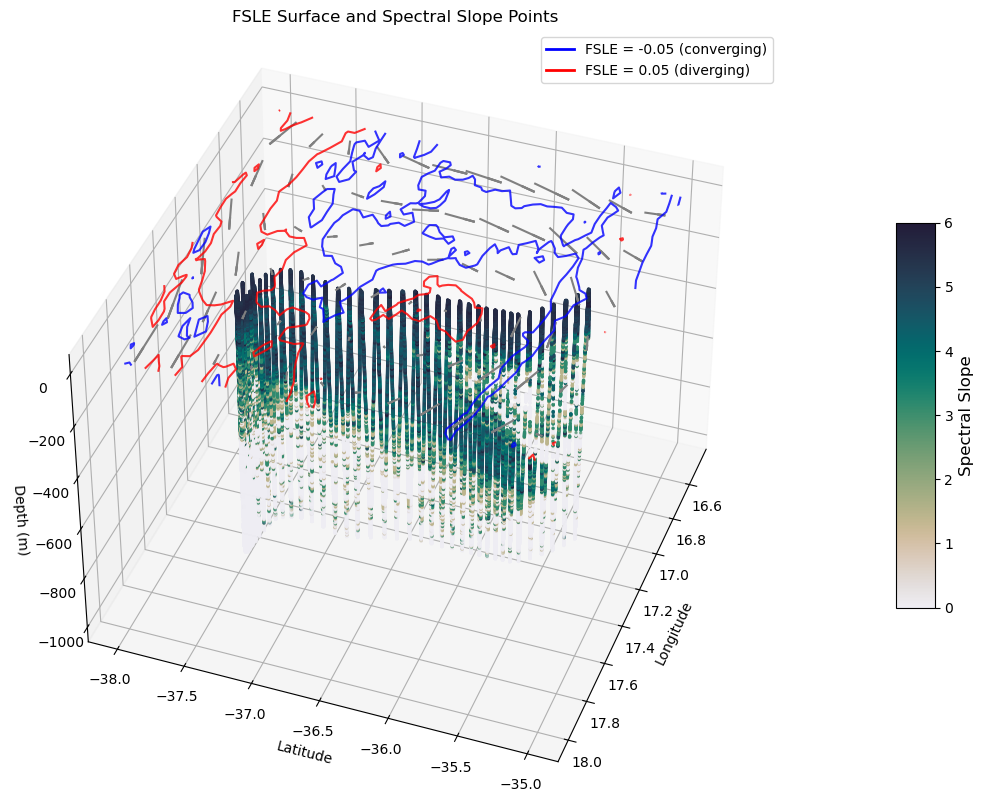

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
import xarray as xr
import os
import pandas as pd

# Initialize the 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# FSLE as surface at depth = 0
lon, lat = np.meshgrid(fsle_avg.lon, fsle_avg.lat)
fsle_surface = fsle_avg.T  # Transpose to match (lat, lon)


contour_level1 = [-0.05]
contour_level2 = [0.05]

# Plot the blue contour line for -0.05
fsle_contour_blue = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level1,  # Contour levels for -0.05
    colors='blue',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
)

# Plot the red contour line for 0.05
fsle_contour_red = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level2,  # Contour levels for 0.05
    colors='red',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
)

# Manually create a legend
handles = [
    plt.Line2D([0], [0], color='blue', lw=2),  # Blue contour for -0.05
    plt.Line2D([0], [0], color='red', lw=2),   # Red contour for 0.05
]
labels = ['FSLE = -0.05 (converging)', 'FSLE = 0.05 (diverging)']
ax.legend(handles, labels, loc='best')



# Convert the string to numpy datetime64
start_time = np.datetime64('2023-05-06T12:57:43.048470816')
end_time = np.datetime64('2023-05-16T02:33:46.029582425')

# Use these datetime64 objects for comparison
ds_sub = ds_work.where(
    (ds_work.latitude >= -38) & (ds_work.latitude <= -35) &
    (ds_work.longitude >= 16.5) & (ds_work.longitude <= 18) &
    (ds_work.ctd_time_dt64 >= start_time) & (ds_work.ctd_time_dt64 <= end_time),
    drop=True
)

# Spectral slope as points in lat, lon, and depth
lat_points = ds_sub.latitude.values.ravel()
lon_points = ds_sub.longitude.values.ravel()
depth_points = -ds_sub.ctd_depth.values.ravel()  # Negative for visualization
spectral_slope_points = ds_sub.spectral_slope.values.ravel()

# Ensure consistent lengths for all arrays
min_length = min(len(lat_points), len(lon_points), len(depth_points), len(spectral_slope_points))
lat_points = lat_points[:min_length]
lon_points = lon_points[:min_length]
depth_points = depth_points[:min_length]
spectral_slope_points = spectral_slope_points[:min_length]

# Scatter plot for spectral slope
scatter = ax.scatter(
    lon_points,
    lat_points,
    depth_points,
    c=spectral_slope_points,
    cmap=cmo.rain,
    vmin=0,
    vmax=6,
    s=2,
)


# Create a mesh grid for quiver plot
lon_grid, lat_grid = np.meshgrid(ugos_avg.longitude, ugos_avg.latitude)

# Calculate the magnitude of the velocity vectors
magnitude = np.sqrt(ugos_avg**2 + vgos_avg**2)

# Set a fixed Z position for the arrows
z_fixed = 0  # Arrows will be shown at this level

# Scale the magnitude to control the arrow size in a reasonable range
scaling_factor = 0.4  # Adjust this scaling factor based on the data

# Scale the components of the arrows
ugos_scaled = ugos_avg * scaling_factor
vgos_scaled = vgos_avg * scaling_factor

# Add the quiver plot to the 3D plot
quiver = ax.quiver(
    lon_grid,                        # Longitude grid
    lat_grid,                        # Latitude grid
    np.full_like(ugos_avg, z_fixed),  # Fixed Z-level
    ugos_scaled,                     # Scaled U component (X-direction vectors)
    vgos_scaled,                     # Scaled V component (Y-direction vectors)
    np.zeros_like(ugos_avg),         # No vertical component (Z-direction vectors)
    color='grey',                   # Color for the arrows
    linewidths=1.5,                    # Thickness of the arrows
    normalize=False,                 # No normalization, because we use scaling_factor
    pivot='middle',                  # Center the arrows on the (x, y) grid points
    arrow_length_ratio=0.4,           # Adjust for bigger arrowheads
)



# Add colorbar for spectral slope
cbar_spectral = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar_spectral.set_label('Spectral Slope', fontsize=12)

# Labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (m)')
ax.set_title('FSLE Surface and Spectral Slope Points')
ax.view_init(elev= 40, azim=20)  # Adjust the view angle if needed

# Save the plot as a static image
plt.savefig("combined_3d_plot.png", dpi=300)

# Show the plot (this will display the static plot in the script)
plt.show()



In [7]:
# Ensure distance is a DataArray for selection
distance_of_interest = 600  # Target distance in km

# Find the index of the nearest distance value
nearest_index = abs(ds_glider.distance - distance_of_interest).argmin()

# Get the corresponding time
corresponding_time = ds_glider.time.isel(distance=nearest_index)

print(f"The time corresponding to distance = {distance_of_interest} km is: {corresponding_time.values}")

The time corresponding to distance = 600 km is: 2023-05-06T12:57:43.048470816


# SST average 

In [122]:
file_path = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1716288824368.nc"

ds_sst = xr.open_dataset(file_path)

In [123]:
ds_sst

<xarray.Dataset>
Dimensions:         (time: 65, latitude: 200, longitude: 180)
Coordinates:
  * latitude        (latitude) float32 -41.97 -41.92 -41.88 ... -32.08 -32.02
  * longitude       (longitude) float32 12.03 12.08 12.12 ... 20.88 20.93 20.98
  * time            (time) datetime64[ns] 2023-03-20 2023-03-21 ... 2023-05-23
Data variables:
    analysed_sst    (time, latitude, longitude) float32 ...
    analysis_error  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...
    institution:       UKMO
    source:            AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHR...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    references:        Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R...
    comment:           WARNING Some applications are unable to properly handl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001
    subset:datasetId:  METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2
    subset:date:       2024-05-21T10:53:44.368Z

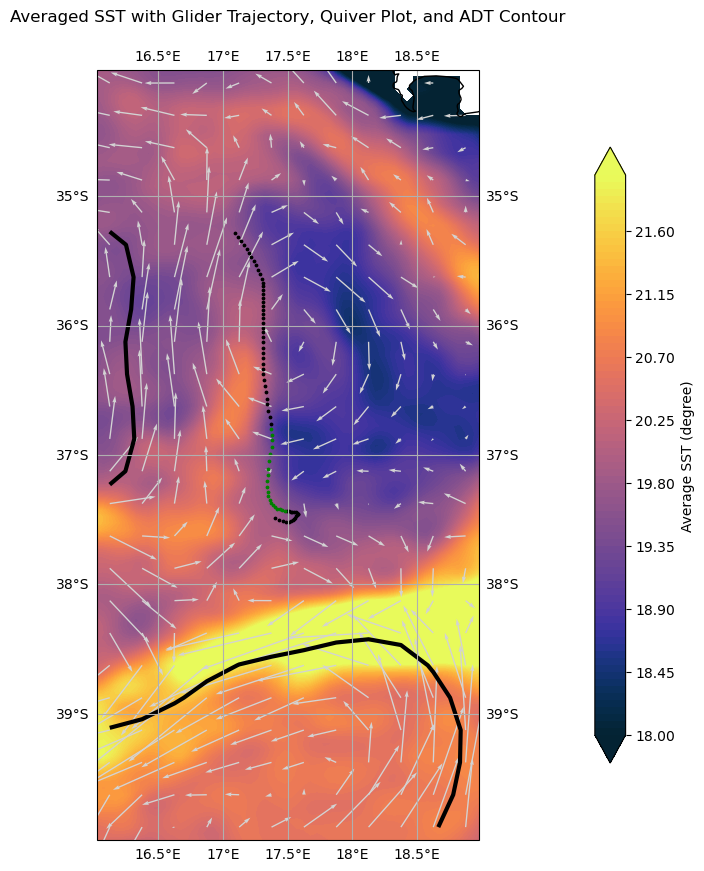

In [66]:
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cmo
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-05-6")
end_date = pd.to_datetime("2023-05-16")

# Define file path patterns

file_path_pattern_AVISO = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Define latitude and longitude range
lat_range = slice(-40, -34)
lon_range = slice(16, 19)

# Initialize lists to store FSLE and AVISO data
ugos_list = []
vgos_list = []
adt_list = []

# Iterate over the dates and collect FSLE and AVISO data
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path_AVISO = file_path_pattern_AVISO.format(current_date)

    if not os.path.exists(file_path_AVISO):
        continue

    # Select AVISO data and add to lists
    ugos = ds_AVISO['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds_AVISO['vgos'].sel(latitude=lat_range, longitude=lon_range)
    adt = ds_AVISO['adt'].sel(latitude=lat_range, longitude=lon_range)

    ugos_list.append(ugos)
    vgos_list.append(vgos)
    adt_list.append(adt)

# Combine all time slices for FSLE, currents, and ADT into single datasets
ugos_combined = xr.concat(ugos_list, dim="time")
vgos_combined = xr.concat(vgos_list, dim="time")
adt_combined = xr.concat(adt_list, dim="time")
# Select data where time is within the specified range
ds_sst_sel = ds_sst['analysed_sst'].sel(time=slice(start_date, end_date))
ds_sst_sub = ds_sst_sel.sel(latitude=lat_range, longitude=lon_range) -272.15

    
sst_avg = ds_sst_sub.mean(dim="time")
ugos_avg = ugos_combined.mean(dim="time")
vgos_avg = vgos_combined.mean(dim="time")
adt_avg = adt_combined.mean(dim="time")

# Plot the averaged FSLE with quiver and ADT contour
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the averaged FSLE data
contour = ax.contourf(
    sst_avg.longitude,
    sst_avg.latitude,
    sst_avg,
    cmap=cmo.cm.thermal,
    levels=np.linspace(18, 22, 81),
    extend='both',
    transform=ccrs.PlateCarree(),
)

# Add colorbar for FSLE
plt.colorbar(contour, label='Average SST (degree)', shrink=0.8, pad=0.1)

# Add the ADT contour line
plt.contour(
    adt_avg.longitude,
    adt_avg.latitude,
    adt_avg,
    levels=[0.7],
    colors='black',
    linewidths=3,
    transform=ccrs.PlateCarree(),
)

# Add quiver plot for averaged currents
plt.quiver(
    ugos_avg.longitude,
    ugos_avg.latitude,
    ugos_avg,
    vgos_avg,
    color='lightgrey',
    scale=5,
    transform=ccrs.PlateCarree(),
)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)


# Subset the data for the specified latitude and longitude range
subset_glider = ds_glider.where(
    (ds_glider.lat >= -38) & (ds_glider.lat <= -35) &
    (ds_glider.distance >= 600) & (ds_glider.distance <= 720) &
    (ds_glider.long >= 17) & (ds_glider.long <= 18), 
    drop=True
)

# Further subset the data by distance ranges
subset_600_630 = subset_glider.where((subset_glider.distance >= 600) & (subset_glider.distance < 630), drop=True)
subset_630_660 = subset_glider.where((subset_glider.distance >= 630) & (subset_glider.distance < 660), drop=True)
subset_660_720 = subset_glider.where((subset_glider.distance >= 660) & (subset_glider.distance <= 720), drop=True)


plt.scatter(subset_600_630.long, subset_600_630.lat, color='black', s=3, label='600-630')
plt.scatter(subset_630_660.long, subset_630_660.lat, color='green', s=3, label='630-660')
plt.scatter(subset_660_720.long, subset_660_720.lat, color='black', s=3, label='660-720')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Averaged SST with Glider Trajectory, Quiver Plot, and ADT Contour', pad=20)

# Save or display the plot
plt.savefig("FSLE/avg_sst_casestudy.png", dpi=300)
plt.show()


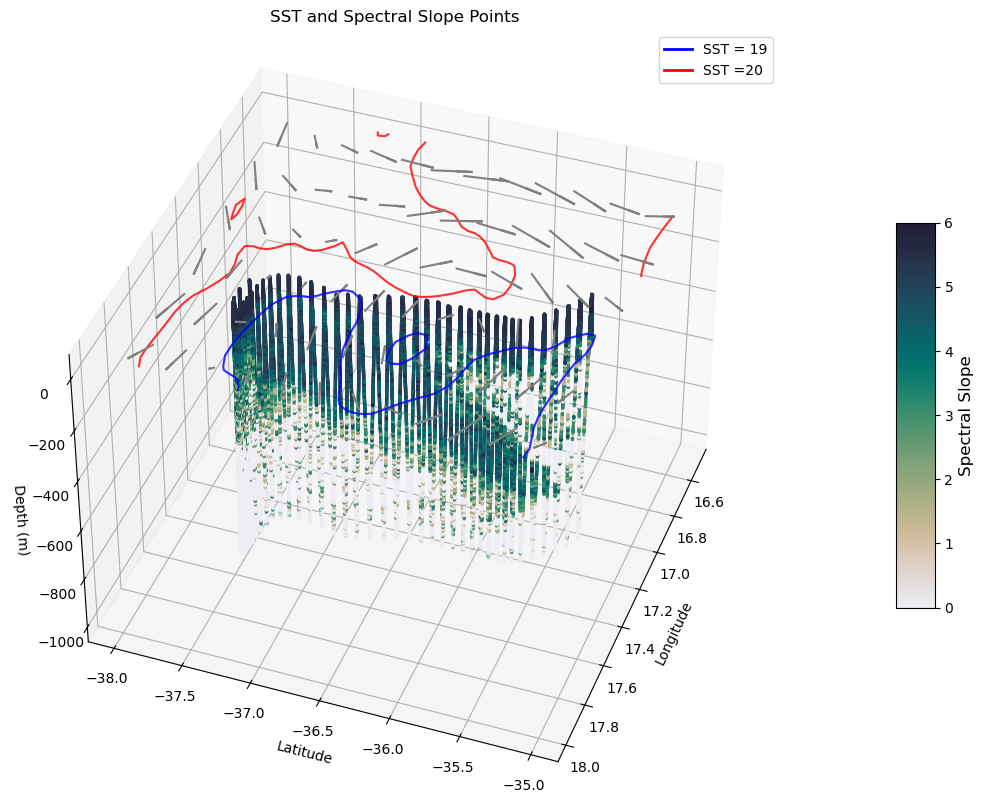

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
import xarray as xr
import os
import pandas as pd

# Initialize the 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# FSLE as surface at depth = 0
lon, lat = np.meshgrid(sst_avg.longitude, sst_avg.latitude)
fsle_surface = sst_avg  # Transpose to match (lat, lon)

contour_level1 = [19]
contour_level2 = [20]

# Plot the blue contour line for -0.05
fsle_contour_blue = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level1,  # Contour levels for -0.05
    colors='blue',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
)

# Plot the red contour line for 0.05
fsle_contour_red = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level2,  # Contour levels for 0.05
    colors='red',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
)

# Manually create a legend
handles = [
    plt.Line2D([0], [0], color='blue', lw=2),  # Blue contour for -0.05
    plt.Line2D([0], [0], color='red', lw=2),   # Red contour for 0.05
]
labels = ['SST = 19', 'SST =20']
ax.legend(handles, labels, loc='best')

# Convert the string to numpy datetime64
start_time = np.datetime64('2023-05-06T12:57:43.048470816')
end_time = np.datetime64('2023-05-16T02:33:46.029582425')

# Use these datetime64 objects for comparison
ds_sub = ds_work.where(
    (ds_work.latitude >= -38) & (ds_work.latitude <= -35) &
    (ds_work.longitude >= 16.5) & (ds_work.longitude <= 18) &
    (ds_work.ctd_time_dt64 >= start_time) & (ds_work.ctd_time_dt64 <= end_time),
    drop=True
)

# Spectral slope as points in lat, lon, and depth
lat_points = ds_sub.latitude.values.ravel()
lon_points = ds_sub.longitude.values.ravel()
depth_points = -ds_sub.ctd_depth.values.ravel()  # Negative for visualization
spectral_slope_points = ds_sub.spectral_slope.values.ravel()

# Ensure consistent lengths for all arrays
min_length = min(len(lat_points), len(lon_points), len(depth_points), len(spectral_slope_points))
lat_points = lat_points[:min_length]
lon_points = lon_points[:min_length]
depth_points = depth_points[:min_length]
spectral_slope_points = spectral_slope_points[:min_length]

# Scatter plot for spectral slope
scatter = ax.scatter(
    lon_points,
    lat_points,
    depth_points,
    c=spectral_slope_points,
    cmap=cmo.rain,
    vmin=0,
    vmax=6,
    s=2,
)

# Create a mesh grid for quiver plot
lon_grid, lat_grid = np.meshgrid(ugos_avg.longitude, ugos_avg.latitude)

# Calculate the magnitude of the velocity vectors
magnitude = np.sqrt(ugos_avg**2 + vgos_avg**2)

# Set a fixed Z position for the arrows
z_fixed = 0  # Arrows will be shown at this level

# Scale the magnitude to control the arrow size in a reasonable range
scaling_factor = 0.4  # Adjust this scaling factor based on the data

# Scale the components of the arrows
ugos_scaled = ugos_avg * scaling_factor
vgos_scaled = vgos_avg * scaling_factor

# Add the quiver plot to the 3D plot
quiver = ax.quiver(
    lon_grid,                        # Longitude grid
    lat_grid,                        # Latitude grid
    np.full_like(ugos_avg, z_fixed),  # Fixed Z-level
    ugos_scaled,                     # Scaled U component (X-direction vectors)
    vgos_scaled,                     # Scaled V component (Y-direction vectors)
    np.zeros_like(ugos_avg),         # No vertical component (Z-direction vectors)
    color='grey',                   # Color for the arrows
    linewidths=1.5,                    # Thickness of the arrows
    normalize=False,                 # No normalization, because we use scaling_factor
    pivot='middle',                  # Center the arrows on the (x, y) grid points
    arrow_length_ratio=0.4,           # Adjust for bigger arrowheads
)

# Add colorbar for spectral slope
cbar_spectral = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar_spectral.set_label('Spectral Slope', fontsize=12)

# Labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (m)')
ax.set_title('SST and Spectral Slope Points')
ax.view_init(elev= 40, azim=20)  # Adjust the view angle if needed

# Save the plot as a static image
plt.savefig("combined_3d_plot_SST.png", dpi=300)

# Show the plot (this will display the static plot in the script)
plt.show()


# grdient SST

In [35]:
# Define start and end dates
start_date = pd.to_datetime("2023-05-6")
end_date = pd.to_datetime("2023-05-16")

# vmin and vmax
vmin = -.05
vmax = 0.1
#cmap = 'balance'

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sla/dt_global_allsat_phy_l4_{:%Y%m%d}_20241023.nc"


# Define the file path pattern
file_path_sst = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1716288824368.nc"

ds_sst = xr.open_dataset(file_path_sst)

# Select latitude and longitude range
lat_range = slice(-41, -33)
lon_range = slice(12, 20)
    
# Initialize lists to store gradients and corresponding coordinates
tempgrad_list = []
times = []


# Iterate over the dates
for current_date in pd.date_range(start=start_date, end=end_date):    
    
    # plot the SST 
    sst_subset = ds_sst['analysed_sst'].sel(latitude=lat_range, longitude=lon_range)
    
    sst_sel = sst_subset.sel(time=current_date, method='nearest')
    
    sst_sel_degree = sst_sel - 272.15
    
    # Compute the partial derivatives
    partial_lon = np.gradient(sst_sel_degree, axis=1)  # Gradient along longitude
    partial_lat = np.gradient(sst_sel_degree, axis=0)  # Gradient along latitude
    
    length_per_degree_lat = 111 # km
    
    length_per_degree_lon = 11 * np.cos(np.deg2rad(sst_sel_degree.latitude.values))
    
    # Convert the gradients to degrees per km
    partial_lon_per_km = partial_lon/0.05 / length_per_degree_lon
    partial_lat_per_km = partial_lat/0.05 / length_per_degree_lat

    # Sum the partial derivatives (now in degrees per km)
    tempgrad = np.absolute(partial_lon_per_km + partial_lat_per_km)
    
    # Append the results and time to the lists
    tempgrad_list.append(tempgrad)
    times.append(current_date)

# Convert lists to numpy arrays
tempgrad_array = np.array(tempgrad_list)
times_array = np.array(times)


# Create a new xarray Dataset to store the gradients with time, latitude, and longitude dimensions
ds_grad = xr.Dataset(
    {
        "tempgrad": (("time", "latitude", "longitude"), tempgrad_array)
    },
    coords={
        "time": times_array,
        "latitude": sst_subset.latitude,
        "longitude": sst_subset.longitude
    }
)

In [37]:
ds_grad

<xarray.Dataset>
Dimensions:    (time: 11, latitude: 160, longitude: 160)
Coordinates:
  * time       (time) datetime64[ns] 2023-05-06 2023-05-07 ... 2023-05-16
  * latitude   (latitude) float32 -40.97 -40.92 -40.88 ... -33.12 -33.08 -33.02
  * longitude  (longitude) float32 12.03 12.08 12.12 12.18 ... 19.88 19.93 19.98
Data variables:
    tempgrad   (time, latitude, longitude) float32 0.03552 0.04634 ... nan nan

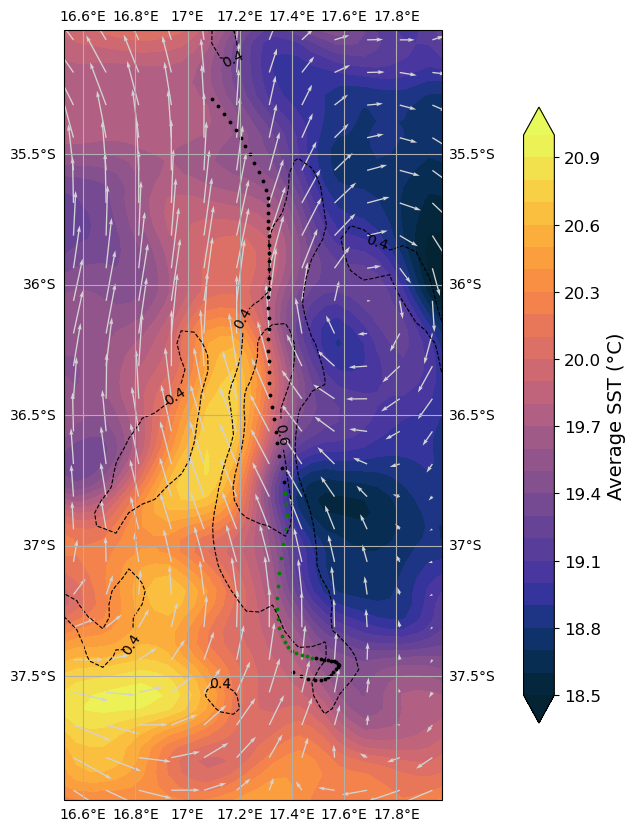

In [37]:
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cmo
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-05-6")
end_date = pd.to_datetime("2023-05-16")

# Define file path patterns

file_path_pattern_AVISO = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Define latitude and longitude range
lat_range = slice(-38, -35)
lon_range = slice(16.5, 18)

# Initialize lists to store FSLE and AVISO data
ugos_list = []
vgos_list = []
adt_list = []

# Iterate over the dates and collect FSLE and AVISO data
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path_AVISO = file_path_pattern_AVISO.format(current_date)

    if not os.path.exists(file_path_AVISO):
        continue

    # Select AVISO data and add to lists
    ugos = ds_AVISO['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds_AVISO['vgos'].sel(latitude=lat_range, longitude=lon_range)
    adt = ds_AVISO['adt'].sel(latitude=lat_range, longitude=lon_range)

    ugos_list.append(ugos)
    vgos_list.append(vgos)
    adt_list.append(adt)

# Combine all time slices for FSLE, currents, and ADT into single datasets
ugos_combined = xr.concat(ugos_list, dim="time")
vgos_combined = xr.concat(vgos_list, dim="time")
adt_combined = xr.concat(adt_list, dim="time")


ds_sst_sel = ds_sst['analysed_sst'].sel(time=slice(start_date, end_date))
ds_sst_sub = ds_sst_sel.sel(latitude=lat_range, longitude=lon_range) -272.15

    
sst_avg = ds_sst_sub.mean(dim="time")


# Select data where time is within the specified range
ds_grad_sel = ds_grad['tempgrad'].sel(time=slice(start_date, end_date))
ds_grad_sub = ds_grad_sel.sel(latitude=lat_range, longitude=lon_range) 

    
grad_avg = ds_grad_sub.mean(dim="time")
ugos_avg = ugos_combined.mean(dim="time")
vgos_avg = vgos_combined.mean(dim="time")
adt_avg = adt_combined.mean(dim="time")

# Plot the averaged FSLE with quiver and ADT contour
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the averaged FSLE data
contour = ax.contourf(
    sst_avg.longitude,
    sst_avg.latitude,
    sst_avg,
    cmap=cmo.cm.thermal,
    levels=np.linspace(18.5, 21, 26),
    extend='both',
    transform=ccrs.PlateCarree(),
)

# Add colorbar for FSLE with increased font size for label and tick labels
cbar = plt.colorbar(contour, label='Average SST (°C)', shrink=0.8, pad=0.07)

# Increase font size for the colorbar label
cbar.set_label('Average SST (°C)', fontsize=14)

# Increase font size for the colorbar tick labels
cbar.ax.tick_params(labelsize=12)  # Adjust the size as needed

# Add the ADT contour line
plt.contour(
    adt_avg.longitude,
    adt_avg.latitude,
    adt_avg,
    levels=[0.7],
    colors='black',
    linewidths=3,
    transform=ccrs.PlateCarree(),
)

# Add the dashed contour lines for ds_grad.tempgrad
contour_tempgrad = plt.contour(
    grad_avg.longitude,
    grad_avg.latitude,
    grad_avg,  # Averaging over time if necessary
    levels=[0.4, 0.6],  # Specify the contour levels
    colors='black',  # Set contour color
    linestyles='dashed',  # Make the contour lines dashed
    linewidths=0.8,  # Set the line width
    transform=ccrs.PlateCarree(),
)

# Add labels to the contour lines
plt.clabel(
    contour_tempgrad,
    fmt='%1.1f',  # Formatting for contour labels (e.g., 0.2, 0.4, 0.6)
    inline=True,  # Place the label inside the contour line
    fontsize=10,  # Font size for the labels
    colors='black',  # Color of the labels
    inline_spacing=5,  # Space between contour and label
)


# Add quiver plot for averaged currents
plt.quiver(
    ugos_avg.longitude,
    ugos_avg.latitude,
    ugos_avg,
    vgos_avg,
    color='lightgrey',
    scale=5,
    transform=ccrs.PlateCarree(),
)

# Add coastlines and gridlines
ax.coastlines()

ax.gridlines(draw_labels=True)

# Plot glider trajectory data
plt.scatter(subset_600_630.long, subset_600_630.lat, color='black', s=3, label='600-630')
plt.scatter(subset_630_660.long, subset_630_660.lat, color='green', s=3, label='630-660')
plt.scatter(subset_660_720.long, subset_660_720.lat, color='black', s=3, label='660-720')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')


# Save or display the plot
plt.savefig("FSLE/avg_sst_casestudy.png", dpi=300)
plt.show()



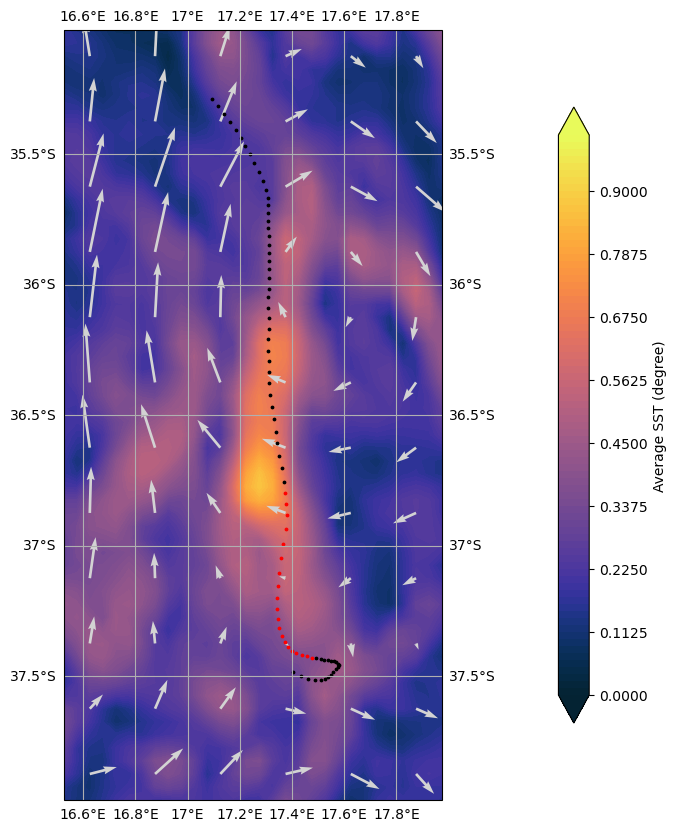

In [69]:
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cmo
import numpy as np

# Define start and end dates
start_date = pd.to_datetime("2023-05-6")
end_date = pd.to_datetime("2023-05-16")

# Define file path patterns

file_path_pattern_AVISO = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/may/dt_global_twosat_phy_l4_{:%Y%m%d}_vDT2021.nc"

# Define latitude and longitude range
lat_range = slice(-38, -35)
lon_range = slice(16.5, 18)

# Initialize lists to store FSLE and AVISO data
ugos_list = []
vgos_list = []
adt_list = []

# Iterate over the dates and collect FSLE and AVISO data
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path_AVISO = file_path_pattern_AVISO.format(current_date)

    if not os.path.exists(file_path_AVISO):
        continue

    # Select AVISO data and add to lists
    ugos = ds_AVISO['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds_AVISO['vgos'].sel(latitude=lat_range, longitude=lon_range)
    adt = ds_AVISO['adt'].sel(latitude=lat_range, longitude=lon_range)

    ugos_list.append(ugos)
    vgos_list.append(vgos)
    adt_list.append(adt)

# Combine all time slices for FSLE, currents, and ADT into single datasets
ugos_combined = xr.concat(ugos_list, dim="time")
vgos_combined = xr.concat(vgos_list, dim="time")
adt_combined = xr.concat(adt_list, dim="time")
# Select data where time is within the specified range
ds_sst_sel = ds_grad['tempgrad'].sel(time=slice(start_date, end_date))
ds_sst_sub = ds_sst_sel.sel(latitude=lat_range, longitude=lon_range) 

    
sst_avg = ds_sst_sub.mean(dim="time")
ugos_avg = ugos_combined.mean(dim="time")
vgos_avg = vgos_combined.mean(dim="time")
adt_avg = adt_combined.mean(dim="time")

# Plot the averaged FSLE with quiver and ADT contour
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the averaged FSLE data
contour = ax.contourf(
    sst_avg.longitude,
    sst_avg.latitude,
    sst_avg,
    cmap=cmo.cm.thermal,
    levels=np.linspace(0, 1, 81),
    extend='both',
    transform=ccrs.PlateCarree(),
)

# Add colorbar for FSLE
plt.colorbar(contour, label='Average SST (degree)', shrink=0.8, pad=0.1)

# Add the ADT contour line
plt.contour(
    adt_avg.longitude,
    adt_avg.latitude,
    adt_avg,
    levels=[0.7],
    colors='black',
    linewidths=3,
    transform=ccrs.PlateCarree(),
)

# Add quiver plot for averaged currents
plt.quiver(
    ugos_avg.longitude,
    ugos_avg.latitude,
    ugos_avg,
    vgos_avg,
    color='lightgrey',
    scale=5,
    transform=ccrs.PlateCarree(),
)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)


# Subset the data for the specified latitude and longitude range
subset_glider = ds_glider.where(
    (ds_glider.lat >= -38) & (ds_glider.lat <= -35) &
    (ds_glider.distance >= 600) & (ds_glider.distance <= 720) &
    (ds_glider.long >= 17) & (ds_glider.long <= 18), 
    drop=True
)

# Further subset the data by distance ranges
subset_600_630 = subset_glider.where((subset_glider.distance >= 600) & (subset_glider.distance < 630), drop=True)
subset_630_660 = subset_glider.where((subset_glider.distance >= 630) & (subset_glider.distance < 660), drop=True)
subset_660_720 = subset_glider.where((subset_glider.distance >= 660) & (subset_glider.distance <= 720), drop=True)


plt.scatter(subset_600_630.long, subset_600_630.lat, color='black', s=3, label='600-630')
plt.scatter(subset_630_660.long, subset_630_660.lat, color='red', s=3, label='630-660')
plt.scatter(subset_660_720.long, subset_660_720.lat, color='black', s=3, label='660-720')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.title('Averaged SST with Glider Trajectory, Quiver Plot, and ADT Contour', pad=20)

# Save or display the plot
plt.savefig("FSLE/avg_sst_casestudy.png", dpi=300)
plt.show()


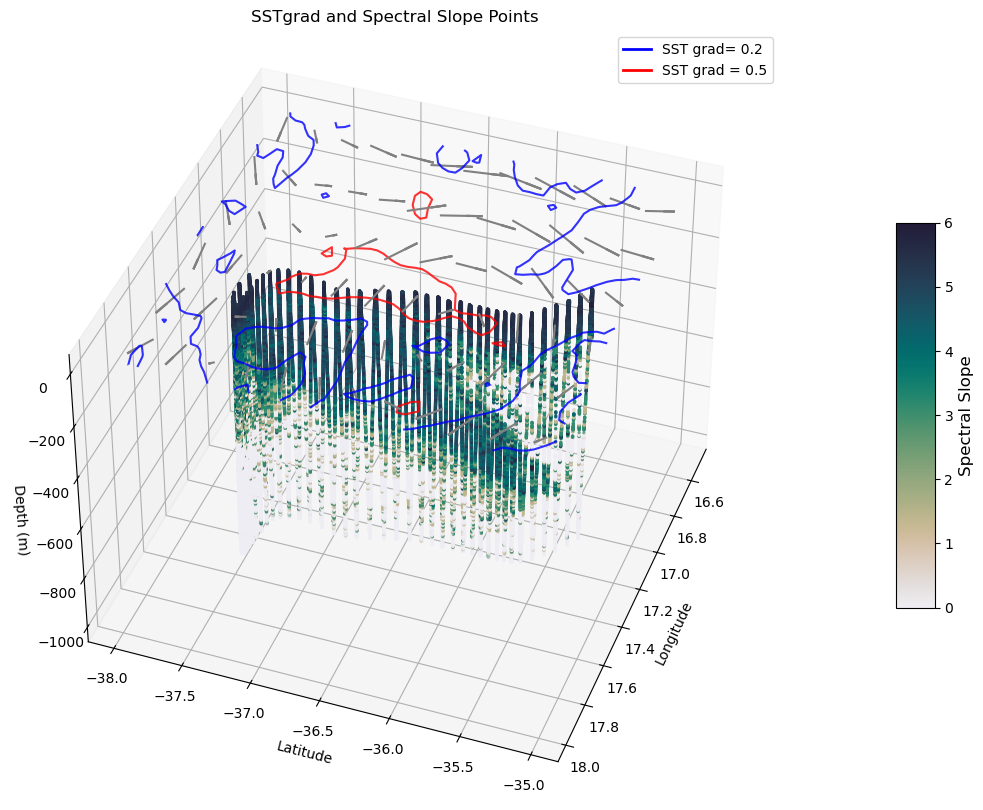

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
import xarray as xr
import os
import pandas as pd

# Initialize the 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# FSLE as surface at depth = 0
lon, lat = np.meshgrid(sst_avg.longitude, sst_avg.latitude)
fsle_surface = sst_avg  # Transpose to match (lat, lon)

contour_level1 = [0.2]
contour_level2 = [0.5]

# Plot the blue contour line for -0.05
fsle_contour_blue = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level1,  # Contour levels for -0.05
    colors='blue',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
)

# Plot the red contour line for 0.05
fsle_contour_red = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level2,  # Contour levels for 0.05
    colors='red',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
)

# Manually create a legend
handles = [
    plt.Line2D([0], [0], color='blue', lw=2),  # Blue contour for -0.05
    plt.Line2D([0], [0], color='red', lw=2),   # Red contour for 0.05
]
labels = ['SST grad= 0.2', 'SST grad = 0.5']
ax.legend(handles, labels, loc='best')

# Convert the string to numpy datetime64
start_time = np.datetime64('2023-05-06T12:57:43.048470816')
end_time = np.datetime64('2023-05-16T02:33:46.029582425')

# Use these datetime64 objects for comparison
ds_sub = ds_work.where(
    (ds_work.latitude >= -38) & (ds_work.latitude <= -35) &
    (ds_work.longitude >= 16.5) & (ds_work.longitude <= 18) &
    (ds_work.ctd_time_dt64 >= start_time) & (ds_work.ctd_time_dt64 <= end_time),
    drop=True
)

# Spectral slope as points in lat, lon, and depth
lat_points = ds_sub.latitude.values.ravel()
lon_points = ds_sub.longitude.values.ravel()
depth_points = -ds_sub.ctd_depth.values.ravel()  # Negative for visualization
spectral_slope_points = ds_sub.spectral_slope.values.ravel()

# Ensure consistent lengths for all arrays
min_length = min(len(lat_points), len(lon_points), len(depth_points), len(spectral_slope_points))
lat_points = lat_points[:min_length]
lon_points = lon_points[:min_length]
depth_points = depth_points[:min_length]
spectral_slope_points = spectral_slope_points[:min_length]

# Scatter plot for spectral slope
scatter = ax.scatter(
    lon_points,
    lat_points,
    depth_points,
    c=spectral_slope_points,
    cmap=cmo.rain,
    vmin=0,
    vmax=6,
    s=2,
)

# Create a mesh grid for quiver plot
lon_grid, lat_grid = np.meshgrid(ugos_avg.longitude, ugos_avg.latitude)

# Calculate the magnitude of the velocity vectors
magnitude = np.sqrt(ugos_avg**2 + vgos_avg**2)

# Set a fixed Z position for the arrows
z_fixed = 0  # Arrows will be shown at this level

# Scale the magnitude to control the arrow size in a reasonable range
scaling_factor = 0.4  # Adjust this scaling factor based on the data

# Scale the components of the arrows
ugos_scaled = ugos_avg * scaling_factor
vgos_scaled = vgos_avg * scaling_factor

# Add the quiver plot to the 3D plot
quiver = ax.quiver(
    lon_grid,                        # Longitude grid
    lat_grid,                        # Latitude grid
    np.full_like(ugos_avg, z_fixed),  # Fixed Z-level
    ugos_scaled,                     # Scaled U component (X-direction vectors)
    vgos_scaled,                     # Scaled V component (Y-direction vectors)
    np.zeros_like(ugos_avg),         # No vertical component (Z-direction vectors)
    color='grey',                   # Color for the arrows
    linewidths=1.5,                    # Thickness of the arrows
    normalize=False,                 # No normalization, because we use scaling_factor
    pivot='middle',                  # Center the arrows on the (x, y) grid points
    arrow_length_ratio=0.4,           # Adjust for bigger arrowheads
)

# Add colorbar for spectral slope
cbar_spectral = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar_spectral.set_label('Spectral Slope', fontsize=12)

# Labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (m)')
ax.set_title('SSTgrad and Spectral Slope Points')
ax.view_init(elev= 40, azim=20)  # Adjust the view angle if needed

# Save the plot as a static image
plt.savefig("combined_3d_plot_SST.png", dpi=300)

# Show the plot (this will display the static plot in the script)
plt.show()
    

In [32]:
# Use these datetime64 objects for comparison
ds_sub = ds_work.where(
    (ds_work.latitude >= -38) & (ds_work.latitude <= -35) &
    (ds_work.longitude >= 16.5) & (ds_work.longitude <= 18) &
    (ds_work.ctd_time_dt64 >= start_date) & (ds_work.ctd_time_dt64 <= end_date) &
    (ds_work.ctd_depth <=20),
    drop=True
)


In [33]:
# Subset the dataset based on the distance range of 600 to 720
subset_glider = ds_glider.where(
    (ds_glider.distance >= 600) & (ds_glider.distance <= 720), 
    drop=True
)

# Extract the time corresponding to the subsetted data
time_values = subset_glider.time.values

# Print or check the time values
print(time_values)

['2023-05-06T12:57:43.048470816' '2023-05-06T15:39:41.498585579'
 '2023-05-06T18:25:23.501938663' '2023-05-06T21:15:50.517826654'
 '2023-05-07T00:08:56.181530838' '2023-05-07T02:58:28.509430394'
 '2023-05-07T05:47:28.091125978' '2023-05-07T08:30:49.476919406'
 '2023-05-07T11:20:28.968252366' '2023-05-07T14:05:14.706249440'
 '2023-05-07T16:53:12.753387567' '2023-05-07T19:46:22.910766707'
 '2023-05-07T22:50:29.307177433' '2023-05-08T01:36:33.669070593'
 '2023-05-08T04:27:06.108151395' '2023-05-08T07:20:29.088426932'
 '2023-05-08T10:16:45.911302464' '2023-05-08T13:15:13.603988622'
 '2023-05-08T16:12:14.805648955' '2023-05-08T19:12:00.335438342'
 '2023-05-08T22:02:02.263951179' '2023-05-09T01:00:05.965963262'
 '2023-05-09T03:53:05.425599108' '2023-05-09T06:47:33.255831885'
 '2023-05-09T09:33:35.668986477' '2023-05-09T12:22:29.061755937'
 '2023-05-09T15:08:10.152520410' '2023-05-09T17:58:39.679689467'
 '2023-05-09T20:55:02.915927241' '2023-05-09T23:46:13.598013655'
 '2023-05-10T02:46:45.074

# POC 3d

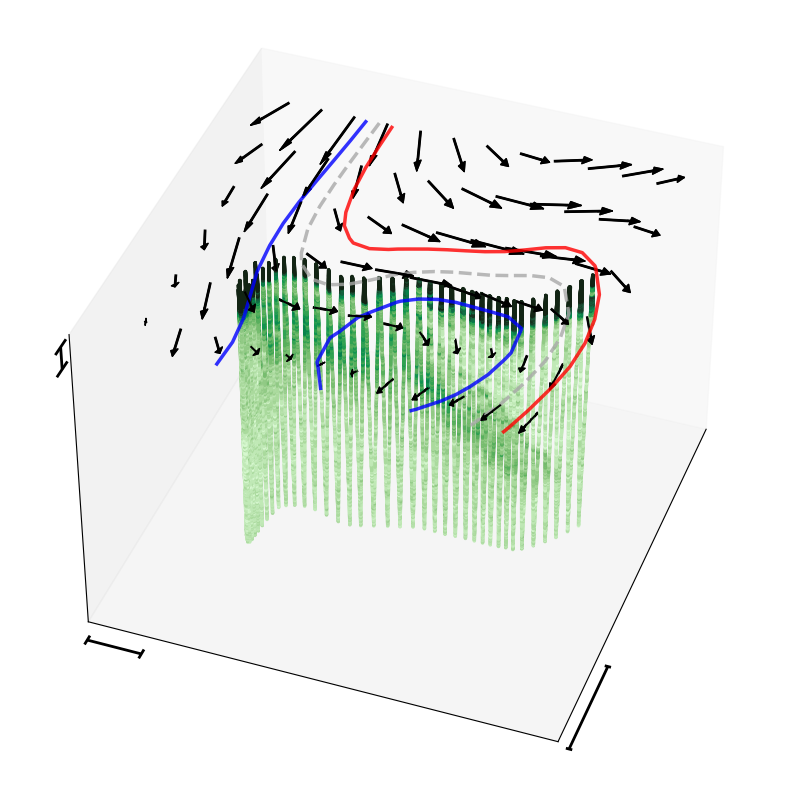

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
import xarray as xr
import os
import pandas as pd
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Initialize the 3D plot
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')

# Set the figure background to transparent
fig.patch.set_facecolor('none')  # Transparent figure background

# Set the axis background to transparent
ax.set_facecolor('none')  # Transparent axis background

# FSLE as surface at depth = 0
lon, lat = np.meshgrid(sla_avg.longitude, sla_avg.latitude)
fsle_surface = sla_avg  # Transpose to match (lat, lon)


contour_level1 = [-0.05]
contour_level2 = [0.05]
contour_level3 = [-0.1]

# Plot the blue contour line for -0.05
fsle_contour_blue = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level1,  # Contour levels for -0.05
    colors='blue',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
    linewidths=2.5
)




# Plot the red contour line for 0.05
fsle_contour_red = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=contour_level2,  # Contour levels for 0.05
    colors='red',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='solid',  # Solid line style
    linewidths=2.5
)


# Plot the red contour line for 0.05
fsle_contour_red = ax.contour(
    lon,  # Longitude grid
    lat,  # Latitude grid
    fsle_surface,  # FSLE values
    levels=[0],  # Contour levels for 0.05
    colors='darkgray',  # Color for the contour line
    zdir='z',  # Project onto the z-plane
    alpha=0.8,  # Transparency
    linestyles='--',  # Solid line style
    linewidths=2.5
)


# Convert the string to numpy datetime64
start_time = np.datetime64('2023-05-06T12:57:43.048470816')
end_time = np.datetime64('2023-05-16T02:33:46.029582425')

# Use these datetime64 objects for comparison
ds_sub = ds_work.where(
    (ds_work.latitude >= -38) & (ds_work.latitude <= -35) &
    (ds_work.longitude >= 16.5) & (ds_work.longitude <= 18) &
    (ds_work.ctd_time_dt64 >= start_time) & (ds_work.ctd_time_dt64 <= end_time),
    drop=True
)

# Ensure MLD values align with ds_sub.tot_distance
matched_MLD = np.interp(ds_sub.tot_distance, MLD.distance, MLD.ctd_depth, left=np.nan, right=np.nan)

# Add the interpolated MLD values to ds_sub as a new variable
ds_sub = ds_sub.assign(MLD=(["sg_data_point"], matched_MLD))

# Define the multiplication factors
factor_below_MLD = 37537
factor_above_MLD = 31519

# Create a mask for where the ctd_depth is between 0 and MLD, and where it's greater than MLD
mask_below_MLD = (ds_sub.ctd_depth >= 0) & (ds_sub.ctd_depth <= ds_sub.MLD)
mask_above_MLD = ds_sub.ctd_depth > ds_sub.MLD

# Apply the multiplication factors
ds_sub["backscatter_700"] = xr.where(mask_below_MLD, ds_sub.backscatter_700 * factor_below_MLD,
                                      xr.where(mask_above_MLD, ds_sub.backscatter_700 * factor_above_MLD, ds_sub.backscatter_700))


# Spectral slope as points in lat, lon, and depth
lat_points = ds_sub.latitude.values.ravel()
lon_points = ds_sub.longitude.values.ravel()
depth_points = -ds_sub.ctd_depth.values.ravel()  # Negative for visualization
spectral_slope_points = ds_sub.backscatter_700.values.ravel()

# Ensure consistent lengths for all arrays
min_length = min(len(lat_points), len(lon_points), len(depth_points), len(spectral_slope_points))
lat_points = lat_points[:min_length]
lon_points = lon_points[:min_length]
depth_points = depth_points[:min_length]
spectral_slope_points = spectral_slope_points[:min_length]

# Scatter plot for spectral slope (already placed earlier in your code)
scatter = ax.scatter(
    lon_points,
    lat_points,
    depth_points,
    c=spectral_slope_points,
    cmap=cmo.algae,
    vmin=0,
    vmax=10,
    s=2,
    zorder=1 
)



#labels = ['SLA = -0.1', 'SLA = -0.05', 'SLA = 0.05', 'SLA = 0']

# Plot arrows at the surface (z = 0) AFTER the scatter plot
# Create a mesh grid for quiver plot
lon_grid, lat_grid = np.meshgrid(ugos_avg.longitude, ugos_avg.latitude)

# Scale the components of the arrows
scaling_factor = 0.5  # Adjust this for arrow size
ugos_scaled = ugos_avg * scaling_factor
vgos_scaled = vgos_avg * scaling_factor

# Function to add an arrow with shaft and dynamically scaled head length
def add_arrow(ax, start, direction, shaft_width=0.005, head_width=0.02, magnitude_scaling=0.25):
    """
    Add a custom 3D arrow to the plot with a shaft and a head whose length is scaled by magnitude.
    :param ax: Matplotlib 3D Axes
    :param start: Starting point of the arrow (x, y, z)
    :param direction: Direction vector of the arrow
    :param shaft_width: Width of the arrow shaft
    :param head_width: Width of the arrowhead
    :param magnitude_scaling: Scaling factor for the arrowhead length based on magnitude
    """
    # Compute the magnitude of the direction vector
    magnitude = np.linalg.norm(direction)
    if magnitude == 0:
        return  # Skip zero-magnitude vectors

    # Normalize the direction vector
    unit_direction = direction / magnitude

    # Scale head length dynamically based on the vector's magnitude
    head_length = magnitude * magnitude_scaling

    # Shaft length (arbitrary ratio of head length for aesthetics)
    shaft_length = max(0.8 * magnitude, head_length * 0.8)

    # Shaft start and end
    shaft_start = start
    shaft_end = shaft_start + unit_direction * shaft_length

    # Arrowhead tip
    head_tip = shaft_end + unit_direction * head_length

    # Define the base center of the arrowhead
    base_center = shaft_end

    # Perpendicular vectors for arrowhead base
    perp1 = np.cross(unit_direction, [0, 0, 1]) if not np.allclose(unit_direction, [0, 0, 1]) else np.array([1, 0, 0])
    perp1 = perp1 / np.linalg.norm(perp1) * head_width
    perp2 = np.cross(unit_direction, perp1)
    perp2 = perp2 / np.linalg.norm(perp2) * head_width

    # Arrowhead vertices
    head_vertices = [
        head_tip,                   # Tip
        base_center + perp1,        # Base point 1
        base_center - perp1,        # Base point 2
        base_center + perp2,        # Base point 3
        base_center - perp2,        # Base point 4
    ]

    # Arrowhead faces
    faces = [
        [head_vertices[0], head_vertices[1], head_vertices[2]],  # Side face 1
        [head_vertices[0], head_vertices[3], head_vertices[4]],  # Side face 2
        [head_vertices[0], head_vertices[1], head_vertices[3]],  # Side face 3
        [head_vertices[0], head_vertices[2], head_vertices[4]],  # Side face 4
    ]

    # Add arrowhead to plot
    arrowhead = Poly3DCollection(faces, color='black', alpha=0.9, edgecolor='black')
    ax.add_collection3d(arrowhead)

    # Draw the shaft
    ax.plot(
        [shaft_start[0], shaft_end[0]],
        [shaft_start[1], shaft_end[1]],
        [shaft_start[2], shaft_end[2]],
        color='black',
        linewidth=2
    )

# Now, add arrows on top of the scatter plot, with fixed z-position
z_fixed = 0  # Fixed Z position for arrows to ensure they appear on top of the scatter plot
arrow_height_above_surface = 0  # Small height to lift arrows above the scatter points

# Create a mesh grid for the quiver plot (this is done after scatter)
lon_grid, lat_grid = np.meshgrid(ugos_avg.longitude, ugos_avg.latitude)

# Downsample the grids to reduce the number of points
lon_grid_downsampled = lon_grid[::downsampling_factor, ::downsampling_factor]
lat_grid_downsampled = lat_grid[::downsampling_factor, ::downsampling_factor]

# Scale the velocity vectors
ugos_scaled_downsampled = ugos_scaled[::downsampling_factor, ::downsampling_factor]
vgos_scaled_downsampled = vgos_scaled[::downsampling_factor, ::downsampling_factor]

# Loop through the downsampled grid to add arrows (ensure they're on top of the scatter plot)
for i in range(lon_grid_downsampled.shape[0]):
    for j in range(lon_grid_downsampled.shape[1]):
        start = np.array([lon_grid_downsampled[i, j], lat_grid_downsampled[i, j], 0])
        direction = np.array([ugos_scaled_downsampled[i, j], vgos_scaled_downsampled[i, j], 0])  # No vertical component
        add_arrow(ax, start, direction)

q = ax.quiver(
    lon_grid_downsampled, 
    lat_grid_downsampled, 
    np.zeros_like(ugos_scaled_downsampled),  # Set vertical component (W) to 0
    ugos_scaled_downsampled, 
    vgos_scaled_downsampled,
    np.zeros_like(vgos_scaled_downsampled),  # Set vertical component (W) to 0
    color='black', 
    zorder=2  # Set zorder to ensure quiver is on top of scatter plot
    
)



# Hide longitude and latitude numbers
ax.set_xticks([])  # Remove longitude ticks
ax.set_yticks([])  # Remove latitude ticks
ax.set_zticks([])  # Remove depth ticks

# Define scale bar properties
scale_bar_length_km = 50  # Length of each scale bar in kilometers
scale_bar_length_deg = scale_bar_length_km / 111  # Convert length to degrees
scale_bar_z_position = -2000  # Fixed Z-level for the scale bar
tick_length = 0.05  # Tick mark length in degrees

# Adjust starting positions
lat_scale_lon_start = ax.get_xlim()[0] + 0.72  # Move latitude bar left
lat_scale_lat_start = ax.get_ylim()[0] - 1  # Move latitude bar down

lon_scale_lon_start = ax.get_xlim()[0]  + 0.2 # Move longitude bar right
lon_scale_lat_start = ax.get_ylim()[0] + 2.85  # Keep longitude bar vertical position

# 1. Longitude scale bar (horizontal)
lon_scale_bar_line = [[
    (lon_scale_lon_start, lon_scale_lat_start, scale_bar_z_position),
    (lon_scale_lon_start + scale_bar_length_deg, lon_scale_lat_start, scale_bar_z_position)
]]
lon_line = Line3DCollection(lon_scale_bar_line, colors="black", linewidths=2)
ax.add_collection(lon_line)

# Add left and right ticks for the longitude scale bar
lon_left_tick = [[
    (lon_scale_lon_start, lon_scale_lat_start - tick_length / 2, scale_bar_z_position),
    (lon_scale_lon_start, lon_scale_lat_start + tick_length / 2, scale_bar_z_position)
]]
lon_right_tick = [[
    (lon_scale_lon_start + scale_bar_length_deg, lon_scale_lat_start - tick_length / 2, scale_bar_z_position),
    (lon_scale_lon_start + scale_bar_length_deg, lon_scale_lat_start + tick_length / 2, scale_bar_z_position)
]]
ax.add_collection(Line3DCollection(lon_left_tick, colors="black", linewidths=2))
ax.add_collection(Line3DCollection(lon_right_tick, colors="black", linewidths=2))


# 2. Latitude scale bar (vertical)
lat_scale_bar_line = [[
    (lat_scale_lon_start, lat_scale_lat_start, scale_bar_z_position),
    (lat_scale_lon_start, lat_scale_lat_start + scale_bar_length_deg, scale_bar_z_position)
]]
lat_line = Line3DCollection(lat_scale_bar_line, colors="black", linewidths=2)
ax.add_collection(lat_line)

# Add bottom and top ticks for the latitude scale bar
lat_bottom_tick = [[
    (lat_scale_lon_start - tick_length / 2, lat_scale_lat_start, scale_bar_z_position),
    (lat_scale_lon_start + tick_length / 2, lat_scale_lat_start, scale_bar_z_position)
]]
lat_top_tick = [[
    (lat_scale_lon_start - tick_length / 2, lat_scale_lat_start + scale_bar_length_deg, scale_bar_z_position),
    (lat_scale_lon_start + tick_length / 2, lat_scale_lat_start + scale_bar_length_deg, scale_bar_z_position)
]]
ax.add_collection(Line3DCollection(lat_bottom_tick, colors="black", linewidths=2))
ax.add_collection(Line3DCollection(lat_top_tick, colors="black", linewidths=2))




# Define the scale bar for depth
depth_scale_km = 100  # Length of the depth scale bar in meters
depth_scale_z_position = -1500  # Z position for the depth scale bar (at the bottom)
depth_scale_length = depth_scale_km  # In meters (no need to convert to degrees)

# Adjust the starting position for the scale bar
depth_scale_lon_start = ax.get_xlim()[0]  - 0.2 # Slightly right from the left margin
depth_scale_lat_start = ax.get_ylim()[0] - 2  # Slightly up from the bottom

# 1. Depth scale bar (vertical)
depth_scale_bar_line = [[
    (depth_scale_lon_start, depth_scale_lat_start, depth_scale_z_position),
    (depth_scale_lon_start, depth_scale_lat_start, depth_scale_z_position - depth_scale_length)
]]
depth_line = Line3DCollection(depth_scale_bar_line, colors="black", linewidths=2)
ax.add_collection(depth_line)

# Add ticks for the depth scale bar
depth_top_tick = [[
    (depth_scale_lon_start - 0.05, depth_scale_lat_start, depth_scale_z_position),
    (depth_scale_lon_start + 0.05, depth_scale_lat_start, depth_scale_z_position)
]]
depth_bottom_tick = [[
    (depth_scale_lon_start - 0.05, depth_scale_lat_start, depth_scale_z_position - depth_scale_length),
    (depth_scale_lon_start + 0.05, depth_scale_lat_start, depth_scale_z_position - depth_scale_length)
]]
ax.add_collection(Line3DCollection(depth_top_tick, colors="black", linewidths=2))
ax.add_collection(Line3DCollection(depth_bottom_tick, colors="black", linewidths=2))




        
        
# Add colorbar for spectral slope
# Define position for the colorbar in figure coordinates
#cbar_ax = fig.add_axes([0.4, 0.3, 0.2, 0.02])  # [left, bottom, width, height]

# Create the colorbar
#cbar_spectral = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
#cbar_spectral.set_label('POC (mg C m$^{-2}$)', fontsize=14)
# Increase the size of the ticks on the colorbar
#cbar_spectral.ax.tick_params(labelsize=14)  # Set labelsize to a larger value


ax.view_init(elev= 40, azim=20)  # Adjust the view angle if needed

# Save the plot as a static image
plt.savefig("combined_3d_plot.png", dpi=300,  transparent=True)

# Show the plot (this will display the static plot in the script)
plt.show()

In [106]:
ds = xr.open_dataset('ds_cal_1.nc')
sol = gsw.O2sol(ds.salinity, ds.temp, ds.pressure, ds.longitude, ds.latitude)
ds['AOU'] = ds.o2 - sol

# Use these datetime64 objects for comparison
ds_sub = ds.where(
    (ds.latitude >= -38) & (ds.latitude <= -35) &
    (ds.longitude >= 16.5) & (ds.longitude <= 18) &
    (ds.ctd_time_dt64 >= start_time) & (ds.ctd_time_dt64 <= end_time),
    drop=True
)
ds_work = ds_sub

In [79]:
import numpy as np
import xarray as xr
import gsw

# Use these datetime64 objects for comparison
ds_sub = ds_work.where(
    (ds_work.latitude >= -38) & (ds_work.latitude <= -35) &
    (ds_work.longitude >= 16.5) & (ds_work.longitude <= 18) &
    (ds_work.ctd_time_dt64 >= start_date) & (ds_work.ctd_time_dt64 <= end_date) &
    (ds_work.ctd_depth <=20),
    drop=True
)

# Create an empty list to store mixed layer depths
import numpy as np
import xarray as xr
import gsw

# Create an empty list to store mixed layer depths
mld_list = []

# Get unique dive numbers
unique_dives = np.unique(ds_sub.dives.values)

for dive in unique_dives:
    # Select data for the current dive and remove NaNs
    dive_data = ds_sub.where(ds_sub.dives == dive, drop=True).dropna(
        dim="sg_data_point", subset=["salinity", "temp", "ctd_depth"]
    )

    # Skip dive if no valid data
    if dive_data.sizes["sg_data_point"] == 0:
        mld_list.append(np.nan)
        continue

    # Compute potential density
    density = gsw.sigma0(dive_data.salinity, dive_data.temp).compute()

    # Define reference depth
    reference_depth = 10  # meters

    # Find the closest depth to 10m
    closest_index = abs(dive_data.ctd_depth - reference_depth).argmin()
    
    # Ensure closest_index is valid
    if np.isnan(closest_index):
        mld_list.append(np.nan)
        continue

    reference_density = density.isel(sg_data_point=int(closest_index)).item()  # Extract as scalar

    # Compute density difference
    density_difference = density - reference_density

    # Find first depth where density difference exceeds 0.03 kg/m³
    mld_condition = density_difference > 0.03
    if mld_condition.any():
        mld = dive_data.ctd_depth.where(mld_condition, drop=True).min().item()
    else:
        mld = np.nan  # Assign NaN if no threshold is met

    # Store the result
    mld_list.append(mld)

# Convert to xarray DataArray
mld_array = xr.DataArray(mld_list, coords={"dives": unique_dives}, dims="dives", name="mixed_layer_depth")

# Add to dataset
ds_sub = ds_sub.assign(mixed_layer_depth=mld_array)

# Display results
print(ds_sub.mixed_layer_depth)



<xarray.DataArray 'mixed_layer_depth' (dives: 86)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
  * dives    (dives) float64 210.5 211.0 211.5 212.0 ... 251.5 252.0 252.5 253.0


# mld 

In [28]:
mixed_layer_densities = []

for i in range(len(ds_glider.distance)):
    # Calculate density for the current ATD point
    density = gsw.sigma0(ds_glider.salinity.isel(distance=i), ds_glider.temp.isel(distance=i)).expand_dims(distance=ds_glider.distance)
    
    # Select reference depth based on the value of ATD
    if ds_glider.distance.isel(distance=i).item() == 0:
        reference_depth = 13
    else:
        reference_depth = 10
    
    # Calculate the reference density at the chosen reference depth
    reference_density = density.sel(ctd_depth=reference_depth)
    density_difference = density - reference_density
    
    # Find the index where the difference is greater than the threshold for the first time
    mixed_layer_index_flat = np.argmax((density_difference > 0.03).values)
    
    # Get the depth index where the difference is greater than the threshold for the first time
    mixed_layer_index = mixed_layer_index_flat.item()
    
    # Get the density value at that depth for the current ATD point
    mixed_layer_density = density.isel(ctd_depth=mixed_layer_index, distance=i)
    
    # Append the mixed layer density directly to the list
    mixed_layer_densities.append(mixed_layer_density)

# Concatenate the list of mixed layer densities along the ATD dimension
mixed_layer_densities = xr.concat(mixed_layer_densities, dim=ds_glider.distance)

In [29]:
# NaN zero values
mixed_layer_densities['ctd_depth'] = mixed_layer_densities['ctd_depth'].where(mixed_layer_densities['ctd_depth'] != 0.0, np.nan)
mixed_layer_densities['ctd_depth'] = mixed_layer_densities['ctd_depth'].where(mixed_layer_densities['ctd_depth'] != 0., np.nan)
MLD = mixed_layer_densities.ctd_depth

In [30]:
MLD

<xarray.DataArray 'ctd_depth' (distance: 544)>
array([ nan, 37.5, 37. , 39. , 38.5, 38.5, 39. , 40. , 25.5, 13. , 34.5,
       45. , 44. , 43.5, 48. , 38.5, 40.5, 41. , 41.5, 48.5, 47. , 47.5,
       52. , 49. , 50.5, 37.5, 37.5, 43.5, 48.5, 46. , 46. , 42.5, 47. ,
       45.5, 53. , 52.5, 45.5, 43.5, 51.5, 46.5, 47. , 39.5, 38.5, 39.5,
       52. , 41.5, 41. , 42. , 53.5, 44.5, 44.5, 56. , 57.5, 47. , 47.5,
       49.5, 56. , 50.5, 49.5, 50.5, 47.5, 48. , 52.5, 48. , 44.5, 45. ,
       54.5, 39. , 35.5, 35. , 34.5, 35. , 41. , 36.5, 33. , 31.5, 26.5,
       31. , 29. , 25. , 20. , 28. , 27.5,  nan,  nan, 46.5, 30. , 16. ,
       17.5, 22. , 21.5, 22.5, 22.5, 18.5, 18.5, 18.5, 19.5, 31. , 31.5,
       32. , 29.5, 33.5, 31.5, 31.5, 15. , 18. , 19.5, 21.5, 23.5, 20.5,
       16.5, 16.5, 12. , 12.5, 18. , 18. , 20. , 26.5, 25.5, 26. , 33. ,
       29. , 26. , 27.5, 28.5, 24. , 21.5, 21. , 21.5, 19.5, 19. , 13.5,
       12.5, 16. , 18.5, 19. , 18. , 17.5, 17. , 18.5, 23.5, 34.5, 41. ,
       39. , 39.5, 34. , 30. , 29.5, 40.5, 39. , 37. , 38. , 57.5, 54. ,
       45.5, 41.5, 37. , 35.5, 44. , 49. , 40.5, 47.5, 50.5, 51.5, 53.5,
       51.5, 51. , 51. , 52.5, 54. , 63. , 53. , 51. , 54.5, 49.5, 52. ,
       62. , 50. , 57.5, 53. , 50.5, 53.5, 49. , 49.5, 32. , 41.5, 25. ,
       25. , 18.5, 15. , 17. , 18. , 18. , 19.5, 18. , 28. , 25. , 55.5,
       57. , 49. , 46. , 43.5, 43. , 40.5, 39.5, 45.5, 47.5, 48. , 49.5,
       49. , 47. , 45.5, 50. , 45.5, 45.5, 49. , 60.5, 60.5, 65. , 62.5,
...
       60. , 62.5, 39.5, 40.5, 43. , 53.5, 49. , 47.5, 50. , 46.5, 46. ,
       47.5, 54. , 67. , 61.5, 60.5, 62. , 64.5, 65.5, 67.5, 62.5, 59.5,
       62. , 60. , 73. , 65.5, 54.5, 59. , 58. , 57.5, 56. , 47.5, 43.5,
       38. , 37.5, 36. , 34. , 34. , 35.5, 27. , 27.5, 37.5, 40.5, 47. ,
       45. , 22.5, 21.5, 10.5, 10.5, 11. , 11. , 11. , 11.5, 17.5, 12. ,
       11.5, 12. , 10.5, 11. , 14. , 15.5, 17.5, 16.5, 18.5, 19.5, 20.5,
       27.5, 26.5, 36. , 17.5, 16.5, 17.5, 19. , 24. , 23.5, 19. , 15. ,
       16.5, 24. , 28.5, 29.5, 23. , 20. , 15. , 16.5, 23.5, 18. , 15.5,
       13. , 13. , 19. , 21.5, 40.5, 36.5, 32. , 26. , 26. , 17.5, 17. ,
       16. , 19. , 16. , 20.5, 21.5, 22.5, 26.5, 34. , 46. , 46. , 51. ,
       31.5, 35. , 47.5, 37.5, 44.5, 44.5, 36. , 31. , 30. , 30. , 32. ,
       38. , 33.5, 36.5, 39. , 37.5, 38. , 36. , 37. , 33. , 31. , 38.5,
       36. , 34.5, 35.5, 37. , 35. , 34.5, 38. , 39. , 42. , 41. , 41. ,
       34. , 25. , 13. , 11.5, 12. , 16. , 21.5, 24.5, 29. , 35.5, 18.5,
       25. , 15.5, 17.5, 26. , 24.5, 38.5, 33. , 29. , 27.5, 22.5, 25. ,
       31.5, 16. , 16. , 22. , 20.5, 17.5, 17.5, 28. , 22. , 26.5, 26. ,
       19. , 23.5, 24. , 16.5, 14. , 12.5, 13. , 14. , 15.5, 21. , 25. ,
       25. , 23.5, 33. , 33.5, 35. , 37.5, 46. , 39.5, 32. , 29.5, 29. ,
       26. , 23. , 25.5, 41.5, 40. , 38.5, 34. , 32.5, 37. , 40. , 35.5,
       34.5, 35. , 26.5, 15.5,  nan])
Coordinates:
  * distance   (distance) float64 0.0 1.5 3.0 4.5 ... 810.0 811.5 813.0 814.5
    ctd_depth  (distance) float64 nan 37.5 37.0 39.0 38.5 ... 35.0 26.5 15.5 nan
    long       (distance) float64 17.34 17.34 17.35 17.35 ... 16.83 16.82 16.8
    lat        (distance) float64 -37.53 -37.53 -37.54 ... -34.19 -34.18 -34.16
    time       (distance) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05-23T1...
Attributes:
    standard_name:  depth
    axis:           Z
    units:          meters
    positive:       down
    comment:        CTD thermistor depth corrected for average latitude
    platform:       glider
    long_name:      Depth
    description:    Depth of the CTD profile

In [32]:
import xarray as xr
import numpy as np

ds_work = xr.open_dataset('ds_cal_1.nc')
# Convert the string to numpy datetime64
start_time = np.datetime64('2023-05-06T12:57:43.048470816')
end_time = np.datetime64('2023-05-16T02:33:46.029582425')

# Use these datetime64 objects for comparison
ds_sub = ds_work.where(
    (ds_work.latitude >= -38) & (ds_work.latitude <= -35) &
    (ds_work.longitude >= 16.5) & (ds_work.longitude <= 18) &
    (ds_work.ctd_time_dt64 >= start_time) & (ds_work.ctd_time_dt64 <= end_time),
    drop=True
)

# Ensure MLD values align with ds_sub.tot_distance
matched_MLD = np.interp(ds_sub.tot_distance, MLD.distance, MLD.ctd_depth, left=np.nan, right=np.nan)

# Add the interpolated MLD values to ds_sub as a new variable
ds_sub = ds_sub.assign(MLD=(["sg_data_point"], matched_MLD))

# Verify the addition
ds_sub.MLD

<xarray.DataArray 'MLD' (sg_data_point: 157416)>
array([16.55455577, 16.55517877, 16.55580079, ..., 24.4091351 ,
       24.41045909, 24.41180007])
Coordinates:
    longitude      (sg_data_point) float64 17.41 17.41 17.41 ... 17.09 17.09
    latitude       (sg_data_point) float64 -37.49 -37.49 ... -35.29 -35.29
    ctd_depth      (sg_data_point) float64 69.35 68.68 67.99 ... 192.9 193.4
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2023-05-06T12:57:44 ... 202...
    distance       (sg_data_point) float64 0.0009022 0.0009345 ... 0.0006705
    tot_distance   (sg_data_point) float64 600.1 600.1 600.1 ... 720.0 720.0
    dives          (sg_data_point) float64 210.5 210.5 210.5 ... 254.0 254.0
Dimensions without coordinates: sg_data_point

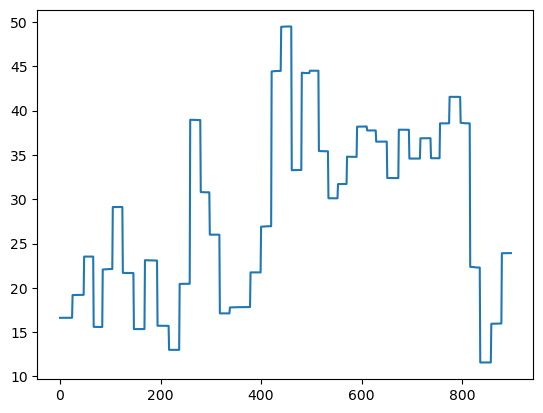

In [85]:
plt.plot(ds_sub.MLD)

# combined sattelite

In [33]:
ds_work = xr.open_dataset('ds_cal_1.nc')
ds_work


<xarray.Dataset>
Dimensions:          (sg_data_point: 1011760)
Coordinates:
    longitude        (sg_data_point) float64 ...
    latitude         (sg_data_point) float64 ...
    ctd_depth        (sg_data_point) float64 ...
    ctd_time_dt64    (sg_data_point) datetime64[ns] ...
    distance         (sg_data_point) float64 ...
    tot_distance     (sg_data_point) float64 ...
    dives            (sg_data_point) float64 ...
Dimensions without coordinates: sg_data_point
Data variables:
    temp             (sg_data_point) float64 ...
    salinity         (sg_data_point) float64 ...
    o2               (sg_data_point) float64 ...
    pressure         (sg_data_point) float64 ...
    spectral_slope   (sg_data_point) float64 ...
    backscatter_470  (sg_data_point) float64 ...
    backscatter_700  (sg_data_point) float64 ...
Attributes:
    description:  dataset including QC and calibrated variables

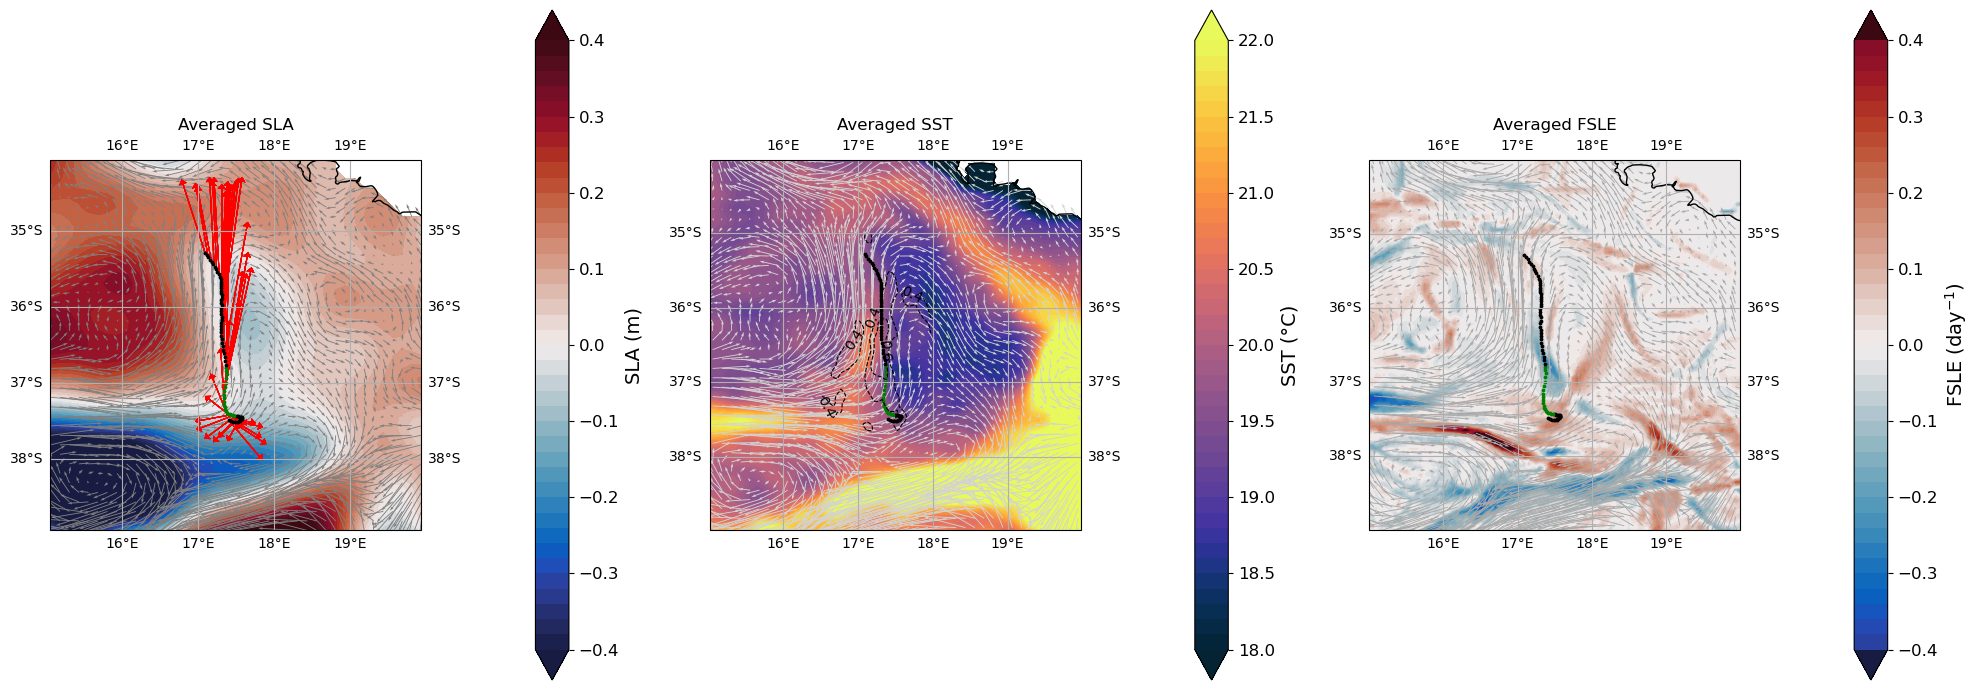

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cmocean as cmo
import pandas as pd
import xarray as xr
import os


# Assuming your data paths are correct and variables like FSLE, SST, ADT, etc., are already loaded
# Define start and end dates
start_date = pd.to_datetime("2023-05-6")
end_date = pd.to_datetime("2023-05-16")

# Define file path patterns
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE5/fsle_{:%Y-%m-%d}.nc"
file_path_pattern_AVISO = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sla/dt_global_allsat_phy_l4_{:%Y%m%d}_20241023.nc"
file_path_pattern_forward = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/FSLE5/forward/fsle_{:%Y-%m-%d}.nc"

# Define latitude and longitude range
lat_range = slice(-39, -34)
lon_range = slice(15, 20)

# Initialize lists to store FSLE and AVISO data
fsle_list = []
ugos_list = []
vgos_list = []
adt_list = []
sla_list  = []

# Iterate over the dates and collect FSLE and AVISO data
for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    file_path_forward = file_path_pattern_forward.format(current_date)
    file_path_AVISO = file_path_pattern_AVISO.format(current_date)

    if not os.path.exists(file_path) or not os.path.exists(file_path_forward) or not os.path.exists(file_path_AVISO):
        continue

    # Load FSLE and AVISO datasets
    ds = xr.open_dataset(file_path)
    ds_forward = xr.open_dataset(file_path_forward)
    ds_AVISO = xr.open_dataset(file_path_AVISO)

    # Select AVISO data and add to lists
    FSLE = ds['lambda1'].sel(lat=lat_range, lon=lon_range)
    FSLE_forward = ds_forward['lambda1'].sel(lat=lat_range, lon=lon_range)
    ugos = ds_AVISO['ugos'].sel(latitude=lat_range, longitude=lon_range)
    vgos = ds_AVISO['vgos'].sel(latitude=lat_range, longitude=lon_range)
    adt = ds_AVISO['adt'].sel(latitude=lat_range, longitude=lon_range)
    sla = ds_AVISO['sla'].sel(latitude=lat_range, longitude=lon_range)

    ugos_list.append(ugos)
    vgos_list.append(vgos)
    adt_list.append(adt)
    sla_list.append(sla)
    combined_fsle = xr.concat([FSLE, FSLE_forward], dim="time")
    fsle_list.append(combined_fsle)

# Combine all time slices for FSLE, currents, and ADT into single datasets
ugos_combined = xr.concat(ugos_list, dim="time")
vgos_combined = xr.concat(vgos_list, dim="time")
adt_combined = xr.concat(adt_list, dim="time")
sla_combined = xr.concat(sla_list, dim="time")
fsle_combined = xr.concat(fsle_list, dim="time")

    

# Compute averages
ugos_avg = ugos_combined.mean(dim="time")
vgos_avg = vgos_combined.mean(dim="time")
adt_avg = adt_combined.mean(dim="time")
sla_avg = sla_combined.mean(dim="time")
fsle_avg = fsle_combined.mean(dim="time")



# Create the figure with 3 subpanels horizontally aligned
fig, axes = plt.subplots(1, 3, figsize=(20, 7), subplot_kw={'projection': ccrs.PlateCarree()})



# Panel 1: Averaged FSLE with quiver and ADT contour

# Convert start_time and end_time to numpy datetime64
start_time = np.datetime64('2023-05-06T12:57:43.048470816')  # Example: adjust to your actual start time
end_time = np.datetime64('2023-05-16T02:33:46.029582425')  # Example: adjust to your actual end time

# Use these datetime64 objects for comparison
ds_sub = ds_work.where(
    (ds_work.latitude >= -38) & (ds_work.latitude <= -35) &
    (ds_work.longitude >= 16.5) & (ds_work.longitude <= 18) &
    (ds_work.ctd_time_dt64 >= start_time) & (ds_work.ctd_time_dt64 <= end_time) &
    (ds_work.ctd_depth <= 5),
    drop=True
)

# Ensure dives alignment
valid_dives = ds_sub.dives.where(ds_sub.dives.isin(ds_dac.prof_num), drop=True)

# Subsample ds_sub to match valid_dives
ds_sub_filtered = ds_sub.where(ds_sub.dives.isin(valid_dives), drop=True)

# Extract start_lon, start_lat, and start_depth for the arrows
start_lon = ds_sub_filtered.longitude.values
start_lat = ds_sub_filtered.latitude.values


# Extract the necessary data for vectors
u_east = ds_dac.u_east.sel(prof_num=valid_dives).values
v_north = ds_dac.u_north.sel(prof_num=valid_dives).values

# Compute the magnitude of the velocity vector
magnitude = np.sqrt(u_east**2 + v_north**2)



# Subset the data for the specified latitude and longitude range
subset_glider = ds_glider.where(
    (ds_glider.lat >= -38) & (ds_glider.lat <= -35) &
    (ds_glider.distance >= 600) & (ds_glider.distance <= 720) &
    (ds_glider.long >= 17) & (ds_glider.long <= 18), 
    drop=True
)

# Further subset the data by distance ranges
subset_600_630 = subset_glider.where((subset_glider.distance >= 600) & (subset_glider.distance < 630), drop=True)
subset_630_660 = subset_glider.where((subset_glider.distance >= 630) & (subset_glider.distance < 660), drop=True)
subset_660_720 = subset_glider.where((subset_glider.distance >= 660) & (subset_glider.distance <= 720), drop=True)



ax1 = axes[0]
contour1 = ax1.contourf(sla_avg.longitude, sla_avg.latitude, sla_avg, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4, levels=np.linspace(-0.4, 0.4, 41), extend='both')
ax1.quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color='grey', scale=6)
ax1.quiver(start_lon, start_lat, u_east, v_north, color='red', scale=1.5, headwidth = 8, transform= ccrs.PlateCarree())
ax1.scatter(subset_600_630.long, subset_600_630.lat, color='black', s=3, label='600-630')
ax1.scatter(subset_630_660.long, subset_630_660.lat, color='green', s=3, label='630-660')
ax1.scatter(subset_660_720.long, subset_660_720.lat, color='black', s=3, label='660-720')
ax1.coastlines()
ax1.set_title('Averaged SLA', fontsize=12)
ax1.gridlines(draw_labels=True)

# Panel 2: Averaged SST with quiver and ADT contour
ds_sst_sel = ds_sst['analysed_sst'].sel(time=slice(start_date, end_date))
ds_sst_sub = ds_sst_sel.sel(latitude=lat_range, longitude=lon_range) -272.15
sst_avg = ds_sst_sub.mean(dim="time")

ax2 = axes[1]
contour2 = ax2.contourf(sst_avg.longitude, sst_avg.latitude, sst_avg, cmap=cmo.cm.thermal, vmin=18, vmax=22, levels=np.linspace(18, 22, 41), extend='both')
ax2.quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color='lightgrey', scale=5)
contour_tempgrad = ax2.contour(grad_avg.longitude, grad_avg.latitude, grad_avg, levels=[0.4,0.6], colors = 'black', linestyles = 'dashed', linewidths =0.8, transform = ccrs.PlateCarree())
ax2.clabel(contour_tempgrad, fmt= '%1.1f',inline = True, fontsize = 10, colors = 'black', inline_spacing = 5)
ax2.scatter(subset_600_630.long, subset_600_630.lat, color='black', s=3, label='600-630')
ax2.scatter(subset_630_660.long, subset_630_660.lat, color='green', s=3, label='630-660')
ax2.scatter(subset_660_720.long, subset_660_720.lat, color='black', s=3, label='660-720')
ax2.coastlines()
ax2.set_title('Averaged SST', fontsize=12)
ax2.gridlines(draw_labels=True)

# Panel 3: Another relevant metric (e.g., ADT or other data)
ax3 = axes[2]


# Forward FSLE as contour lines

contour3 = ax3.contourf(fsle_avg.lon, fsle_avg.lat, fsle_avg.T, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, levels=np.linspace(-0.4, 0.4, 41), extend='both')
ax3.quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color='darkgrey', scale=6)
ax3.scatter(subset_600_630.long, subset_600_630.lat, color='black', s=3, label='600-630')
ax3.scatter(subset_630_660.long, subset_630_660.lat, color='green', s=3, label='630-660')
ax3.scatter(subset_660_720.long, subset_660_720.lat, color='black', s=3, label='660-720')
ax3.coastlines()
ax3.set_title('Averaged FSLE', fontsize=12)
ax3.gridlines(draw_labels=True)

# Add colorbars for each panel with larger label and tick sizes
cbar1 = fig.colorbar(contour1, ax=ax1, orientation='vertical', pad=0.2)
cbar1.set_label('SLA (m)', fontsize=14)  # Make the colorbar label larger
cbar1.ax.tick_params(labelsize=12)  # Increase tick label size

cbar2 = fig.colorbar(contour2, ax=ax2, orientation='vertical', pad=0.2)
cbar2.set_label('SST (°C)', fontsize=14)  # Make the colorbar label larger
cbar2.ax.tick_params(labelsize=12)  # Increase tick label size

cbar3 = fig.colorbar(contour3, ax=ax3, orientation='vertical', pad=0.2)
cbar3.set_label('FSLE (day$^{-1}$)', fontsize=14)  # Make the colorbar label larger
cbar3.ax.tick_params(labelsize=12)  # Increase tick label size

# Make the contour labels on the axes bigger
ax1.tick_params(labelsize=12)  # Increase x and y ticks for ax1
ax2.tick_params(labelsize=12)  # Increase x and y ticks for ax2
ax3.tick_params(labelsize=12)  # Increase x and y ticks for ax3

# Adjust layout to prevent overlap
plt.tight_layout()

# Save or display the figure
plt.savefig("combined_3_panels_plot.png", dpi=300)
plt.show()


# combined sattelite with AOU

In [39]:
ds_glider['AOU'] = ds_glider.sol - ds_glider.o2

# Step 2: Calculate the mean AOU between 300m and 700m
depth_range = (ds_glider.ctd_depth >= 300) & (ds_glider.ctd_depth <= 700)
mean_AOU = ds_glider.AOU.where(depth_range, drop=True).mean(dim='ctd_depth')
subset_glider['mean_AOU'] = mean_AOU

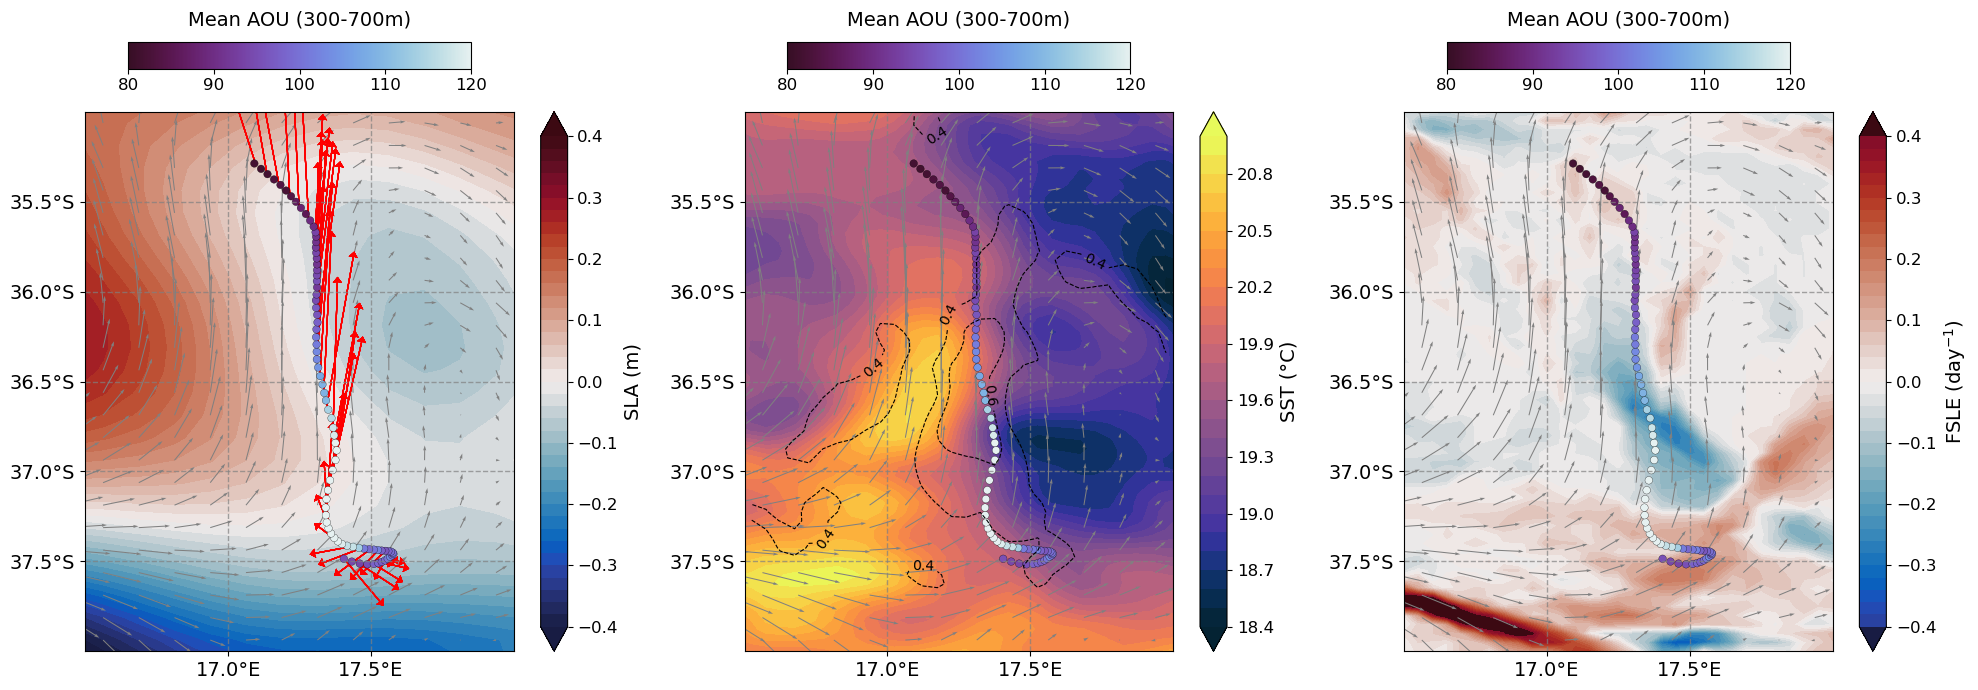

In [40]:
import matplotlib.pyplot as plt
import cmocean as cmo
import numpy as np
import matplotlib.ticker as mticker

# Assuming ds_glider and subset_glider are already defined with necessary data

# Set up figure with 3 subpanels horizontally aligned
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Define longitude and latitude tick intervals
lon_ticks = np.arange(17, 18, 0.5)
lat_ticks = np.arange(-37.5, -35, 0.5)

# Formatter functions for ticks
def lat_formatter(lat, pos):
    direction = "S" if lat < 0 else "N"
    return f"{abs(lat)}°{direction}"

def lon_formatter(lon, pos):
    direction = "E" if lon > 0 else "W"
    return f"{abs(lon)}°{direction}"

# Add plots
for i, ax in enumerate(axes):
    # Shared limits
    ax.set_xlim(16.5, 18)
    ax.set_ylim(-38, -35)

    # Set primary ticks and formatters
    ax.set_xticks(lon_ticks)
    ax.set_yticks(lat_ticks)
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lon_formatter))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lat_formatter))
    
    # Increase tick label size
    ax.tick_params(axis="both", which="major", labelsize=14)

    # Add grid lines
    ax.grid(which="both", linestyle="--", linewidth=1, color="gray", alpha=0.7)

    # Add secondary axes with aligned ticks and formatters
    #secax_x = ax.secondary_xaxis("top", functions=(lambda x: x, lambda x: x))
    #secax_y = ax.secondary_yaxis("right", functions=(lambda y: y, lambda y: y))
    #secax_x.set_xticks(lon_ticks)
    #secax_y.set_yticks(lat_ticks)
    #secax_x.xaxis.set_major_formatter(mticker.FuncFormatter(lon_formatter))
    #secax_y.yaxis.set_major_formatter(mticker.FuncFormatter(lat_formatter))

    # Ensure top and right ticks are visible
    #ax.tick_params(axis="x", which="both", labelsize=12, top=True, labeltop=False)  
    #ax.tick_params(axis="y", which="both", labelsize=12, right=True, labelright=False)  
    #secax_x.tick_params(axis="x", which="both", labelsize=12, top=True, labeltop=True)  
    #secax_y.tick_params(axis="y", which="both", labelsize=12, right=True, labelright=True)  

# Panel 1: Averaged SLA with quiver and ADT contour
contour1 = axes[0].contourf(sla_avg.longitude, sla_avg.latitude, sla_avg, cmap=cmo.cm.balance,
                            vmin=-0.4, vmax=0.4, levels=np.linspace(-0.4, 0.4, 41), extend="both")
axes[0].quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color="grey", scale=6)
axes[0].quiver(start_lon, start_lat, u_east, v_north, color='red', scale=1.5, headwidth = 8)

# Panel 2: Averaged SST with quiver and ADT contour
contour2 = axes[1].contourf(sst_avg.longitude, sst_avg.latitude, sst_avg, cmap=cmo.cm.thermal,
                            vmin=18.4, vmax=21, levels=np.linspace(18.4, 21, 27), extend="both")
axes[1].quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color="grey", scale=5)
contour_tempgrad = axes[1].contour(grad_avg.longitude, grad_avg.latitude, grad_avg, 
                                   levels=[0.4, 0.6], colors='black', linestyles='dashed', linewidths=0.8)
axes[1].clabel(contour_tempgrad, fmt='%1.1f', inline=True, fontsize=10, colors='black', inline_spacing=5)

# Scatter plot with color for Mean AOU
scatter_600_720 = axes[0].scatter(
    subset_glider.long, subset_glider.lat, 
    s=30,  # Size of dots
    c=subset_glider.mean_AOU, 
    cmap=cmo.cm.dense_r, 
    vmin=80, vmax=120,
    edgecolors='black',  # Black contour around dots
    linewidths=0.2  # Controls the thickness of the contour
)

# Scatter plot with color for Mean AOU
scatter_600_720 = axes[1].scatter(
    subset_glider.long, subset_glider.lat, 
    s=30,  # Size of dots
    c=subset_glider.mean_AOU, 
    cmap=cmo.cm.dense_r, 
    vmin=80, vmax=120,
    edgecolors='black',  # Black contour around dots
    linewidths=0.2  # Controls the thickness of the contour
)

# Colorbar for AOU above each subplot
for ax in axes:
    cbar_ax = ax.inset_axes([0.1, 1.08, 0.8, 0.05])  # [left, bottom, width, height]
    cbar = fig.colorbar(scatter_600_720, cax=cbar_ax, orientation="horizontal")
    
    # Move label above the colorbar
    cbar.set_label("Mean AOU (300-700m)", fontsize=14, labelpad=-60)  # Adjust labelpad as needed
    
    cbar.ax.tick_params(labelsize=12)

# Panel 3: Averaged FSLE
contour3 = axes[2].contourf(fsle_avg.lon, fsle_avg.lat, fsle_avg.T, cmap=cmo.cm.balance,
                            vmin=-0.5, vmax=0.5, levels=np.linspace(-0.4, 0.4, 41), extend="both")
axes[2].quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color="grey", scale=6)

# Scatter plot with color for Mean AOU
scatter_600_720 = axes[2].scatter(
    subset_glider.long, subset_glider.lat, 
    s=30,  # Size of dots
    c=subset_glider.mean_AOU, 
    cmap=cmo.cm.dense_r, 
    vmin=80, vmax=120,
    edgecolors='black',  # Black contour around dots
    linewidths=0.2  # Controls the thickness of the contour
)

# Add colorbars for each panel
cbar1 = fig.colorbar(contour1, ax=axes[0], orientation="vertical", pad=0.05)
cbar1.set_label("SLA (m)", fontsize=14)
cbar1.ax.tick_params(labelsize=12)

cbar2 = fig.colorbar(contour2, ax=axes[1], orientation="vertical", pad=0.05)
cbar2.set_label("SST (°C)", fontsize=14)
cbar2.ax.tick_params(labelsize=12)

cbar3 = fig.colorbar(contour3, ax=axes[2], orientation="vertical", pad=0.05)
cbar3.set_label("FSLE (day$^{-1}$)", fontsize=14)
cbar3.ax.tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()

# Save or display the figure
plt.savefig("combined_3_panels_plot_with_top_colorbars.png", dpi=300)
plt.show()



C:\Users\rensk\AppData\Local\Temp\ipykernel_10120\896863275.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusted for top colorbars


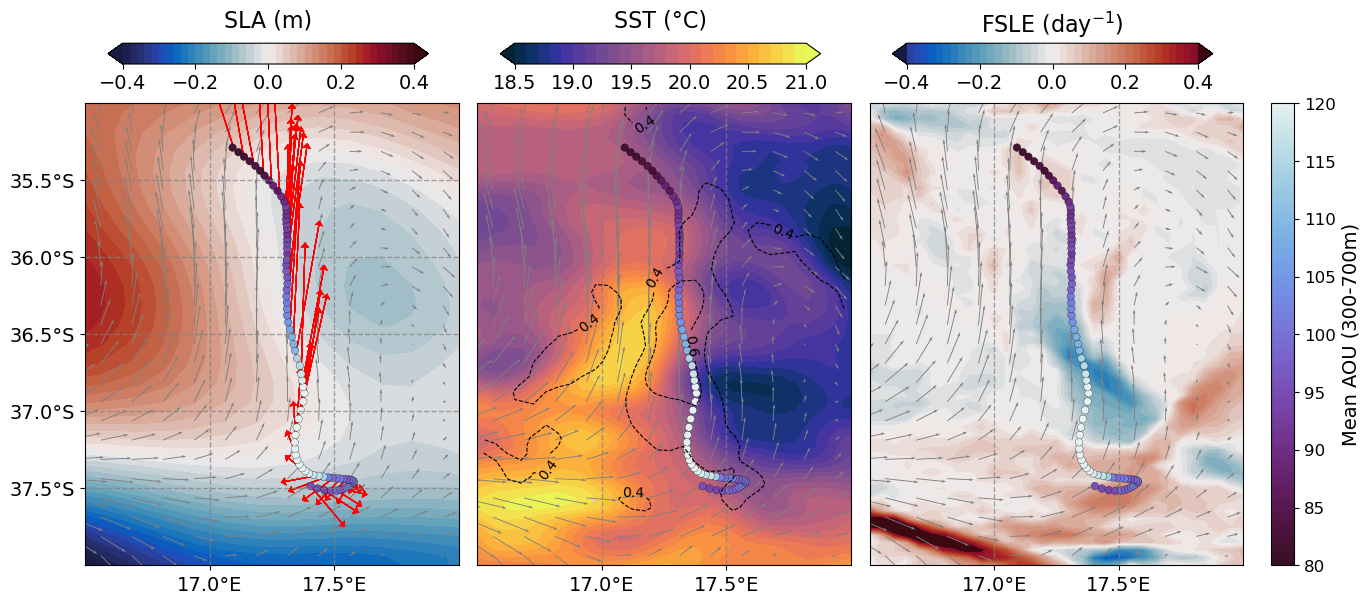

In [79]:
import matplotlib.pyplot as plt
import cmocean as cmo
import numpy as np
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes  # For precise colorbar positioning

# Set up figure with 3 horizontally aligned subpanels
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'wspace': 0.05})  # Reduced spacing

# Define longitude and latitude tick intervals
lon_ticks = np.arange(17, 18, 0.5)
lat_ticks = np.arange(-37.5, -35, 0.5)

# Formatter functions for ticks
def lat_formatter(lat, pos):
    direction = "S" if lat < 0 else "N"
    return f"{abs(lat)}°{direction}"

def lon_formatter(lon, pos):
    direction = "E" if lon > 0 else "W"
    return f"{abs(lon)}°{direction}"

# Add plots
for i, ax in enumerate(axes):
    ax.set_xlim(16.5, 18)
    ax.set_ylim(-38, -35)
    ax.set_xticks(lon_ticks)
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lon_formatter))
    
    # Show latitude ticks only on the first panel
    if i == 0:
        ax.set_yticks(lat_ticks)
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lat_formatter))
    else:
        ax.set_yticks([])  # Hide latitude ticks on second and third panels

    ax.tick_params(axis="both", which="major", labelsize=14)
    ax.grid(which="both", linestyle="--", linewidth=1, color="gray", alpha=0.7)

# --- Panel 1: Averaged SLA ---
contour1 = axes[0].contourf(sla_avg.longitude, sla_avg.latitude, sla_avg, cmap=cmo.cm.balance,
                            vmin=-0.4, vmax=0.4, levels=np.linspace(-0.4, 0.4, 41), extend="both")
axes[0].quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color="grey", scale=6)
axes[0].quiver(start_lon, start_lat, u_east, v_north, color='red', scale=1.5, headwidth=8)

# --- Panel 2: Averaged SST ---
contour2 = axes[1].contourf(sst_avg.longitude, sst_avg.latitude, sst_avg, cmap=cmo.cm.thermal,
                            vmin=18.4, vmax=21, levels=np.linspace(18.5, 21, 26), extend="both")
axes[1].quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color="grey", scale=5)
contour_tempgrad = axes[1].contour(grad_avg.longitude, grad_avg.latitude, grad_avg, 
                                   levels=[0.4, 0.6], colors='black', linestyles='dashed', linewidths=0.8)
axes[1].clabel(contour_tempgrad, fmt='%1.1f', inline=True, fontsize=10, colors='black', inline_spacing=5)

# --- Panel 3: Averaged FSLE ---
contour3 = axes[2].contourf(fsle_avg.lon, fsle_avg.lat, fsle_avg.T, cmap=cmo.cm.balance,
                            vmin=-0.5, vmax=0.5, levels=np.linspace(-0.4, 0.4, 41), extend="both")
axes[2].quiver(ugos_avg.longitude, ugos_avg.latitude, ugos_avg, vgos_avg, color="grey", scale=6)

# --- Scatter plot with Mean AOU (all panels) ---
for ax in axes:
    scatter_600_720 = ax.scatter(
        subset_glider.long, subset_glider.lat, 
        s=30,  # Size of dots
        c=subset_glider.mean_AOU, 
        cmap=cmo.cm.dense_r, 
        vmin=80, vmax=120,
        edgecolors='black',
        linewidths=0.2
    )



# --- Colorbars ---
# Place colorbars above the corresponding panels using inset_axes
colorbars = [
    (contour1, axes[0], "SLA (m)"),
    (contour2, axes[1], "SST (°C)"),
    (contour3, axes[2], "FSLE (day$^{-1}$)")
]



from mpl_toolkits.axes_grid1.inset_locator import inset_axes

for contour, ax, label in colorbars:
    # Create an inset axis for colorbar
    cbar_ax = inset_axes(ax, width="110%", height="90%",  
                         loc="upper center", 
                         bbox_to_anchor=(0.1, 1.08, 0.78, 0.05),  
                         bbox_transform=ax.transAxes, 
                         borderpad=0)
    
    # Add colorbar
    cbar = fig.colorbar(contour, cax=cbar_ax, orientation="horizontal")
    
    # Set tick intervals
    if "SLA" in label or "FSLE" in label:
        cbar.set_ticks(np.arange(-0.4, 0.5, 0.2))  # Ticks every 0.2 for SLA & FSLE
    elif "SST" in label:
        cbar.set_ticks(np.arange(18.5, 21.5, 0.5))  # Ticks every 0.5 for SST

    # Customize appearance
    cbar.set_label(label, fontsize=16, labelpad=-60)  
    cbar.ax.tick_params(labelsize=14)


# Vertical AOU colorbar on the rightmost side
cbar_aou = fig.colorbar(scatter_600_720, ax=axes, location="right", pad=0.02)
cbar_aou.set_label("Mean AOU (300-700m)", fontsize=14)
cbar_aou.ax.tick_params(labelsize=12)

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusted for top colorbars
plt.savefig("final_adjusted_plot.png", dpi=300)
plt.show()


# FSLE long lat space

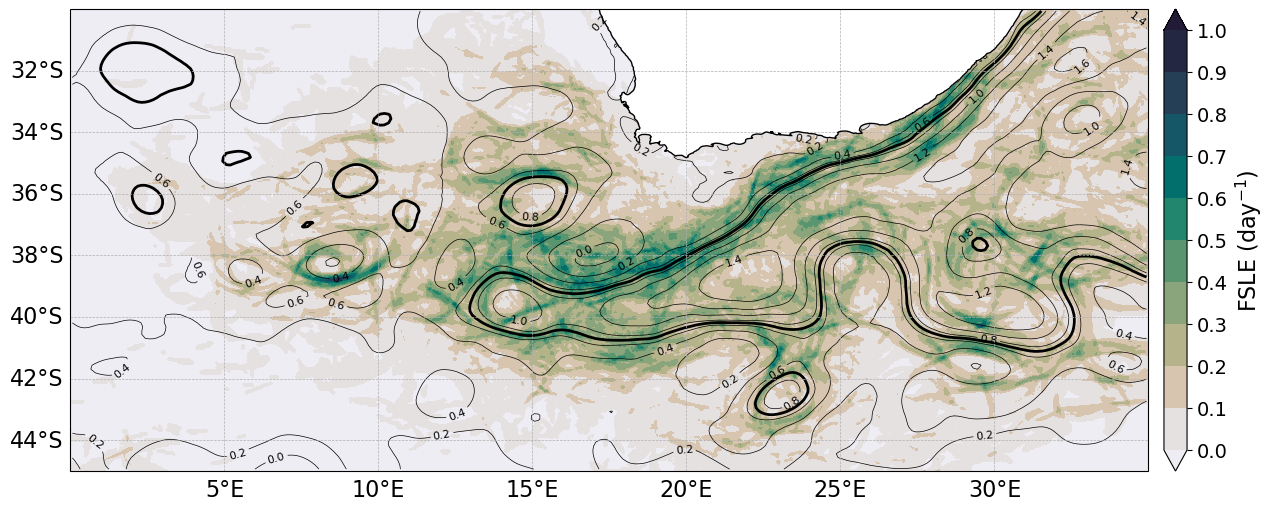

In [321]:
import pandas as pd
import xarray as xr
import numpy as np
import os

# Define start and end dates
start_date = pd.to_datetime("2023-03-22").strftime('%Y-%m-%d')
end_date = pd.to_datetime("2023-5-23").strftime('%Y-%m-%d')


# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sla/dt_global_allsat_phy_l4_{:%Y%m%d}_20241023.nc"

# Select latitude and longitude range
lat_range = slice(-45, -30)
lon_range = slice(0, 35)

adt_datasets = []

for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Extract ADT data
    adt = ds['adt'].sel(latitude=lat_range, longitude=lon_range)
    adt_datasets.append(adt)
    

# Compute mean EKE and ADT over the period
#eke_mean = xr.concat(eke_datasets, dim='time').mean(dim='time')
adt_mean = xr.concat(adt_datasets, dim='time').mean(dim='time')

# Plot the mean EKE and ADT
plt.figure(figsize=(20, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
# Define the longitude and latitude bounds
lon_min, lon_max = 0, 35
lat_min, lat_max = -45, -30


# Select only the relevant subset
#subset_dsf = combined_dsf.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
#subset_ds = combined_ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

# Select only the relevant subset
subset_dsf = combined_dsf.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
subset_ds = combined_ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))



subtot = (np.abs(subset_dsf.lambda1.T) + np.abs(subset_ds.lambda1)).mean(dim='time')

lon_values, lat_values = np.meshgrid(subtot.lon, subtot.lat)



cbar_levels = np.arange(0, 1.1, 0.1)  

 

# Plot the data
p = ax.contourf(lon_values, lat_values, subtot, levels = cbar_levels, cmap=cmocean.cm.rain, transform=ccrs.PlateCarree(), extend = 'both')

# Add colorbar

cbar = plt.colorbar(p, ax=ax, label='FSLE (day$^{-1}$)', ticks=cbar_levels, pad=0.01)
cbar.ax.tick_params(labelsize=14)  # Increase tick label size
cbar.set_label('FSLE (day$^{-1}$)', fontsize=16)  # Increase colorbar title size





# Plot the mean ADT with contours
adt_levels = np.arange(-0.2, 1.8, 0.2)
adt_contours = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=adt_levels, 
                           colors='black', linestyles='-', linewidths=0.5, transform=ccrs.PlateCarree())
plt.clabel(adt_contours, fmt='%2.1f', colors='black', fontsize=8)

# Highlight the contour at ADT = 0.7 with a thicker line
adt_highlight_contour = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=[0.7], 
                                    colors='black', linestyles='-', linewidths=2, transform=ccrs.PlateCarree())
# Overlay land in white to mask Africa
ax.add_feature(cfeature.LAND, color='white', zorder=2)


# Enhance the coastline visibility
ax.coastlines(color='black', linewidth=1, zorder=3)  # Thicker and more visible
# Customize gridlines: Show only left (latitude) and bottom (longitude)
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.xlabel_style = {'size': 16}  # Increase longitude label size
gl.ylabel_style = {'size': 16}  # Increase latitude label size


# Set labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')


# Extract glider path (example data)


plt.savefig('countFSLE.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

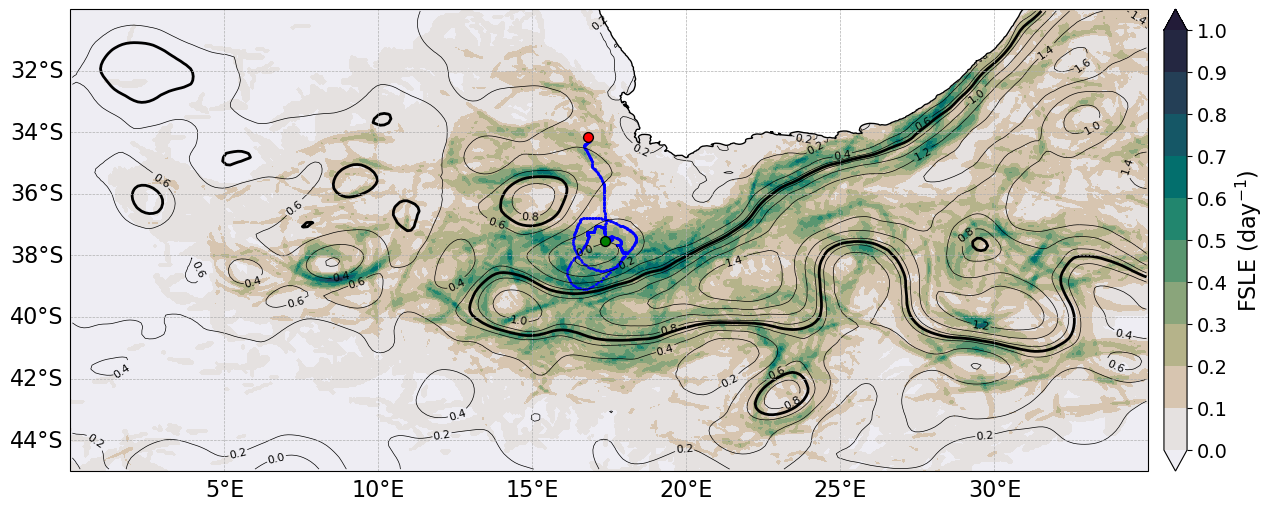

In [89]:
import pandas as pd
import xarray as xr
import numpy as np
import os

# Define start and end dates
start_date = pd.to_datetime("2023-03-22").strftime('%Y-%m-%d')
end_date = pd.to_datetime("2023-5-23").strftime('%Y-%m-%d')


# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sla/dt_global_allsat_phy_l4_{:%Y%m%d}_20241023.nc"

# Select latitude and longitude range
lat_range = slice(-45, -30)
lon_range = slice(0, 35)

adt_datasets = []

for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Extract ADT data
    adt = ds['adt'].sel(latitude=lat_range, longitude=lon_range)
    adt_datasets.append(adt)
    

# Compute mean EKE and ADT over the period
#eke_mean = xr.concat(eke_datasets, dim='time').mean(dim='time')
adt_mean = xr.concat(adt_datasets, dim='time').mean(dim='time')

# Plot the mean EKE and ADT
plt.figure(figsize=(20, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
# Define the longitude and latitude bounds
lon_min, lon_max = 0, 35
lat_min, lat_max = -45, -30


# Select only the relevant subset
#subset_dsf = combined_dsf.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
#subset_ds = combined_ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

# Select only the relevant subset
subset_dsf = combined_dsf.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
subset_ds = combined_ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))



subtot = (np.abs(subset_dsf.lambda1.T) + np.abs(subset_ds.lambda1)).mean(dim='time')

lon_values, lat_values = np.meshgrid(subtot.lon, subtot.lat)



cbar_levels = np.arange(0, 1.1, 0.1)  

 

# Plot the data
p = ax.contourf(lon_values, lat_values, subtot, levels = cbar_levels, cmap=cmocean.cm.rain, transform=ccrs.PlateCarree(), extend = 'both')







# Plot the mean ADT with contours
adt_levels = np.arange(-0.2, 1.8, 0.2)
adt_contours = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=adt_levels, 
                           colors='black', linestyles='-', linewidths=0.5, transform=ccrs.PlateCarree())
plt.clabel(adt_contours, fmt='%2.1f', colors='black', fontsize=8)

# Highlight the contour at ADT = 0.7 with a thicker line
adt_highlight_contour = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=[0.7], 
                                    colors='black', linestyles='-', linewidths=2, transform=ccrs.PlateCarree())

cbar = plt.colorbar(p, ax=ax, label='FSLE (day$^{-1}$)', ticks=cbar_levels, pad=0.01)
cbar.ax.tick_params(labelsize=14)  # Increase tick label size
cbar.set_label('FSLE (day$^{-1}$)', fontsize=16)  # Increase colorbar title size

ax.add_feature(cfeature.LAND, color='white', zorder=2)

# Enhance the coastline visibility
ax.coastlines(color='black', linewidth=1, zorder=3)  # Thicker and more visible
# Customize gridlines: Show only left (latitude) and bottom (longitude)
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.xlabel_style = {'size': 16}  # Increase longitude label size
gl.ylabel_style = {'size': 16}  # Increase latitude label size


# Set labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')



# Extract glider path (example data)
# Replace with your actual glider data

# Extract glider path (example data)
# Replace with your actual glider data
lat = ds_glider['lat']
lon = ds_glider['long']

# Add the glider path
plt.scatter(lon, lat, color='blue', label='SG675', s=1)

# Highlight the start point
plt.scatter(lon[0], lat[0], color='green', label='Start', s=50, edgecolor='black', zorder=3)

# Highlight the stop point
plt.scatter(lon[-1], lat[-1], color='red', label='End', s=50, edgecolor='black', zorder=3)


# Show legend
#plt.legend()

plt.savefig('countFSLE.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


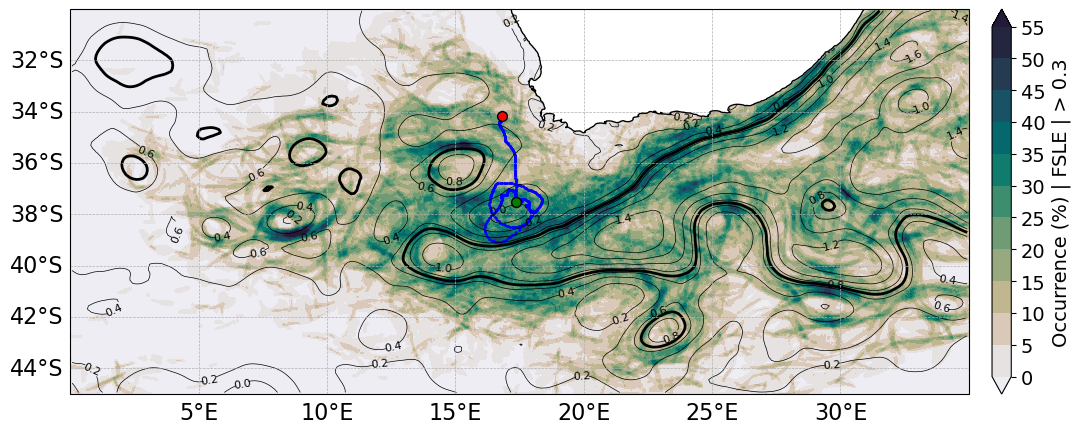

In [90]:
import pandas as pd
import xarray as xr
import numpy as np
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Define start and end dates
start_date = pd.to_datetime("2023-03-22").strftime('%Y-%m-%d')
end_date = pd.to_datetime("2023-5-23").strftime('%Y-%m-%d')


# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sla/dt_global_allsat_phy_l4_{:%Y%m%d}_20241023.nc"

# Select latitude and longitude range
lat_range = slice(-45, -30)
lon_range = slice(0, 35)

adt_datasets = []

for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  # Check if the file exists
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Extract ADT data
    adt = ds['adt'].sel(latitude=lat_range, longitude=lon_range)
    adt_datasets.append(adt)
    

# Compute mean EKE and ADT over the period
#eke_mean = xr.concat(eke_datasets, dim='time').mean(dim='time')
adt_mean = xr.concat(adt_datasets, dim='time').mean(dim='time')

# Plot the mean EKE and ADT
plt.figure(figsize=(30, 5))
ax = plt.axes(projection=ccrs.PlateCarree())




# Define the longitude and latitude bounds
lon_min, lon_max = 0, 35
lat_min, lat_max = -45, -30

# Select only the relevant subset
subset_dsf = combined_dsf.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
subset_ds = combined_ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

lon_values, lat_values = np.meshgrid(subset_dsf.lon, subset_dsf.lat)

# Compute count where |lambda1| > 1
count_dsf = np.abs(subset_dsf.lambda1) > 0.3
count_dsf = count_dsf.sum(dim='time')

# Compute count where lambda1 > 1
count_ds = np.abs(subset_ds.lambda1) > 0.3
count_ds = count_ds.sum(dim='time')



# Total number of time steps
total_time_steps = subset_dsf.sizes['time']

# Compute percentage of time each grid point is an outlier
occurrence = ((count_dsf.T + count_ds)/ total_time_steps) * 100/2  # Convert to percentage

cbar_levels = np.arange(0, 60, 5)  

# Plot the data
p = ax.contourf(lon_values, lat_values, occurrence, levels = cbar_levels, cmap=cmocean.cm.rain, transform=ccrs.PlateCarree(), extend = 'both')


cbar = plt.colorbar(p, ax=ax, label='Occurrence (%) | FSLE | > 0.3', ticks=cbar_levels, pad=0.01)
cbar.ax.tick_params(labelsize=14)  # Increase tick label size
cbar.set_label('Occurrence (%) | FSLE | > 0.3', fontsize=14)  # Increase colorbar title size



# Plot the mean ADT with contours
adt_levels = np.arange(-0.2, 1.8, 0.2)
adt_contours = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=adt_levels, 
                           colors='black', linestyles='-', linewidths=0.5, transform=ccrs.PlateCarree())
plt.clabel(adt_contours, fmt='%2.1f', colors='black', fontsize=8)

# Highlight the contour at ADT = 0.7 with a thicker line
adt_highlight_contour = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=[0.7], 
                                    colors='black', linestyles='-', linewidths=2, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='white', zorder=2)

# Enhance the coastline visibility
ax.coastlines(color='black', linewidth=1, zorder=3)  # Thicker and more visible
# Customize gridlines: Show only left (latitude) and bottom (longitude)
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.xlabel_style = {'size': 16}  # Increase longitude label size
gl.ylabel_style = {'size': 16}  # Increase latitude label size


# Set labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')


# Extract glider path (example data)
# Replace with your actual glider data

# Extract glider path (example data)
# Replace with your actual glider data
lat = ds_glider['lat']
lon = ds_glider['long']

# Add the glider path
plt.scatter(lon, lat, color='blue', label='SG675', s=1)

# Highlight the start point
plt.scatter(lon[0], lat[0], color='green', label='Start', s=50, edgecolor='black', zorder=3)

# Highlight the stop point
plt.scatter(lon[-1], lat[-1], color='red', label='End', s=50, edgecolor='black', zorder=3)


# Show legend
#plt.legend()

plt.savefig('countFSLE.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


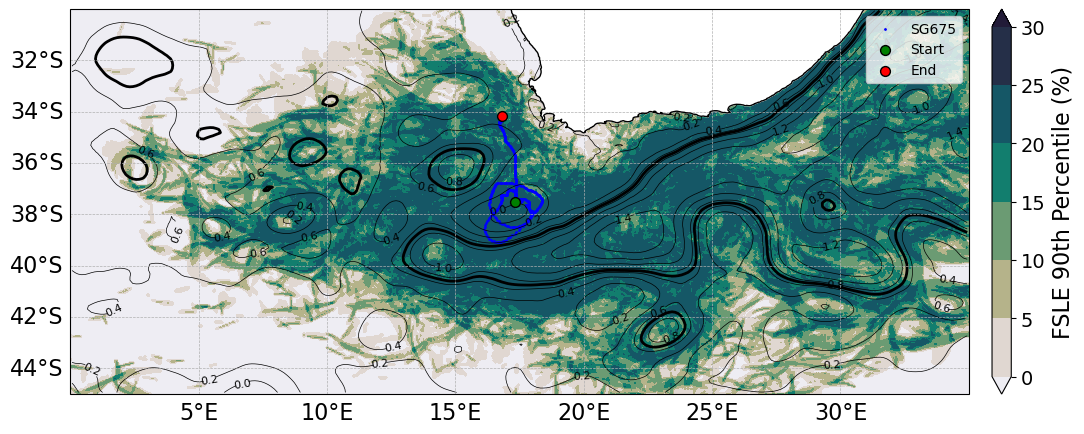

In [229]:
import pandas as pd
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from scipy.stats import norm

# Define start and end dates
start_date = pd.to_datetime("2023-03-22").strftime('%Y-%m-%d')
end_date = pd.to_datetime("2023-05-23").strftime('%Y-%m-%d')

# Define the file path pattern
file_path_pattern = "C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sla/dt_global_allsat_phy_l4_{:%Y%m%d}_20241023.nc"

# Select latitude and longitude range
lat_range = slice(-45, -30)
lon_range = slice(0, 35)

adt_datasets = []

for current_date in pd.date_range(start=start_date, end=end_date):
    file_path = file_path_pattern.format(current_date)
    if not os.path.exists(file_path):  
        continue
    
    ds = xr.open_dataset(file_path)
    
    # Extract ADT data
    adt = ds['adt'].sel(latitude=lat_range, longitude=lon_range)
    adt_datasets.append(adt)
    

#adt_datasets = ds['adt'].sel(latitude=lat_range, longitude=lon_range)

# Compute mean ADT over the period
adt_mean = xr.concat(adt_datasets, dim='time').mean(dim='time')

# Define the longitude and latitude bounds
lon_min, lon_max = 0, 35
lat_min, lat_max = -45, -30

# Remove NaNs before computing percentiles
subset_dsf = subset_dsf.where(np.isfinite(subset_dsf.lambda1))
subset_ds = subset_ds.where(np.isfinite(subset_ds.lambda1))

total = (subset_dsf.lambda1.T + subset_ds.lambda1)


mu_ds = total.mean(dim='time')
sigma_ds = total.std(dim='time')


# Compute 10th and 90th percentiles for lambda1 over time
lower_bound_dsf = total.quantile(0.1, dim='time', skipna=True)
upper_bound_dsf = total.quantile(0.9, dim='time', skipna=True)


# Identify outliers where lambda1 is outside the middle 80% range
outliers_dsf = (total < lower_bound_dsf) | (total > upper_bound_dsf)




# Count how many times each grid point is outside the 80% interval
count_dsf = outliers_dsf.sum(dim='time')





# Create figure with Cartopy projection
fig, ax = plt.subplots(figsize=(30, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Total number of time steps
total_time_steps = subset_dsf.sizes['time']

# Compute percentage of time each grid point is an outlier
occurrence = ((count_dsf)/ total_time_steps) * 100  # Convert to percentage


lon_values, lat_values = np.meshgrid(subset_dsf.lon, subset_dsf.lat)
# Plot the data
# Define colorbar levels from 0 to 50 with 5% intervals
cbar_levels = np.arange(0, 31, 5)  # Stops at 50

# Plot the data with defined levels
p = ax.contourf(lon_values, lat_values, occurrence, levels=cbar_levels, cmap=cmocean.cm.rain, transform=ccrs.PlateCarree(), extend= 'both')

cbar = plt.colorbar(p, ax=ax, label='Occurrence (%)', ticks=cbar_levels, pad=0.01)
cbar.ax.tick_params(labelsize=14)  # Increase tick label size
cbar.set_label('FSLE 90th Percentile (%)', fontsize=16)  # Increase colorbar title size

# Overlay land in white to mask Africa
ax.add_feature(cfeature.LAND, color='white', zorder=2) 

# Plot the mean ADT with contours
adt_levels = np.arange(-0.2, 1.8, 0.2)
adt_contours = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=adt_levels, 
                           colors='black', linestyles='-', linewidths=0.5, transform=ccrs.PlateCarree())
plt.clabel(adt_contours, fmt='%2.1f', colors='black', fontsize=8)

# Highlight the contour at ADT = 0.7
adt_highlight_contour = plt.contour(adt_mean.longitude, adt_mean.latitude, adt_mean, levels=[0.7], 
                                    colors='black', linestyles='-', linewidths=2, transform=ccrs.PlateCarree())

# Add coastlines and gridlines
# Overlay land in white to mask Africa
ax.add_feature(cfeature.LAND, color='white', zorder=2)

# Enhance the coastline visibility
ax.coastlines(color='black', linewidth=1, zorder=3)  # Thicker and more visible
# Customize gridlines: Show only left (latitude) and bottom (longitude)
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.xlabel_style = {'size': 16}  # Increase longitude label size
gl.ylabel_style = {'size': 16}  # Increase latitude label size


# Set labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Extract glider path
lat = ds_glider['lat']
lon = ds_glider['long']

# Add the glider path
plt.scatter(lon, lat, color='blue', label='SG675', s=1)

# Highlight the start and end points
plt.scatter(lon[0], lat[0], color='green', label='Start', s=50, edgecolor='black', zorder=3)
plt.scatter(lon[-1], lat[-1], color='red', label='End', s=50, edgecolor='black', zorder=3)

# Show legend
plt.legend()

# Save and show plot
plt.savefig('gaussian_outliers.png', dpi=300, bbox_inches='tight')
plt.show()


# collocated FSLE with glider

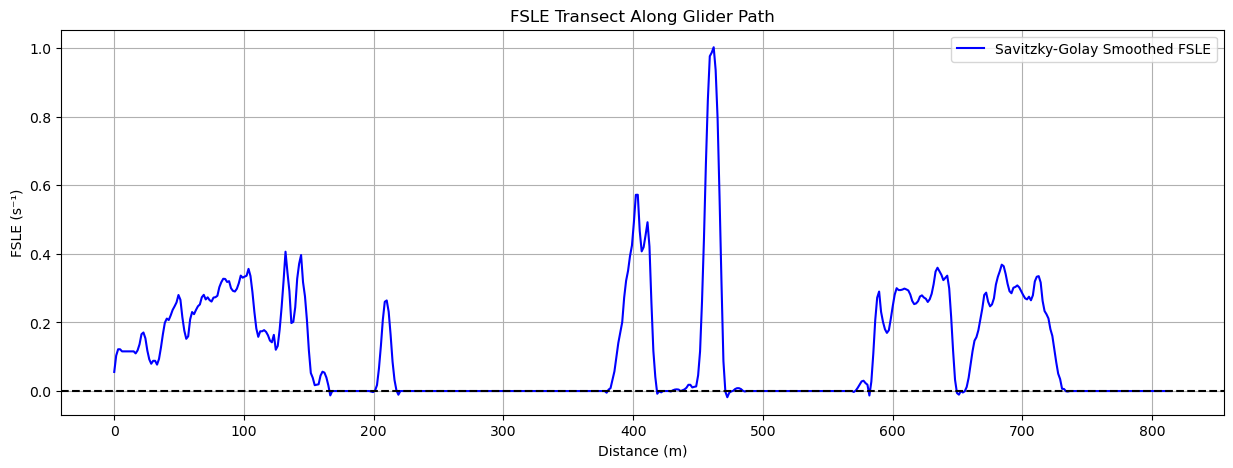

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.interpolate import interp1d  # For smoothing
from scipy.signal import savgol_filter 

# Assuming combined_ds and ds_glider are already loaded

# Extract glider longitudes, latitudes, times, and distances
glider_lons = ds_glider['long'].values
glider_lats = ds_glider['lat'].values
glider_times = pd.to_datetime(ds_glider['time'].values)
glider_distances = ds_glider['distance'].values  # Ensure 'distance' is in the ds_glider dataset

# Initialize lists to store FSLE values and corresponding distances
fsle_values = []          # Initialize as a list
valid_distances = []      # Initialize as a list

# Loop through each glider position
for i in range(len(glider_times)):
    glider_time = glider_times[i]
    glider_lon = glider_lons[i]
    glider_lat = glider_lats[i]
    
    # Find the nearest time to glider_time
    nearest_time = combined_dsf.lambda1.time.sel(time=glider_time, method='nearest')  

    # Define the radius around the glider's location (e.g., 0.5 degrees)
    radius = 0.125


    # Define the lat-lon bounds around the glider location
    lat_range = slice(glider_lat - radius, glider_lat + radius)
    lon_range = slice(glider_lon - radius, glider_lon + radius)

    # Select data within the defined area at the nearest time
    area_subset =  combined_dsf.lambda1.sel(time=nearest_time, lat=lat_range, lon=lon_range)

    # Compute the average over the area
    fsle_value = area_subset.mean(dim=['lat', 'lon'])


    # Check if the FSLE value is valid (not NaN)
    if not np.isnan(fsle_value):
        fsle_values.append(fsle_value.item())  # Use .item() to get a scalar value
        valid_distances.append(glider_distances[i])  # Append corresponding distances

# Convert to numpy arrays for plotting
fsle_values = np.array(fsle_values)
valid_distances = np.array(valid_distances)

# Check if we have valid data for plotting
if len(fsle_values) > 0 and len(valid_distances) > 0:
    # Apply the Savitzky-Golay filter
    window_length = 7  # Choose an odd number for the window length
    polyorder = 3  # Polynomial order for fitting
    # Make sure the window length does not exceed the length of the data
    if window_length > len(fsle_values):
        window_length = len(fsle_values) // 2 * 2 + 1  # Ensure it's odd and not larger than the data

    # Apply Savitzky-Golay filter for smoothing
    smooth_fsle = savgol_filter(fsle_values, window_length, polyorder)

    # Create the transect plot
    plt.figure(figsize=(15, 5))
    plt.plot(valid_distances, smooth_fsle, marker='', linestyle='-', color='b', label='Savitzky-Golay Smoothed FSLE')  # Smooth line
    #plt.scatter(valid_distances, fsle_values, color='red', s=10, label='Original Data Points')  # Original data points
    plt.xlabel('Distance (m)')
    plt.ylabel('FSLE (s⁻¹)')
    plt.title('FSLE Transect Along Glider Path')
    plt.axhline(0, color='black', linestyle='--') 
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No valid FSLE values found for the given glider distances.")



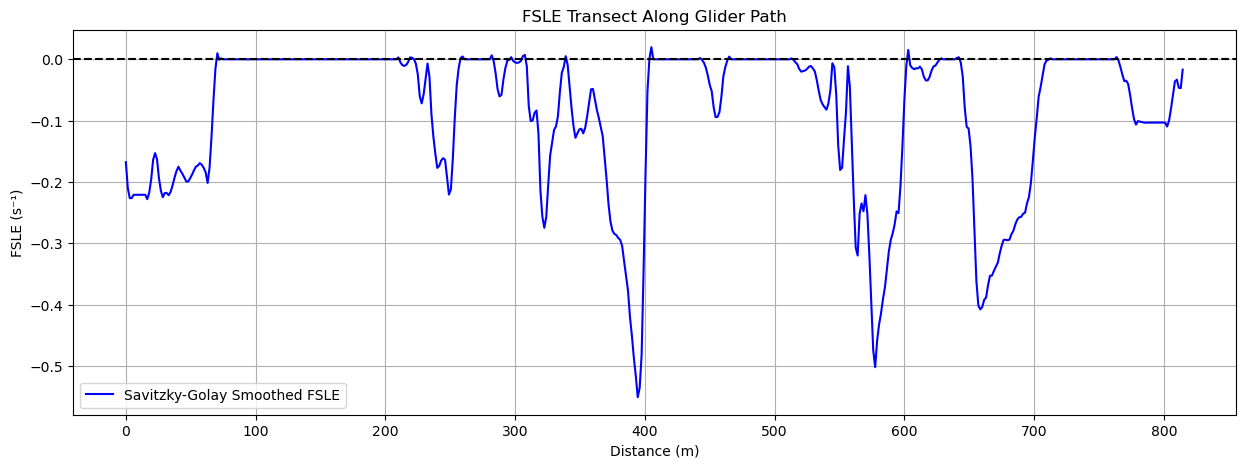

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.interpolate import interp1d  # For smoothing
from scipy.signal import savgol_filter 

# Assuming combined_ds and ds_glider are already loaded

# Extract glider longitudes, latitudes, times, and distances
glider_lons = ds_glider['long'].values
glider_lats = ds_glider['lat'].values
glider_times = pd.to_datetime(ds_glider['time'].values)
glider_distances = ds_glider['distance'].values  # Ensure 'distance' is in the ds_glider dataset

# Initialize lists to store FSLE values and corresponding distances
fsle_values = []          # Initialize as a list
valid_distances = []      # Initialize as a list

# Loop through each glider position
for i in range(len(glider_times)):
    glider_time = glider_times[i]
    glider_lon = glider_lons[i]
    glider_lat = glider_lats[i]
    
    # Find the nearest time to glider_time
    nearest_time = combined_ds.lambda1.time.sel(time=glider_time, method='nearest')  

    # Define the radius around the glider's location (e.g., 0.5 degrees)
    radius = 0.125

    # Define the lat-lon bounds around the glider location
    lat_range = slice(glider_lat - radius, glider_lat + radius)
    lon_range = slice(glider_lon - radius, glider_lon + radius)

    # Select data within the defined area at the nearest time
    area_subset =  combined_ds.lambda1.sel(time=nearest_time, lat=lat_range, lon=lon_range)

    # Compute the average over the area
    fsle_value = area_subset.mean(dim=['lat', 'lon'])


    # Check if the FSLE value is valid (not NaN)
    if not np.isnan(fsle_value):
        fsle_values.append(fsle_value.item())  # Use .item() to get a scalar value
        valid_distances.append(glider_distances[i])  # Append corresponding distances

# Convert to numpy arrays for plotting
fsle_values = np.array(fsle_values)
valid_distances = np.array(valid_distances)

# Check if we have valid data for plotting
if len(fsle_values) > 0 and len(valid_distances) > 0:
    # Apply the Savitzky-Golay filter
    window_length = 7  # Choose an odd number for the window length
    polyorder = 3  # Polynomial order for fitting
    # Make sure the window length does not exceed the length of the data
    if window_length > len(fsle_values):
        window_length = len(fsle_values) // 2 * 2 + 1  # Ensure it's odd and not larger than the data

    # Apply Savitzky-Golay filter for smoothing
    smooth_fsle2 = savgol_filter(fsle_values, window_length, polyorder)

    # Create the transect plot
    plt.figure(figsize=(15, 5))
    plt.plot(valid_distances, smooth_fsle2, marker='', linestyle='-', color='b', label='Savitzky-Golay Smoothed FSLE')  # Smooth line
    #plt.scatter(valid_distances, fsle_values, color='red', s=10, label='Original Data Points')  # Original data points
    plt.xlabel('Distance (m)')
    plt.ylabel('FSLE (s⁻¹)')
    plt.title('FSLE Transect Along Glider Path')
    plt.axhline(0, color='black', linestyle='--') 
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No valid FSLE values found for the given glider distances.")

In [150]:
mixed_layer_densities = []

for i in range(len(ds_glider.distance)):
    # Calculate density for the current ATD point
    density = gsw.sigma0(ds_glider.salinity.isel(distance=i), ds_glider.temp.isel(distance=i)).expand_dims(distance=ds_glider.distance)
    
    # Select reference depth based on the value of ATD
    if ds_glider.distance.isel(distance=i).item() == 0:
        reference_depth = 13
    else:
        reference_depth = 10
    
    # Calculate the reference density at the chosen reference depth
    reference_density = density.sel(ctd_depth=reference_depth)
    density_difference = density - reference_density
    
    # Find the index where the difference is greater than the threshold for the first time
    mixed_layer_index_flat = np.argmax((density_difference > 0.03).values)
    
    # Get the depth index where the difference is greater than the threshold for the first time
    mixed_layer_index = mixed_layer_index_flat.item()
    
    # Get the density value at that depth for the current ATD point
    mixed_layer_density = density.isel(ctd_depth=mixed_layer_index, distance=i)
    
    # Append the mixed layer density directly to the list
    mixed_layer_densities.append(mixed_layer_density)

# Concatenate the list of mixed layer densities along the ATD dimension
mixed_layer_densities = xr.concat(mixed_layer_densities, dim=ds_glider.distance)

In [151]:
# NaN zero values
mixed_layer_densities['ctd_depth'] = mixed_layer_densities['ctd_depth'].where(mixed_layer_densities['ctd_depth'] != 0.0, np.nan)
mixed_layer_densities['ctd_depth'] = mixed_layer_densities['ctd_depth'].where(mixed_layer_densities['ctd_depth'] != 0., np.nan)
MLD = mixed_layer_densities.ctd_depth

In [152]:
rho_sorted = np.empty((len(ds_glider.ctd_depth.data),len(ds_glider.distance.data)))

rho = gsw.density.rho(ds_glider.salinity, ds_glider.temp, ds_glider.p)

# Sort density while keeping NaNs in their original positions
for i in range(len(ds_glider.distance.data)):
    arr = rho.data[:, i]
    nan_mask = np.isnan(arr)
    non_nan_values = arr[~nan_mask]
    
    # Sort non-NaN values
    sorted_non_nan_values = np.sort(non_nan_values)
    
    # Create a copy of the original array to preserve NaN positions
    sorted_arr = np.copy(arr)
    
    # Replace non-NaN values in the sorted array
    sorted_arr[~nan_mask] = sorted_non_nan_values
    
    # Store in rho_sorted
    rho_sorted[:, i] = sorted_arr

g = 9.81
ref_rho = 1025

b = g*(1 - rho_sorted / ref_rho)

b

array([[        nan,         nan,         nan, ..., -0.00489036,
                nan,         nan],
       [        nan,         nan, -0.00093542, ..., -0.00490742,
                nan,         nan],
       [        nan, -0.00063719, -0.00095164, ..., -0.00492679,
        -0.00509402,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [153]:
beginning = 26.4  # Beginning value
ending = 27.8    # Ending value
spacing = 0.2    # Spacing between contour lines
levels = np.arange(beginning, ending + spacing, spacing)

by = (np.diff(b, axis=1)/1500)

zero_column = np.zeros((by.shape[0], 1))

by = np.hstack([by,zero_column])

# Custom moving average function that excludes NaN values
def moving_average_with_nan(x, window_size):
    y = np.copy(x)  # Copy of the original array to avoid modifying it directly
    for i in range(len(x)):
        # Define the window range around the current index
        window_start = max(0, i - window_size // 2)
        window_end = min(len(x), i + window_size // 2 + 1)
        window = x[window_start:window_end]
        
        # Exclude NaN values from the window
        valid_window = window[~np.isnan(window)]
        
        # Calculate mean only if there are valid (non-NaN) values
        y[i] = np.mean(valid_window) if len(valid_window) > 0 else np.nan
    return y

# Track NaN positions in rho_sorted
nan_mask_b = np.isnan(by)

# First, smooth along the depth axis (axis=0)
#rho_smoothed_depth = np.apply_along_axis(moving_average_with_nan, 0, rho_sorted, window_size=10)

# Next, smooth along the distance axis (axis=1)
by_smoothed = np.apply_along_axis(moving_average_with_nan, 1, by, window_size=5)

# Restore NaN values to their original positions
by_smoothed[nan_mask_b] = np.nan

by_smoothed

array([[            nan,             nan,             nan, ...,
                    nan,             nan,  0.00000000e+00],
       [            nan,             nan,  4.51731379e-09, ...,
                    nan,             nan,  0.00000000e+00],
       [            nan, -2.91704757e-09, -4.90541251e-08, ...,
        -1.30270659e-08,             nan, -5.57423373e-08],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,  0.00000000e+00],
       [            nan,             nan,             nan, ...,
                    nan,             nan,  0.00000000e+00],
       [            nan,             nan,             nan, ...,
                    nan,             nan,  0.00000000e+00]])

In [154]:
data_array = xr.DataArray(
    by_smoothed,
    dims=["ctd_depth", "distance"],# Replace with appropriate dimension names
    coords={
        "ctd_depth": np.arange(2001),  # Generate or replace with actual time coordinates
        "distance": np.arange(544)   # Generate or replace with actual depth coordinates
    },
    name="hor_b"  # Replace with your variable's name
)

ds_glider["hor_b"] = data_array

In [230]:
selected_depth_range = data_array.where((data_array['ctd_depth']  >= 300) & (data_array['ctd_depth'] <= MLD + 700 ), drop=True)

# Calculate the mean over this depth range along the 'ctd_depth' dimension
b_sur = selected_depth_range.mean(dim="ctd_depth", skipna=True)
ds_glider['b_sur'] = b_sur

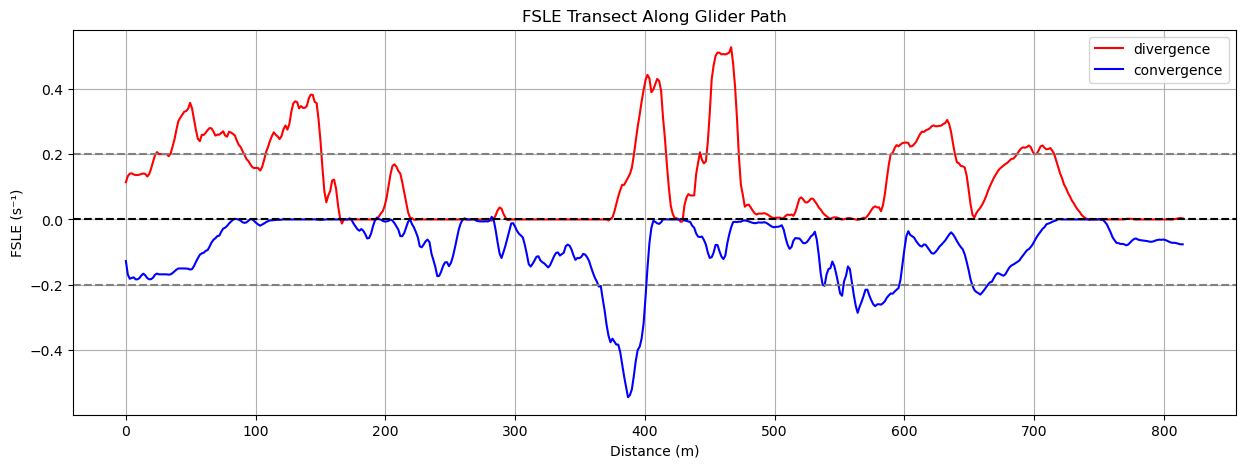

In [206]:
    # Create the transect plot
    plt.figure(figsize=(15, 5))
    plt.plot(valid_distances, smooth_fsle, marker='', linestyle='-', color='r', label='divergence') 
    plt.plot(valid_distances, smooth_fsle2, marker='', linestyle='-', color='b', label='convergence')# Smooth line
    plt.axhline(0, color='black', linestyle='--')
    plt.axhline(-0.2, color='grey', linestyle='--')
    plt.axhline(0.2, color='grey', linestyle='--')
    plt.xlabel('Distance (m)')
    plt.ylabel('FSLE (s⁻¹)')
    plt.title('FSLE Transect Along Glider Path')
    plt.legend()
    plt.grid()
    plt.show()

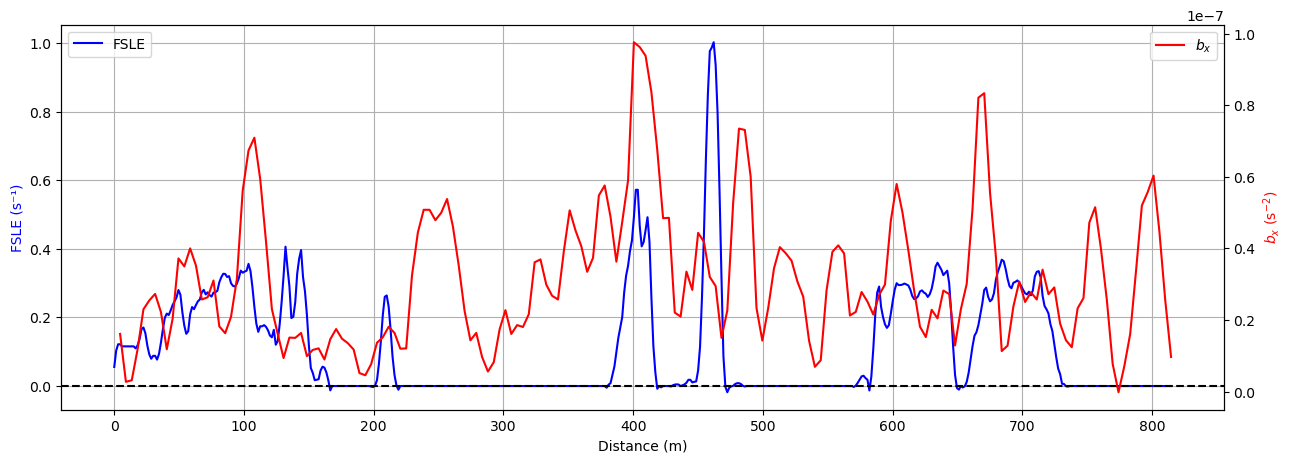

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Ensure `smooth_fsle` and `valid_distances` are defined as per previous calculations

# Filter out NaN values and take absolute values for `b_sur`
valid_b_sur_values = np.abs(ds_glider.b_sur.values[~np.isnan(ds_glider.b_sur.values)])
valid_distances_b_sur = ds_glider.distance.values[~np.isnan(ds_glider.b_sur.values)] * 1.5  # Scale distance by 1.5

# Apply Savitzky-Golay filter to smooth `b_sur`
window_length = 7  # Ensure odd and <= length of valid `b_sur` data
polyorder = 3

# Adjust window length if necessary
if len(valid_b_sur_values) < window_length:
    window_length = max(3, len(valid_b_sur_values) // 2 * 2 + 1)  # Keep it odd

# Smooth absolute `b_sur` values
smooth_b_sur = savgol_filter(valid_b_sur_values, window_length, polyorder)

# Create plot with FSLE values on the primary y-axis
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(valid_distances, smooth_fsle, color='b', label='FSLE')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('FSLE (s⁻¹)', color='b')
ax1.axhline(0, color='black', linestyle='--') 
ax1.legend(loc="upper left")
ax1.grid()


# Create a twin y-axis for `b_sur` with a color bar on the right
ax2 = ax1.twinx()
# Plot absolute smoothed `b_sur` values on right y-axis with a color map
scatter = ax2.plot(valid_distances_b_sur, smooth_b_sur, color= 'r', label=('$b_x$'))
ax2.set_ylabel('$b_x\ (\mathrm{s}^{-2})$', color='r')
ax2.legend(loc="upper right")


plt.show()



In [160]:
import numpy as np
import xarray as xr
import gsw

mixed_layer_densities = []

for i in range(len(ds_glider.distance)):
    # Calculate density for the current ATD point
    density = gsw.sigma0(ds_glider.salinity.isel(distance=i), ds_glider.temp.isel(distance=i)).expand_dims(distance=ds_glider.distance)
    
    # Select reference depth based on the value of ATD
    if ds_glider.distance.isel(distance=i).item() == 0:
        reference_depth = 13
    else:
        reference_depth = 10
    
    # Calculate the reference density at the chosen reference depth
    reference_density = density.sel(ctd_depth=reference_depth)
    density_difference = density - reference_density
    
    # Find the index where the difference is greater than the threshold for the first time
    mixed_layer_index_flat = np.argmax((density_difference > 0.03).values)
    
    # Get the depth index where the difference is greater than the threshold for the first time
    mixed_layer_index = mixed_layer_index_flat.item()
    
    # Get the density value at that depth for the current ATD point
    mixed_layer_density = density.isel(ctd_depth=mixed_layer_index, distance=i)
    
    # Append the mixed layer density directly to the list
    mixed_layer_densities.append(mixed_layer_density)

# Concatenate the list of mixed layer densities along the ATD dimension
mixed_layer_densities = xr.concat(mixed_layer_densities, dim=ds_glider.distance)
# NaN zero values
mixed_layer_densities['ctd_depth'] = mixed_layer_densities['ctd_depth'].where(mixed_layer_densities['ctd_depth'] != 0.0, np.nan)
mixed_layer_densities['ctd_depth'] = mixed_layer_densities['ctd_depth'].where(mixed_layer_densities['ctd_depth'] != 0., np.nan)
MLD = mixed_layer_densities.ctd_depth

In [161]:
# Convert time to pandas datetime
time_as_datetime = pd.to_datetime(ds_glider.time.values)

# Get the start of the year for each timestamp
start_of_year = pd.to_datetime(time_as_datetime.year.astype(str) + '-01-01')

# Calculate the difference in seconds between the time and the start of the year
time_difference = (time_as_datetime - start_of_year).total_seconds()

# Calculate yearday with decimals
yearday_with_decimals = time_difference / (24 * 60 * 60) + 1

# Add yearday with decimals as a new data variable in ds_glider
ds_glider = ds_glider.assign(year_day=("time", yearday_with_decimals))
ds_glider

<xarray.Dataset>
Dimensions:         (ctd_depth: 2001, distance: 544, time: 544)
Coordinates:
  * ctd_depth       (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 999.0 999.5 1e+03
  * distance        (distance) float64 0.0 1.5 3.0 4.5 ... 811.5 813.0 814.5
    long            (distance) float64 17.32 17.34 17.35 ... 16.83 16.82 16.8
    lat             (distance) float64 -37.52 -37.53 -37.54 ... -34.18 -34.16
    time            (distance) datetime64[ns] 2023-03-22T08:33:43 ... 2023-05...
Data variables:
    temp            (ctd_depth, distance) float64 ...
    salinity        (ctd_depth, distance) float64 ...
    o2              (ctd_depth, distance) float64 ...
    sol             (ctd_depth, distance) float64 ...
    p               (ctd_depth, distance) float64 ...
    spectral_slope  (ctd_depth, distance) float64 ...
    bp_470_grid_15  (ctd_depth, distance) float64 ...
    bp_700_grid_15  (ctd_depth, distance) float64 ...
    AOU             (ctd_depth, distance) float64 nan nan nan ... nan nan nan
    hor_b           (ctd_depth, distance) float64 nan nan nan ... nan nan nan
    b_sur           (distance) float64 nan nan 3.558e-08 nan ... nan nan nan nan
    year_day        (time) float64 81.36 81.5 81.59 81.67 ... 143.5 143.6 143.7
Attributes:
    title:          Gridded Dataset in distance relative to current
    description:    Dataset including gridded data in distance and cleaned va...
    author:         Renske Koets
    institution:    Gothenburg University
    creation_date:  2024-10-05
    comment:        This dataset contains temperature, salinity, oxygen, and ...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import cmocean.cm as cmo
import gsw
import pandas as pd


# Convert time to yearday with decimals
time_as_datetime = pd.to_datetime(ds_glider.time.values)
start_of_year = pd.to_datetime(time_as_datetime.year.astype(str) + '-01-01')
time_difference = (time_as_datetime - start_of_year).total_seconds()
yearday_with_decimals = time_difference / (24 * 60 * 60) + 1
ds_glider = ds_glider.assign(year_day=("time", yearday_with_decimals))
# Replace NaN values with zero in the ds_glider.year_day DataArray
ds_glider['year_day'] = ds_glider['year_day'].fillna(0)

# Prepare FSLE and b_sur data
valid_b_sur_values = np.abs(ds_glider.b_sur.values[~np.isnan(ds_glider.b_sur.values)])
valid_distances_b_sur = ds_glider.distance.values[~np.isnan(ds_glider.b_sur.values)] * 1.5
window_length = 7
polyorder = 3
if len(valid_b_sur_values) < window_length:
    window_length = max(3, len(valid_b_sur_values) // 2 * 2 + 1)
smooth_b_sur = savgol_filter(valid_b_sur_values, window_length, polyorder)

# Calculate density and AOU
density = gsw.sigma0(ds_glider.salinity, ds_glider.temp)
AOU = ds_glider.sol - ds_glider.o2

# Create the figure
fig, ax = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 1.5]}, constrained_layout=True)

# Enforce the same x-axis limits across both subplots
x_min, x_max = 0, np.max(ds_glider.distance)

# FSLE and b_sur (Top plot)
ax[0].plot(valid_distances, smooth_fsle, color='black', label='FSLE')
ax[0].set_xlim(x_min, x_max)  # Set x-axis range
ax[0].set_ylabel('FSLE (s⁻¹)', fontsize=16, color='black')
ax[0].tick_params(axis='both', labelsize=14)
ax[0].axhline(0, color='black', linestyle='--')
ax[0].grid()

# Secondary y-axis for b_sur
ax_b_sur = ax[0].twinx()
ax_b_sur.plot(valid_distances_b_sur, smooth_b_sur, color='grey', label='$b_x$')
ax_b_sur.set_ylabel('$b_x$ ($\mathrm{s}^{-2}$)', fontsize=16, color='grey')
ax_b_sur.tick_params(axis='y', labelsize=14)

# Remove the x-axis ticks and labels from the top plot
ax[0].set_xticklabels([])

# Temperature, Salinity, and AOU (Bottom plot)
img = ax[1].pcolormesh(ds_glider.distance, ds_glider.ctd_depth, AOU, cmap=cmo.dense_r, vmin=40, vmax=150)
ax[1].invert_yaxis()
ax[1].set_xlim(x_min, x_max)  # Set x-axis range to align with the top subplot
ax[1].set_xlabel('Distance (km)', fontsize=16)
ax[1].set_ylabel('Depth (m)', fontsize=16)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].grid()

# Colorbar for AOU
cbar = plt.colorbar(img, ax=ax[1], pad=-0.05)
cbar.set_label('AOU ($\mu$mol kg$^{-1}$)', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Add contours and mixed layer depth
levels = np.arange(26.4, 27.8 + 0.2, 0.2)
ax[1].contour(ds_glider.distance, ds_glider.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
ax[1].plot(mixed_layer_densities.distance, mixed_layer_densities.ctd_depth, color='k', linewidth=2)

# Set the xlabel on the top
ax0 = ax[0].twiny()
ax0.set_xlabel('Yearday', fontsize=18)  # Increased fontsize for yearday

tick_positions = np.arange(0, max(ds_glider.distance), 100)
tick_labels = ds_glider.year_day[np.searchsorted(ds_glider.distance, tick_positions)].astype(int)  # Convert to integers
ax0.set_xlim(ax[0].get_xlim())
ax0.set_xticks(tick_positions)
ax[1].set_xticks(tick_positions)
ax0.set_xticklabels([f'{t:.0f}' for t in tick_labels])

ax0.tick_params(axis='x', which='major', labelsize=14)

# Save and show
plt.savefig("FSLE/Picture3", bbox_inches='tight', dpi=100)
plt.show()


# final figure FSLE 

C:\Users\rensk\AppData\Local\Temp\ipykernel_5584\1394847964.py:107: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for line in cs0.collections:


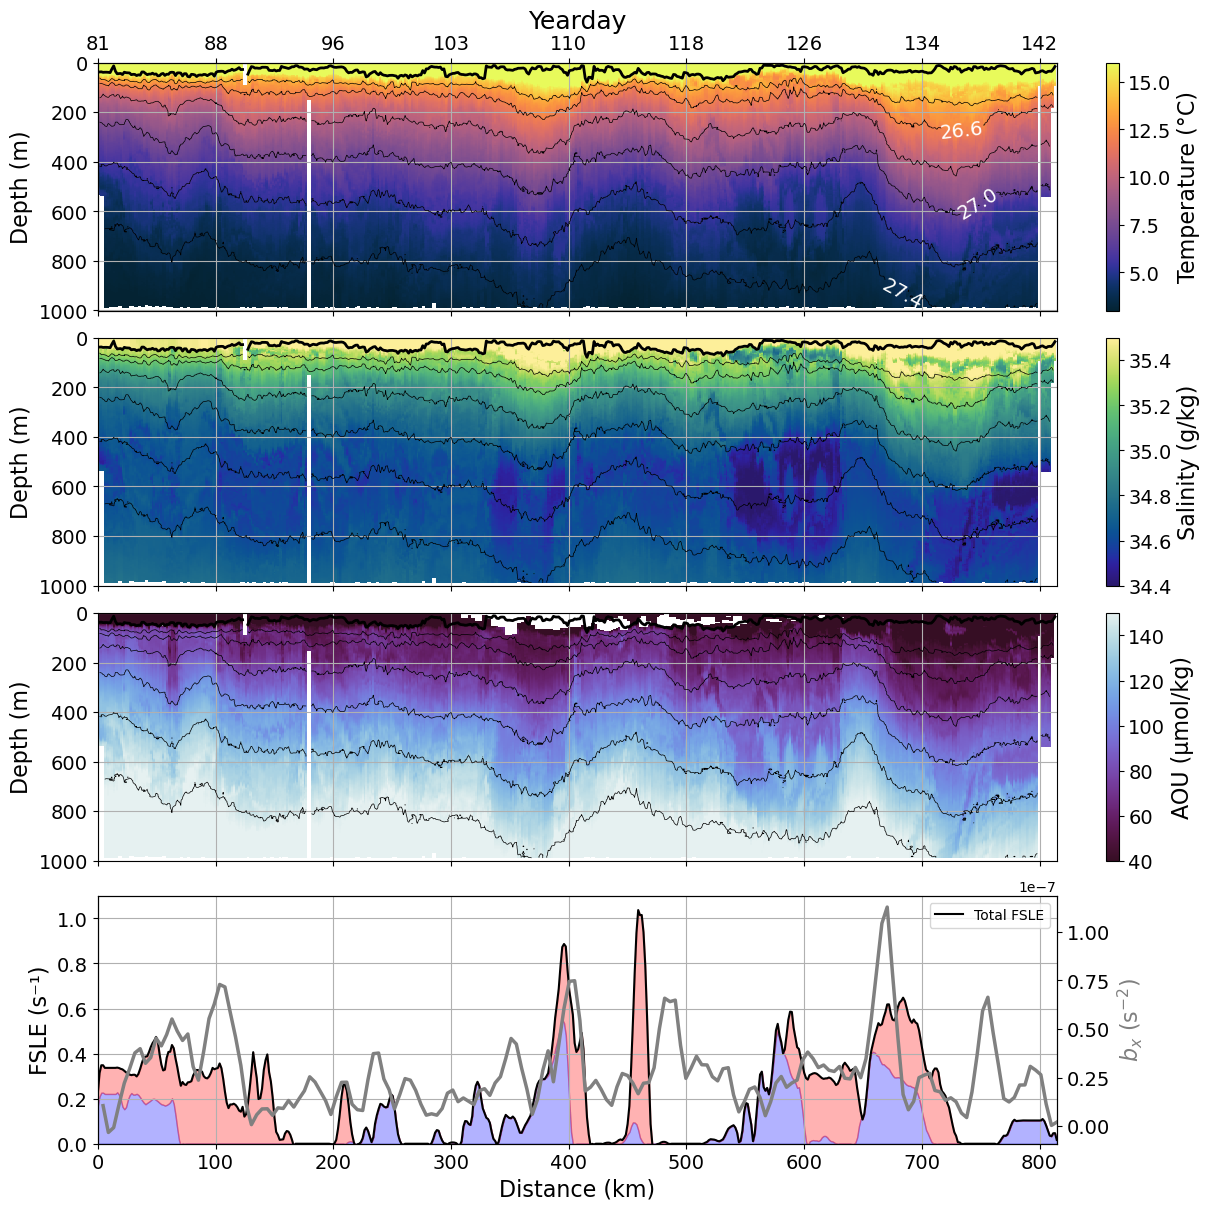

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import cmocean.cm as cmo
import gsw
import pandas as pd



# Convert time to yearday with decimals
time_as_datetime = pd.to_datetime(ds_glider.time.values)
start_of_year = pd.to_datetime(time_as_datetime.year.astype(str) + '-01-01')
time_difference = (time_as_datetime - start_of_year).total_seconds()
yearday_with_decimals = time_difference / (24 * 60 * 60) + 1
ds_glider = ds_glider.assign(year_day=("time", yearday_with_decimals))
ds_glider['year_day'] = ds_glider['year_day'].fillna(0)

# Prepare FSLE and b_sur data
valid_b_sur_values = np.abs(ds_glider.b_sur.values[~np.isnan(ds_glider.b_sur.values)])
valid_distances_b_sur = ds_glider.distance.values[~np.isnan(ds_glider.b_sur.values)] * 1.5
window_length = 7
polyorder = 3
if len(valid_b_sur_values) < window_length:
    window_length = max(3, len(valid_b_sur_values) // 2 * 2 + 1)
smooth_b_sur = savgol_filter(valid_b_sur_values, window_length, polyorder)

# Calculate density and AOU
density = gsw.sigma0(ds_glider.salinity, ds_glider.temp)
AOU = ds_glider.sol - ds_glider.o2

# Create the figure with 4 panels
fig, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1, 1]}, constrained_layout=True)

# Enforce the same x-axis limits across all subplots
x_min, x_max = 0, np.max(ds_glider.distance)

# Temperature (First panel)
img0 = ax[0].pcolormesh(ds_glider.distance, ds_glider.ctd_depth, ds_glider.temp, cmap=cmo.thermal, vmin=3, vmax=16)
ax[0].invert_yaxis()
ax[0].set_ylabel('Depth (m)', fontsize=16)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].grid()

# Colorbar for temperature
cbar0 = plt.colorbar(img0, ax=ax[0], pad=-0.04)
cbar0.set_label('Temperature (°C)', fontsize=16)
cbar0.ax.tick_params(labelsize=14)

# Salinity (Second panel)
img1 = ax[1].pcolormesh(ds_glider.distance, ds_glider.ctd_depth, ds_glider.salinity, cmap=cmo.haline, vmin=34.4, vmax=35.5)
ax[1].invert_yaxis()
ax[1].set_ylabel('Depth (m)', fontsize=16)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].grid()

# Colorbar for salinity
cbar1 = plt.colorbar(img1, ax=ax[1], pad=-0.04)
cbar1.set_label('Salinity (g/kg)', fontsize=16)
cbar1.ax.tick_params(labelsize=14)

# Add density contours and MLD to the second panel
levels = np.arange(26.4, 27.8 + 0.2, 0.2)  # Adjust these values as needed
ax[1].contour(ds_glider.distance, ds_glider.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)

# Plot the mixed layer depth (MLD) on the second panel
ax[1].plot(mixed_layer_densities.distance, mixed_layer_densities.ctd_depth, color='k', linewidth=2)

# AOU (Third panel)
img2 = ax[2].pcolormesh(ds_glider.distance, ds_glider.ctd_depth, AOU, cmap=cmo.dense_r, vmin=40, vmax=150)
ax[2].invert_yaxis()
ax[2].set_ylabel('Depth (m)', fontsize=16)
ax[2].tick_params(axis='both', labelsize=14)
ax[2].grid()

# Colorbar for AOU
cbar2 = plt.colorbar(img2, ax=ax[2], pad=-0.04)
cbar2.set_label('AOU (µmol/kg)', fontsize=16)
cbar2.ax.tick_params(labelsize=14)

#ax[3].plot(valid_distances, smooth_fsle, marker='', linestyle='-', color='r', label='divergence') 
#ax[3].plot(valid_distances, -smooth_fsle2, marker='', linestyle='-', color='b', label='convergence')

# Fill the area below the blue curve with transparency
ax[3].fill_between(valid_distances, -smooth_fsle2, color='b', alpha=0.3)  # Blue area

# Fill the area between the blue curve and the red curve with transparency (red between them)
ax[3].fill_between(valid_distances, -smooth_fsle2, smooth_fsle -smooth_fsle2, color='r', alpha=0.3)  # Red between blue and red curves


ax[3].plot(valid_distances, smooth_fsle -smooth_fsle2, color='black', label='Total FSLE')
#ax[3].plot(valid_distances, -smooth_fsle2, color='blue', label='Compressing FSLE')
ax[3].set_xlim(x_min, x_max)  # Set x-axis range
ax[3].set_xlabel('Distance (km)', fontsize=16)
ax[3].set_ylabel('FSLE (s⁻¹)', fontsize=16)
ax[3].set_ylim(0,1.1)
ax[3].tick_params(axis='both', labelsize=14)
ax[3].grid()
ax[3].legend()

# Add density contours and MLD to the second panel
levels = np.arange(26.4, 27.8 + 0.4, 0.4)  # Adjust these values as needed
ax[0].contour(ds_glider.distance, ds_glider.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)
levels2 = np.arange(26.6, 27.8 + 0.4, 0.4)  # Adjust these values as needed
cs0 = ax[0].contour(ds_glider.distance, ds_glider.ctd_depth, density, levels=levels2, colors='k', linewidths=0.5)

label_positions = []
for line in cs0.collections:
    for path in line.get_paths():
        vertices = path.vertices
        if len(vertices) > 0:
            mid_idx = 9*len(vertices) // 10  # Select the midpoint for a single label
            label_positions.append(vertices[mid_idx])

# Add labels only once per contour line
ax[0].clabel(cs0, inline=True, fontsize=14, fmt="%.1f", colors='white', manual=label_positions)


# Plot the mixed layer depth (MLD) on the second panel
ax[0].plot(mixed_layer_densities.distance, mixed_layer_densities.ctd_depth, color='k', linewidth=2)

# Add density contours and MLD to the second panel
levels = np.arange(26.4, 27.8 + 0.2, 0.2)  # Adjust these values as needed
ax[2].contour(ds_glider.distance, ds_glider.ctd_depth, density, levels=levels, colors='k', linewidths=0.5)

# Plot the mixed layer depth (MLD) on the second panel
ax[2].plot(mixed_layer_densities.distance, mixed_layer_densities.ctd_depth, color='k', linewidth=2)


# Secondary y-axis for buoyancy frequency (b_sur)
ax_b_sur = ax[3].twinx()
ax_b_sur.plot(valid_distances_b_sur, smooth_b_sur, color='gray',  linestyle='-', label='$b_x$', linewidth = 2.5)
ax_b_sur.set_ylabel('$b_x$ ($\mathrm{s}^{-2}$)', fontsize=16, color='gray')
ax_b_sur.tick_params(axis='y', labelsize=14)

# Add yearday to top x-axis for FSLE plot (fourth panel)
ax0 = ax[0].twiny()
ax0.set_xlabel('Yearday', fontsize=18)

# Assign yearday values to the top x-axis
tick_positions = np.arange(0, max(ds_glider.distance), 100)
tick_labels = ds_glider.year_day[np.searchsorted(ds_glider.distance, tick_positions)].astype(int)  # Convert to integers
ax0.set_xlim(ax[0].get_xlim())
ax0.set_xticks(tick_positions)
ax[2].set_xticks(tick_positions)
ax0.set_xticklabels([f'{t:.0f}' for t in tick_labels])

ax0.tick_params(axis='x', which='major', labelsize=14)

# Save and show
plt.savefig("result1.png", bbox_inches='tight', dpi=100)
plt.show()
